# House Prices Prediction using advanced regression techniques

## Introduction- 
### Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence. With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

#### This project is based on the prediction of house prices based on various features.
#### I have followed a specific path in order to get a rmse score of 0.1180 and in top 7%

## Workflow-
### 1. Problem Understanding - 
We need to predict SalePrice based on 79 features and 1460 entries.

### 2. Exploratory Data Analysis - 
Here, understanding of data is done i.e. understanding types of features, correlation between the features, null values, outliers, etc.

### 3. Data Prepration -
After having a proper understanding of data, we'll procceed to it's prepration for modeling which involves removal of nan's, outliers , normalization, etc.

### 4. Data Preprocessing - 
It involves creation of training and testing data, scaling, etc.

### 5. Modeling -
Lastly comes the fun part i.e. Machine Learning for which the above 4 steps needed to be done properly.

## Exploratory Data Analysis

In [1]:
# libraries used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from scipy.special import boxcox1p
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC,ElasticNetCV,LassoCV,LinearRegression
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from collections import OrderedDict
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, BatchNormalization,Dropout
import lightgbm as lgb
import xgboost as xgb

C:\Users\Shantanu\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
Using TensorFlow backend.


In [2]:
# importing training and testing data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

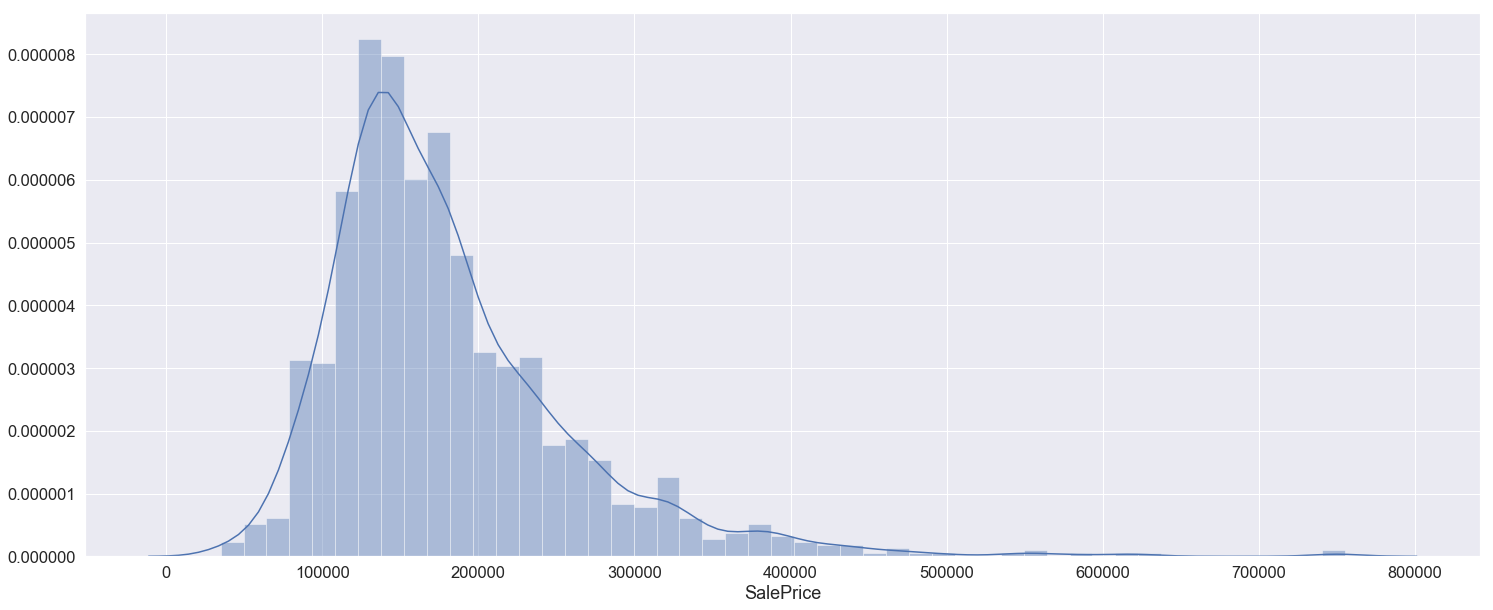

In [5]:
sns.set(rc={'figure.figsize':(25,10)},font_scale=1.5)
sns.distplot(train.SalePrice,)

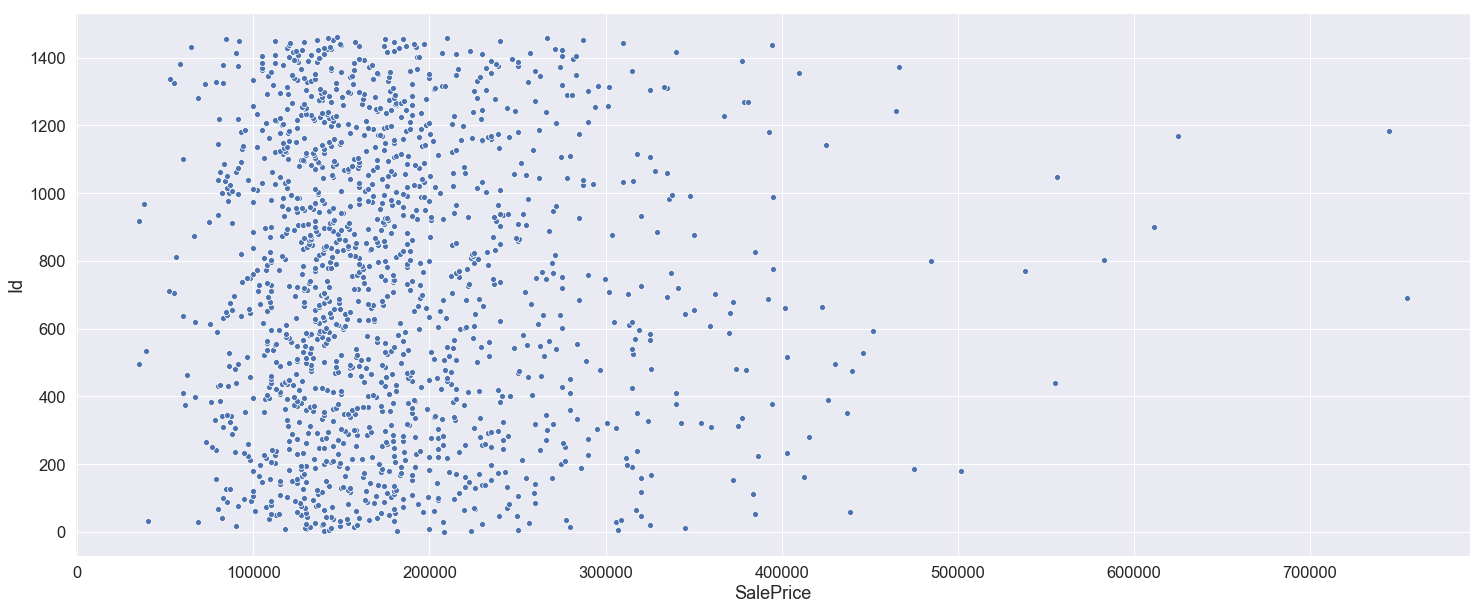

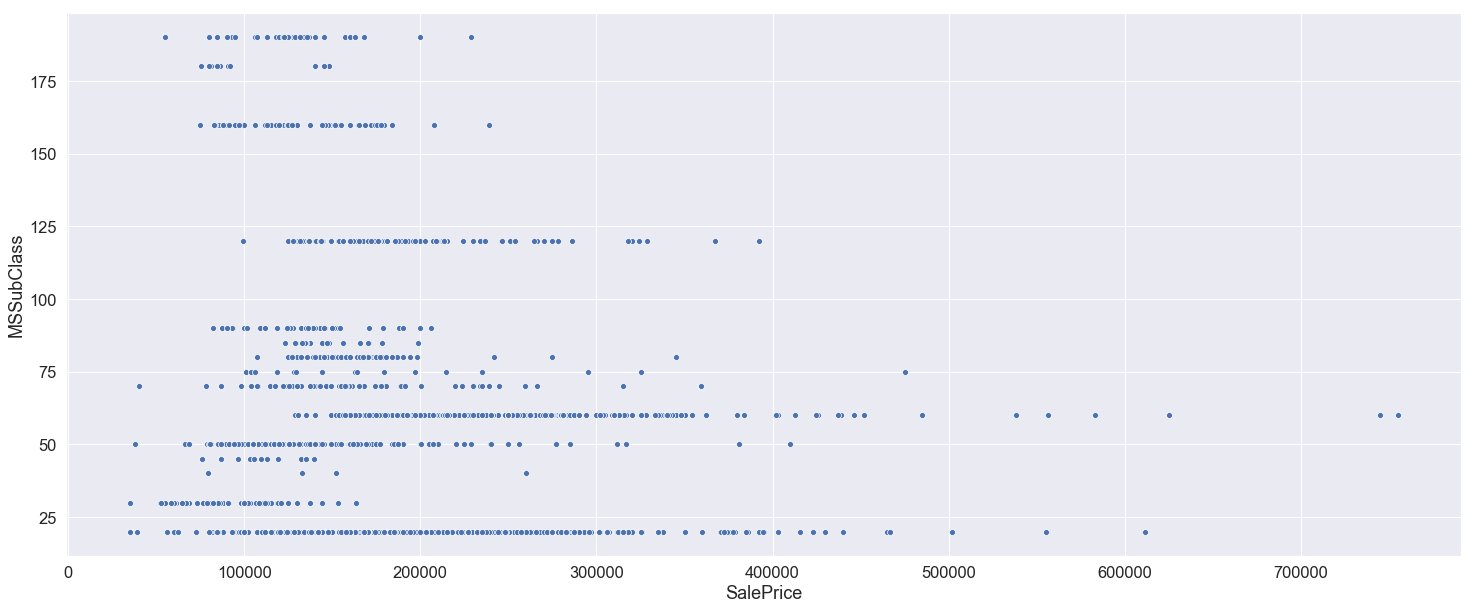

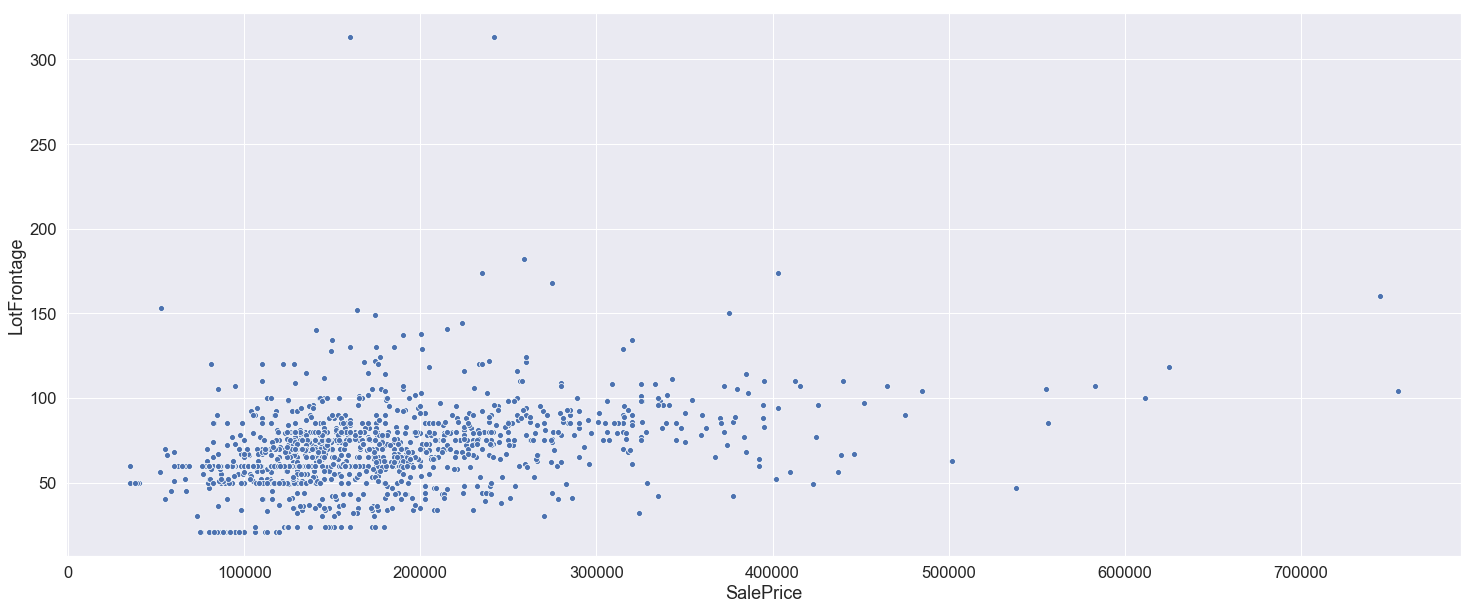

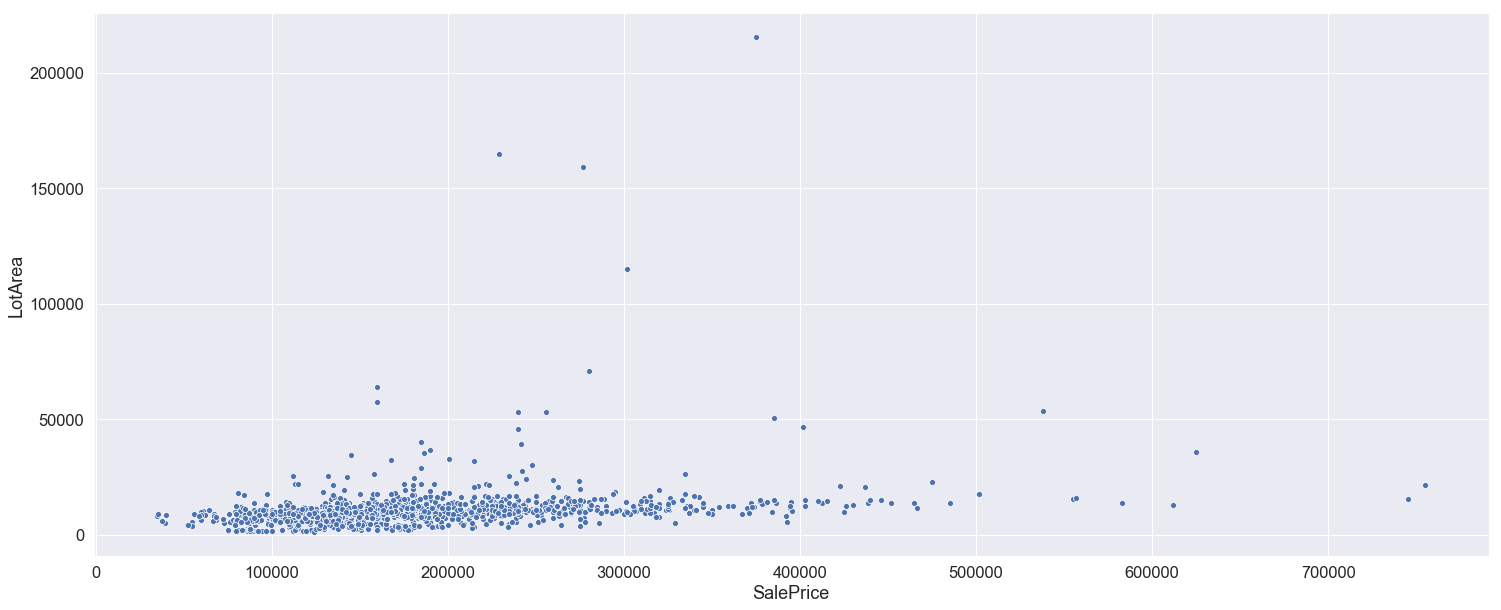

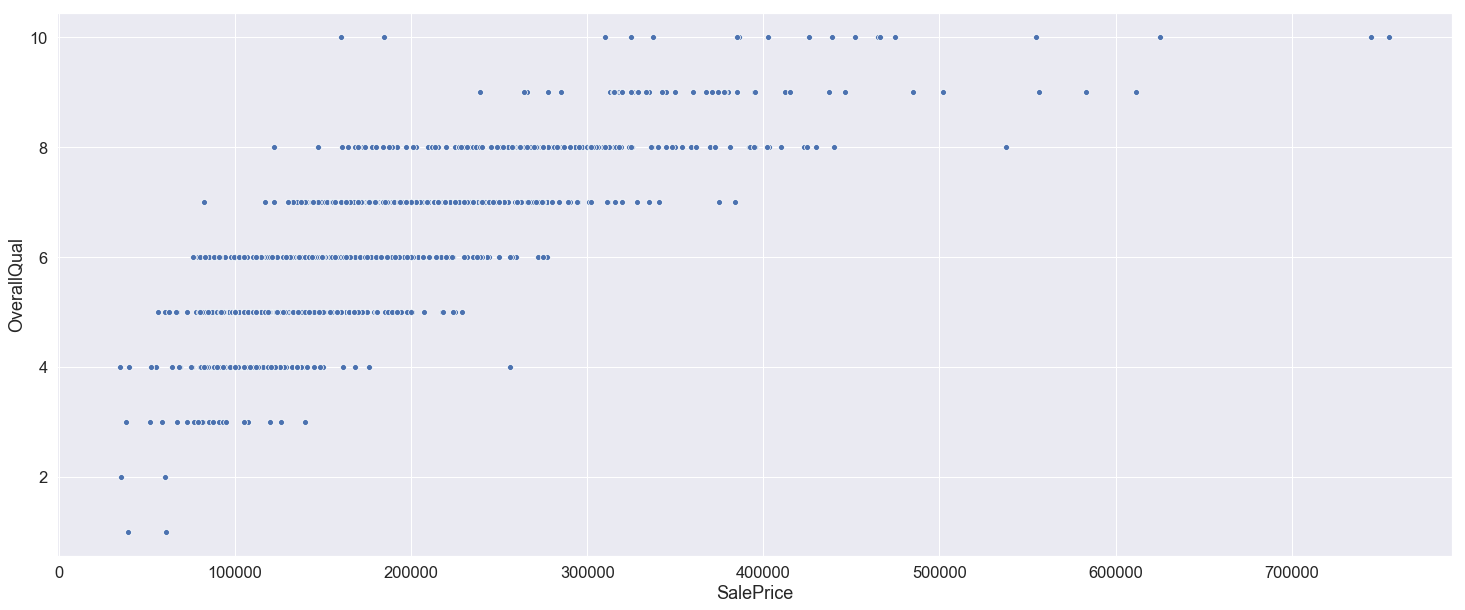

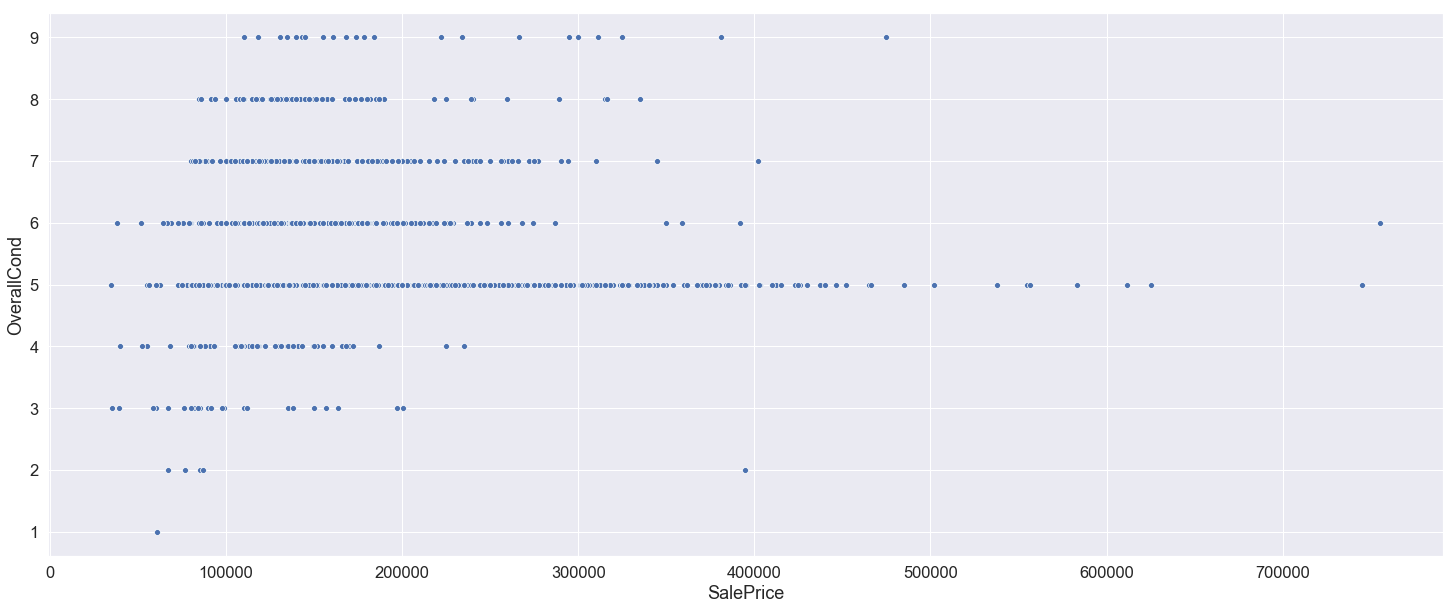

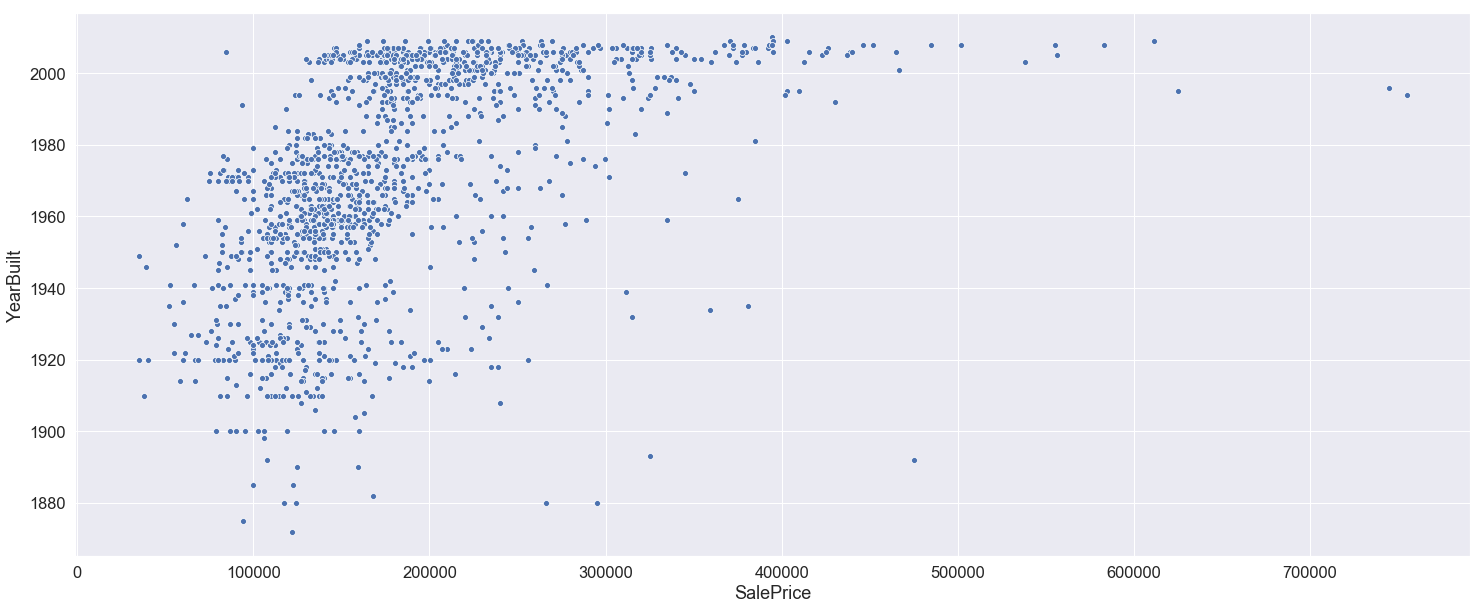

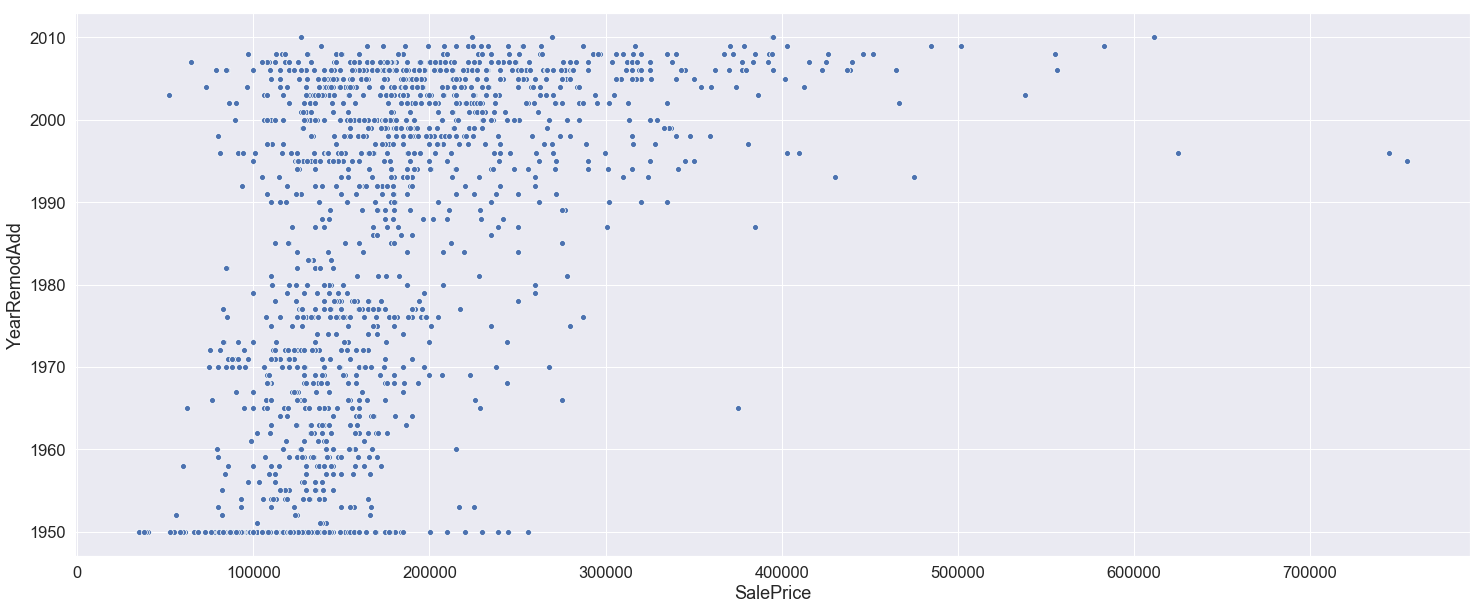

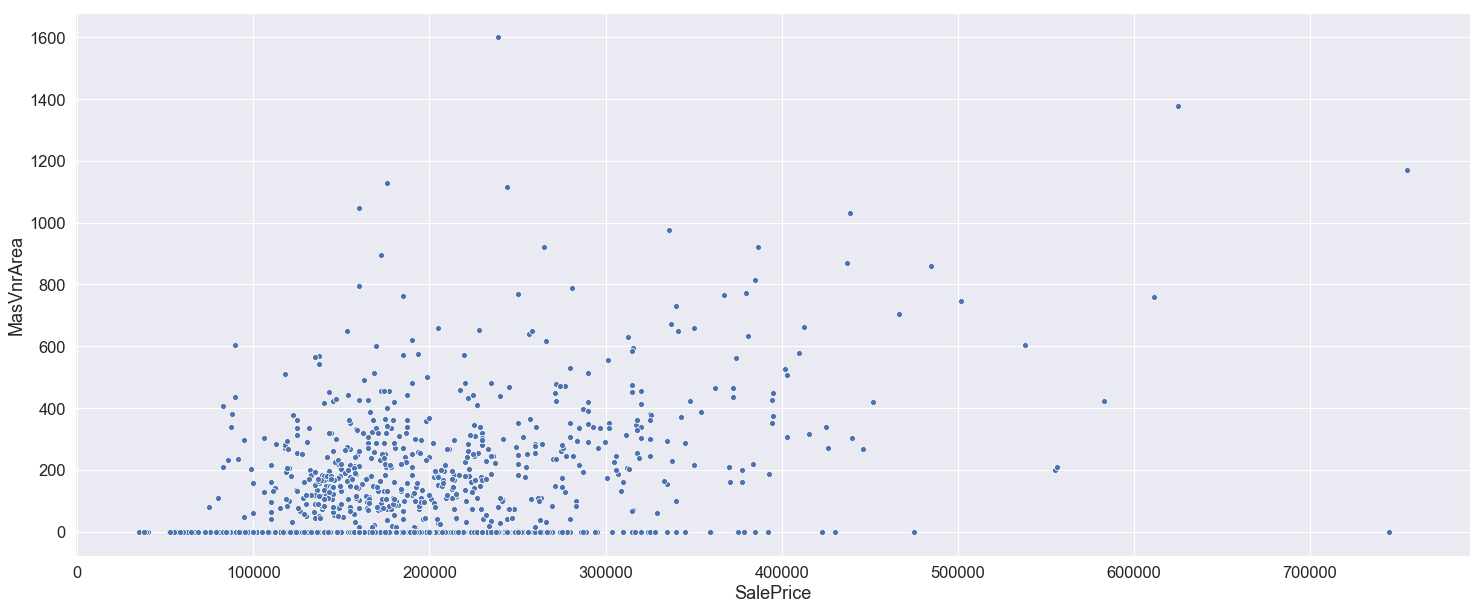

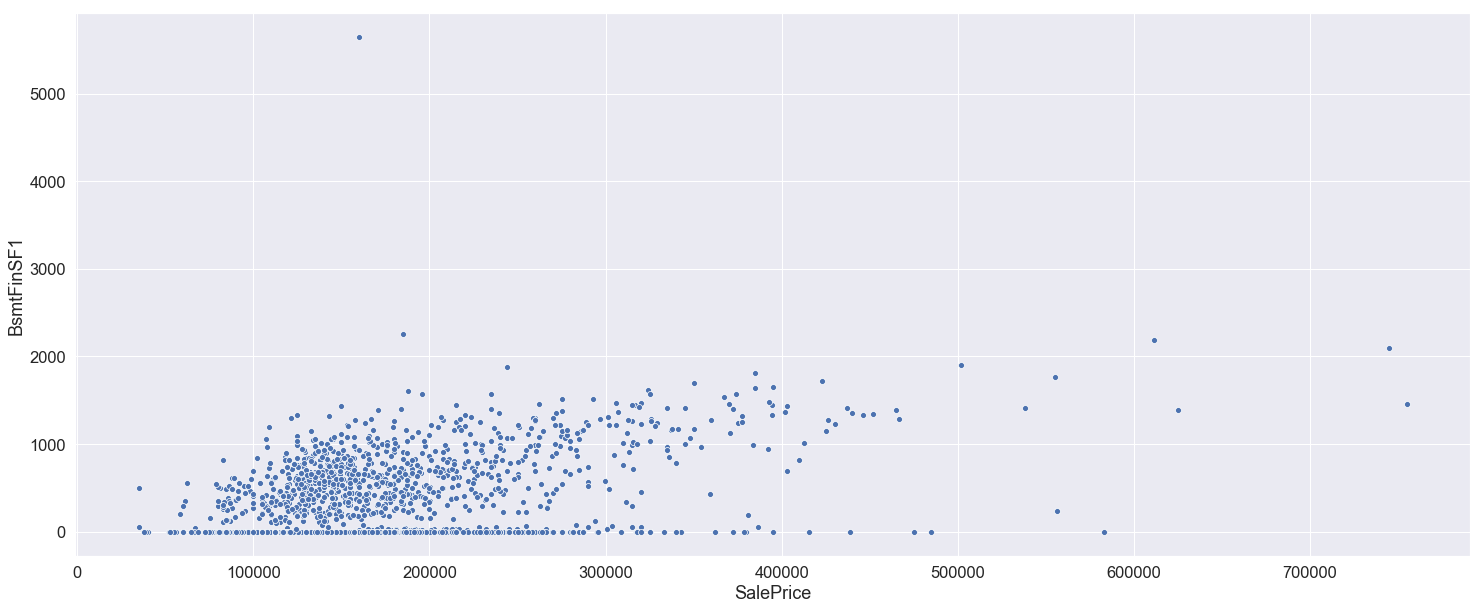

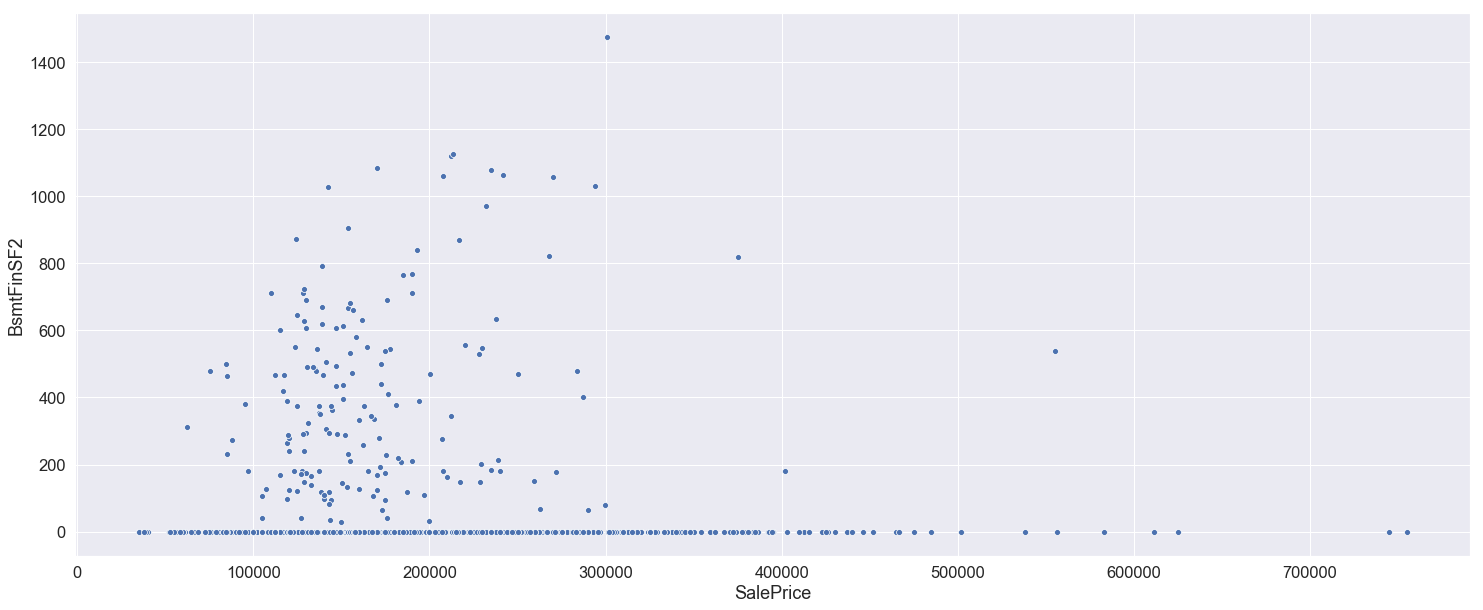

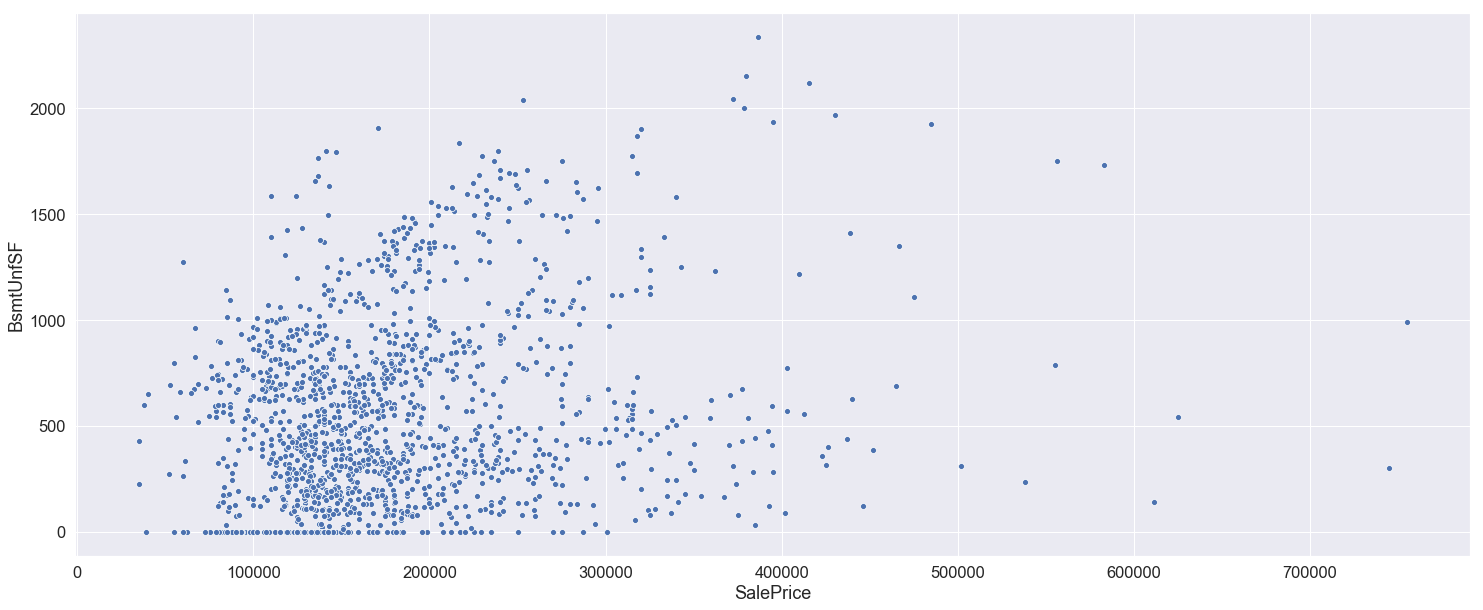

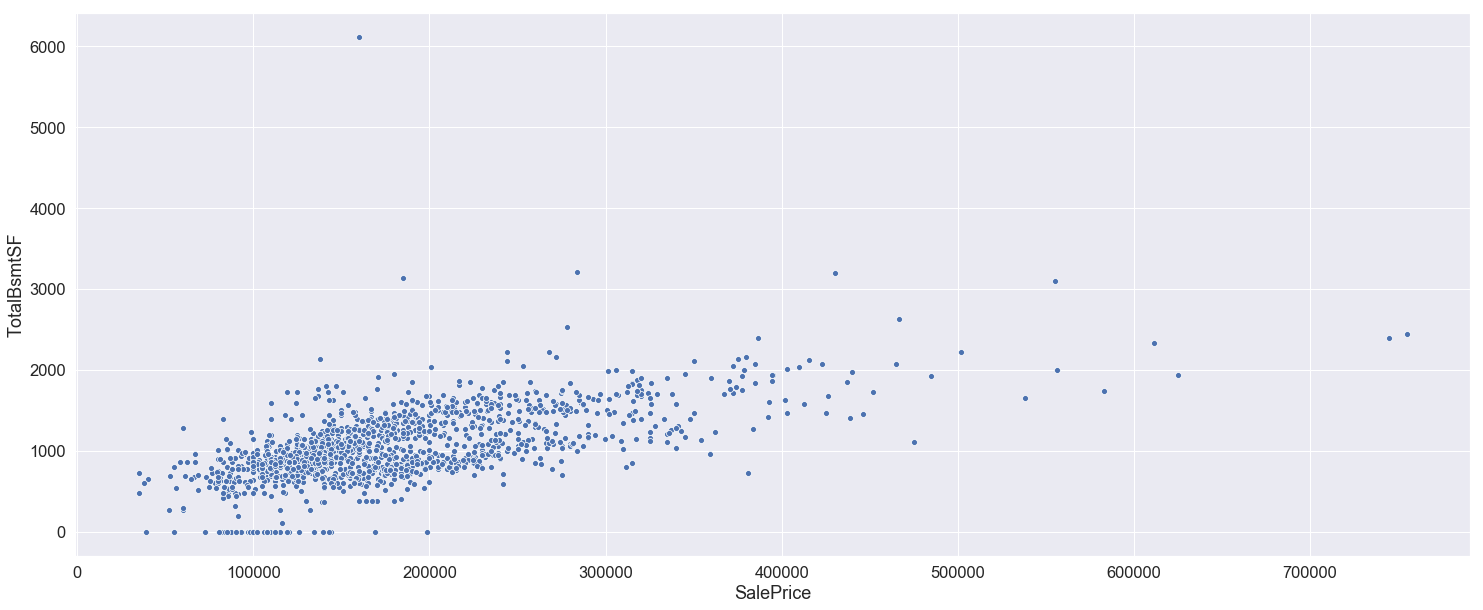

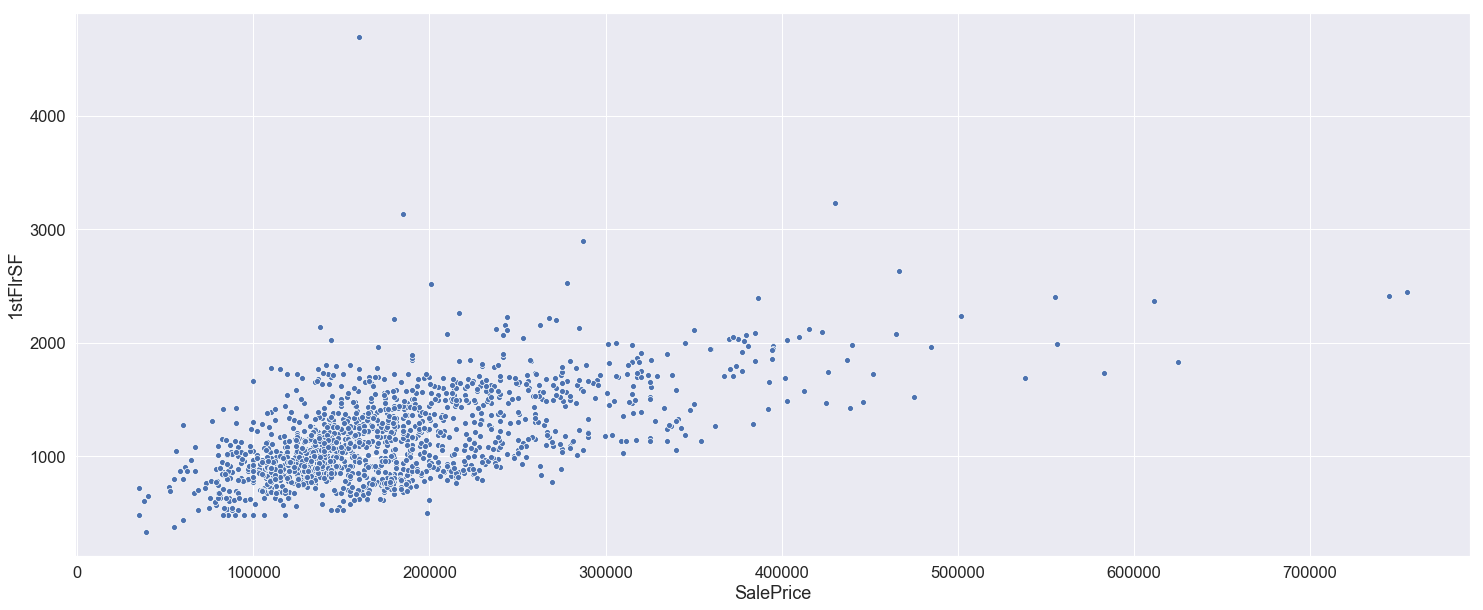

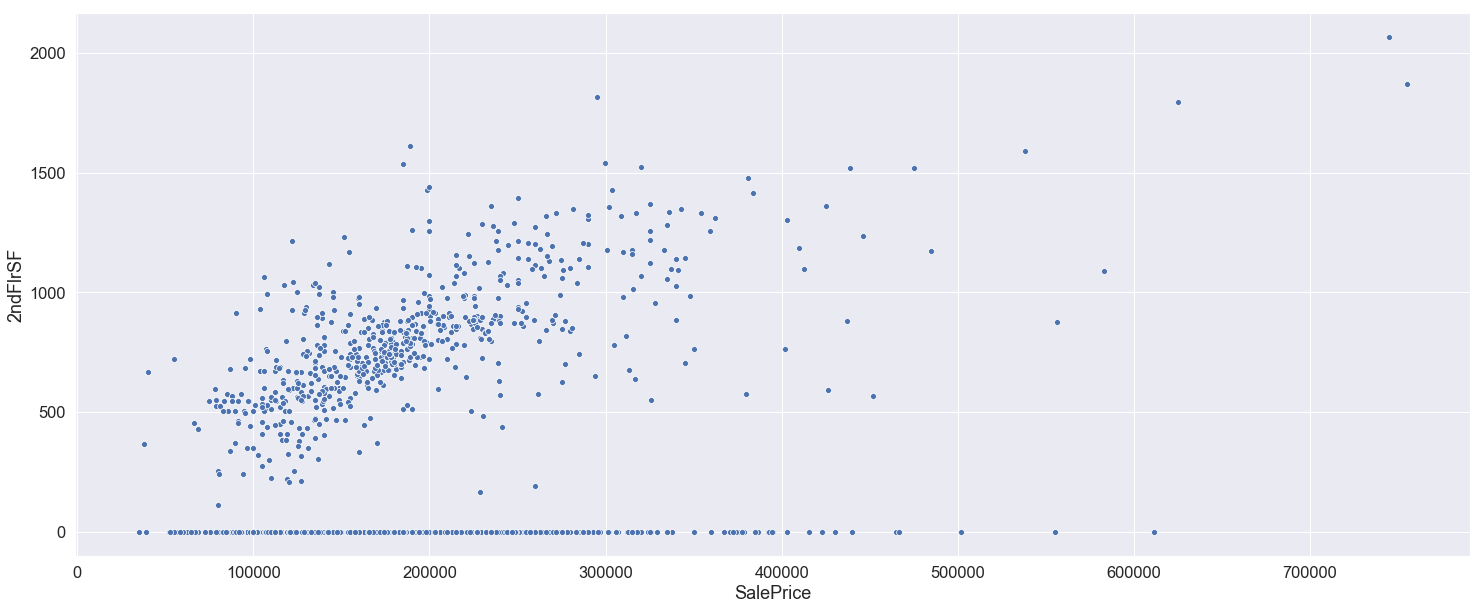

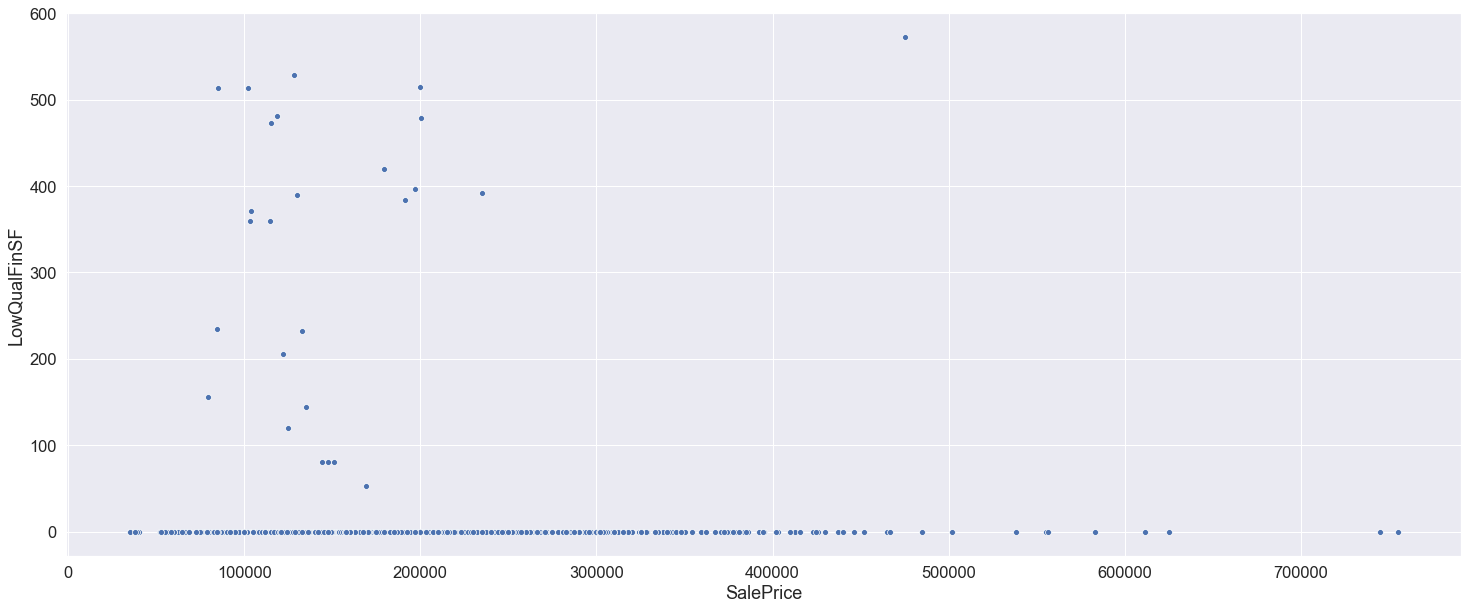

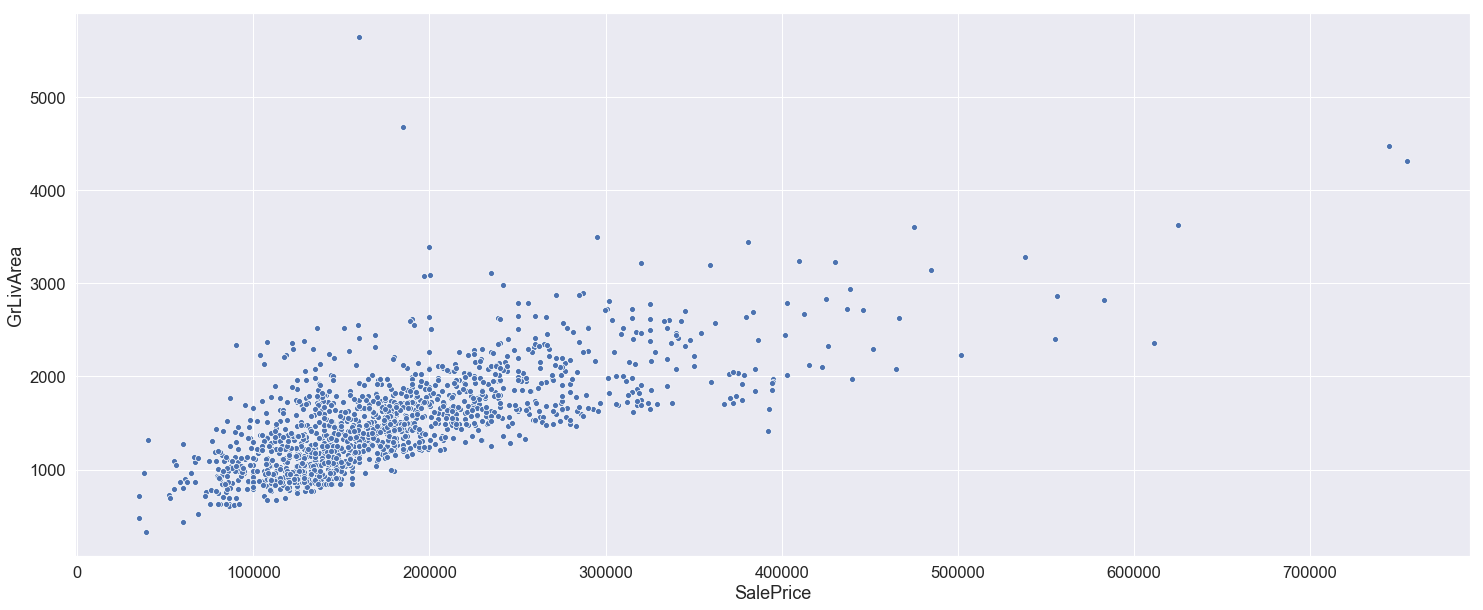

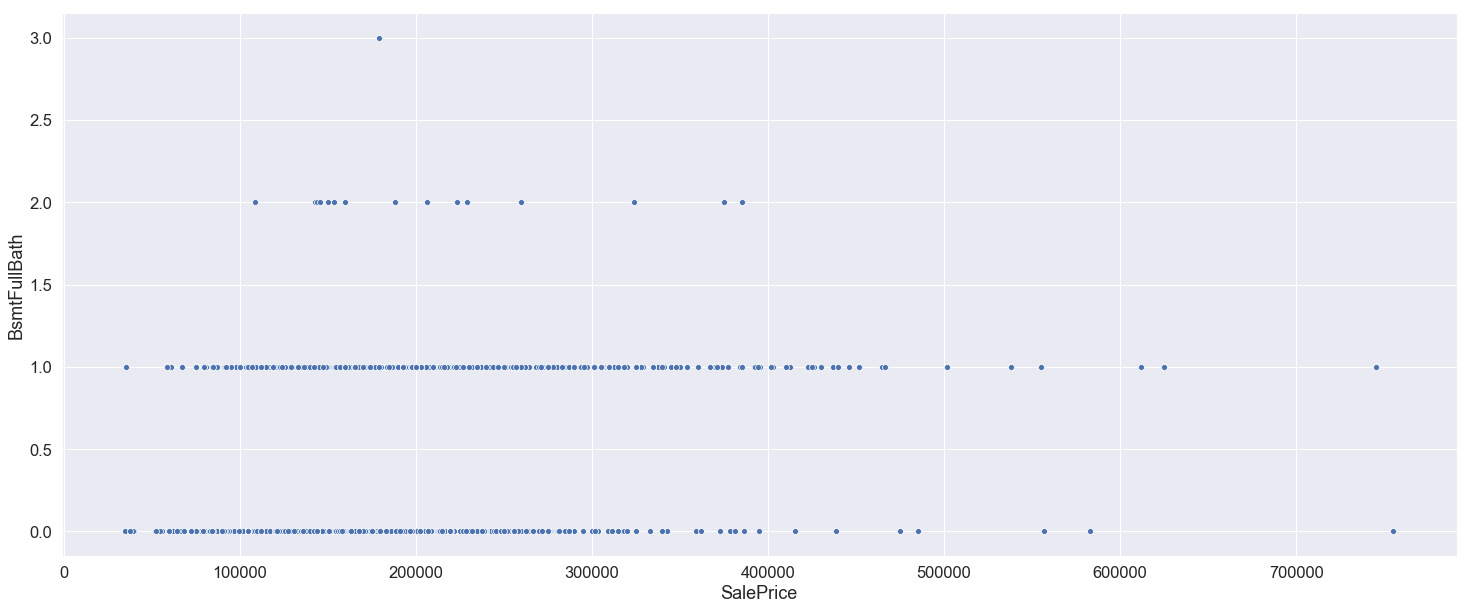

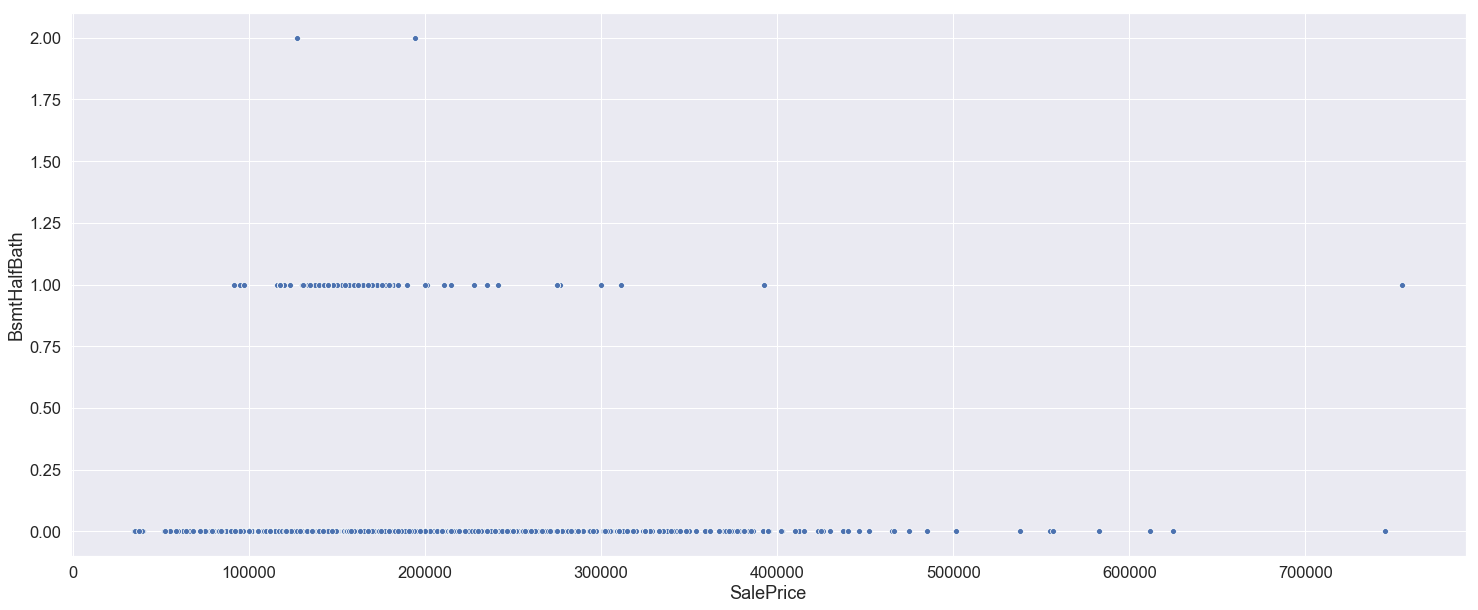

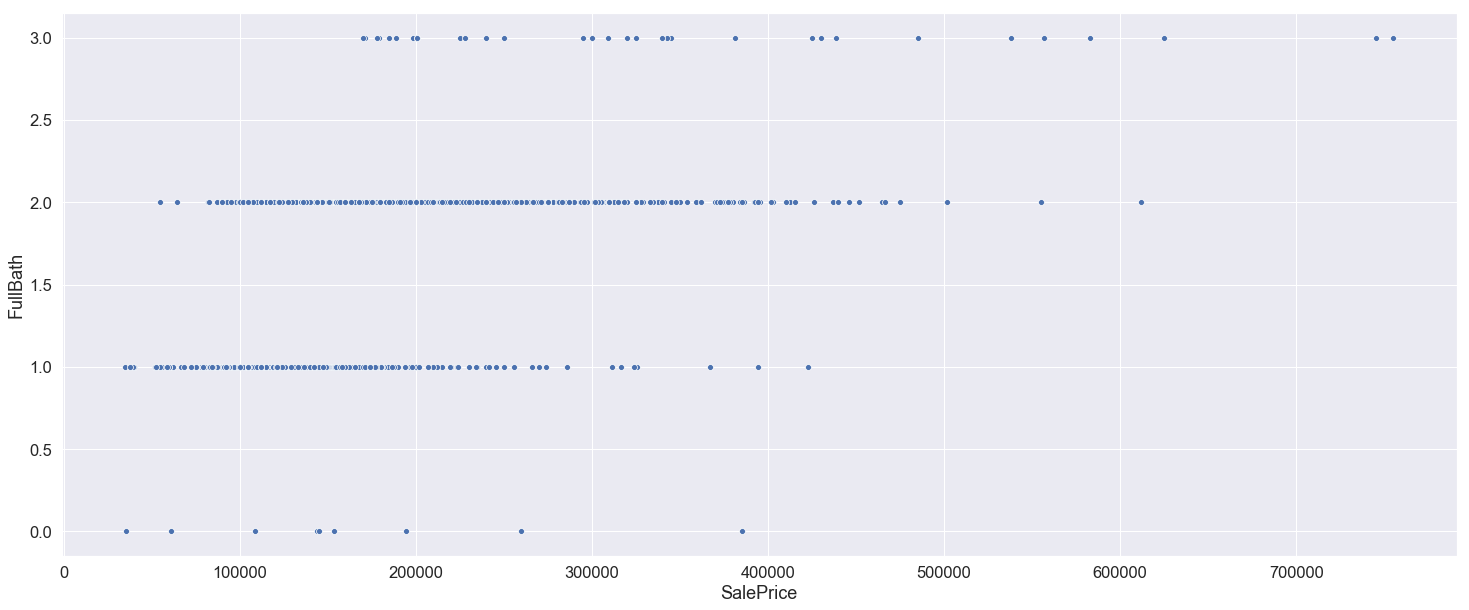

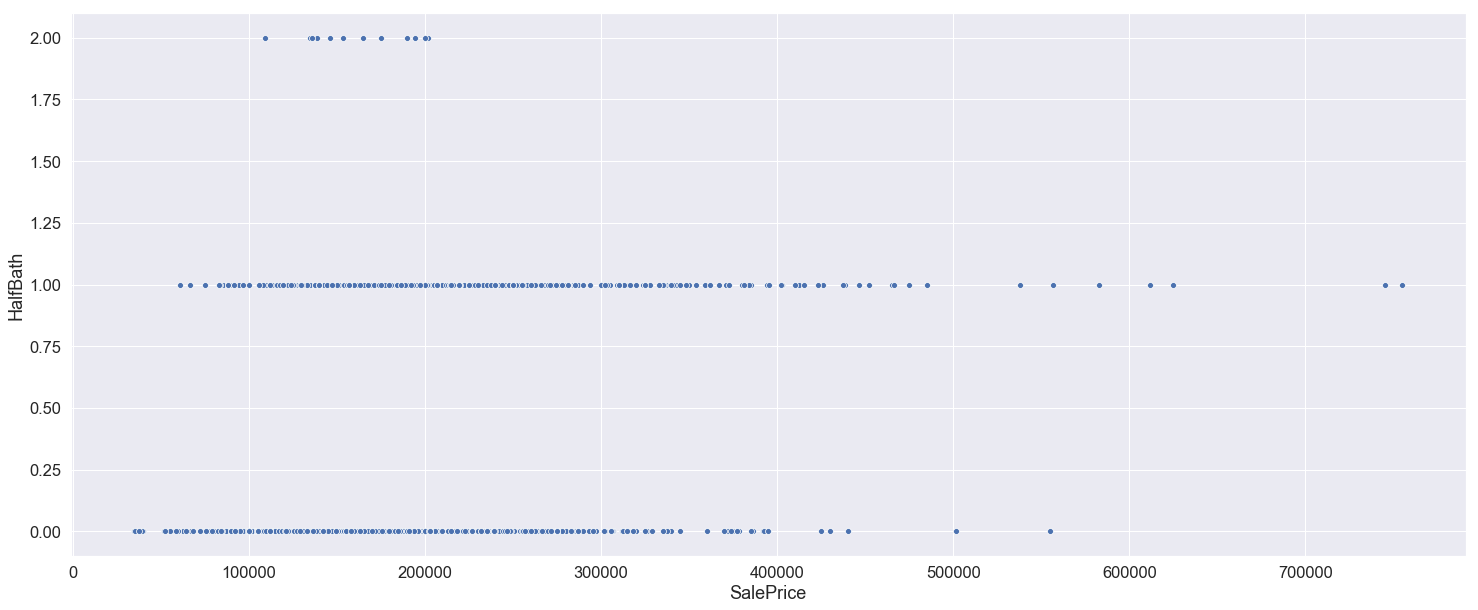

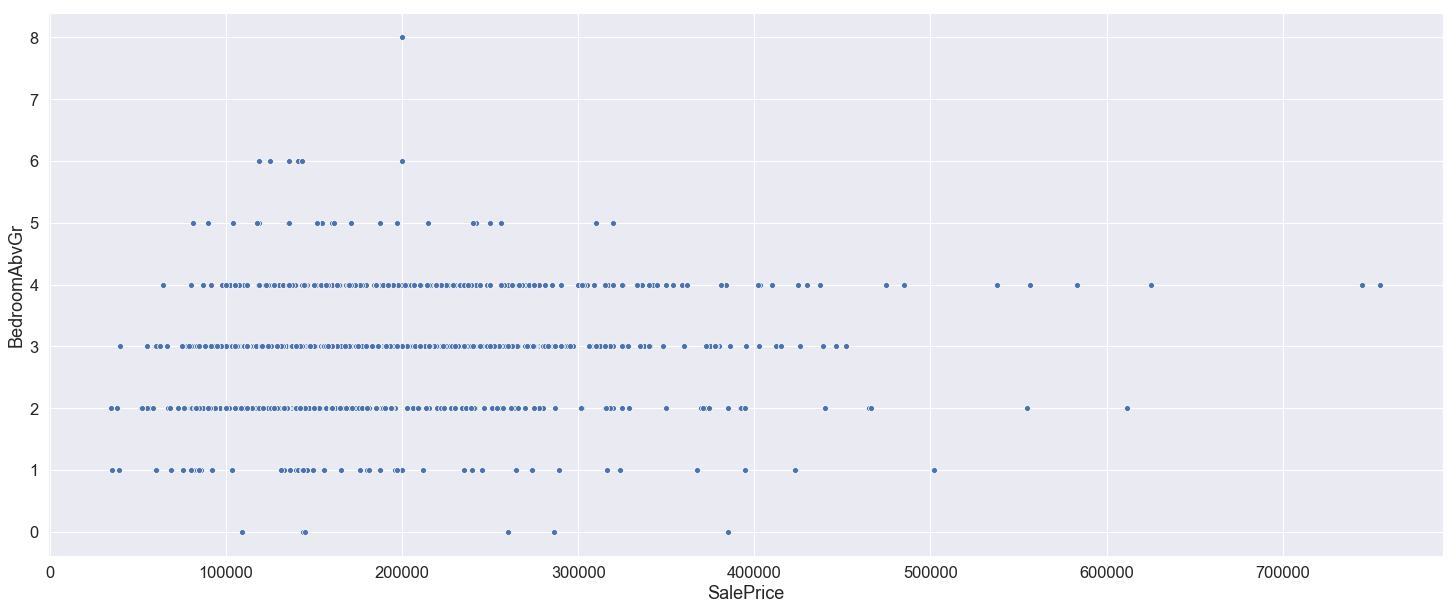

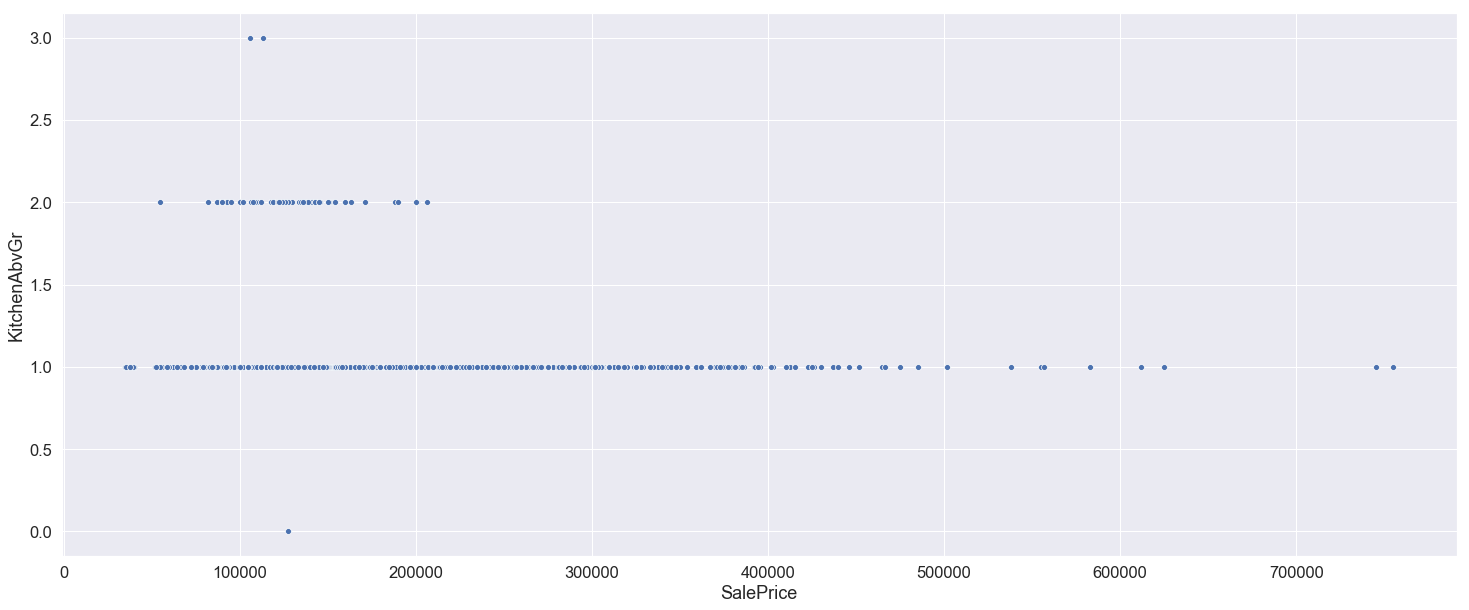

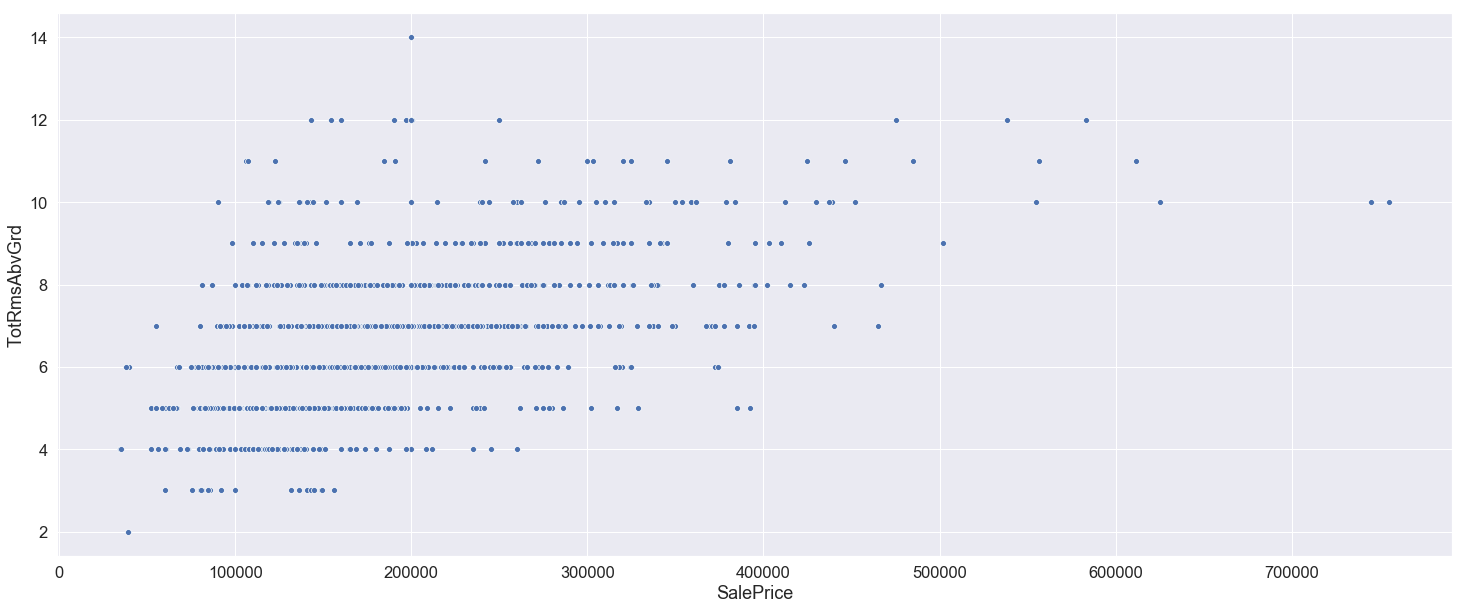

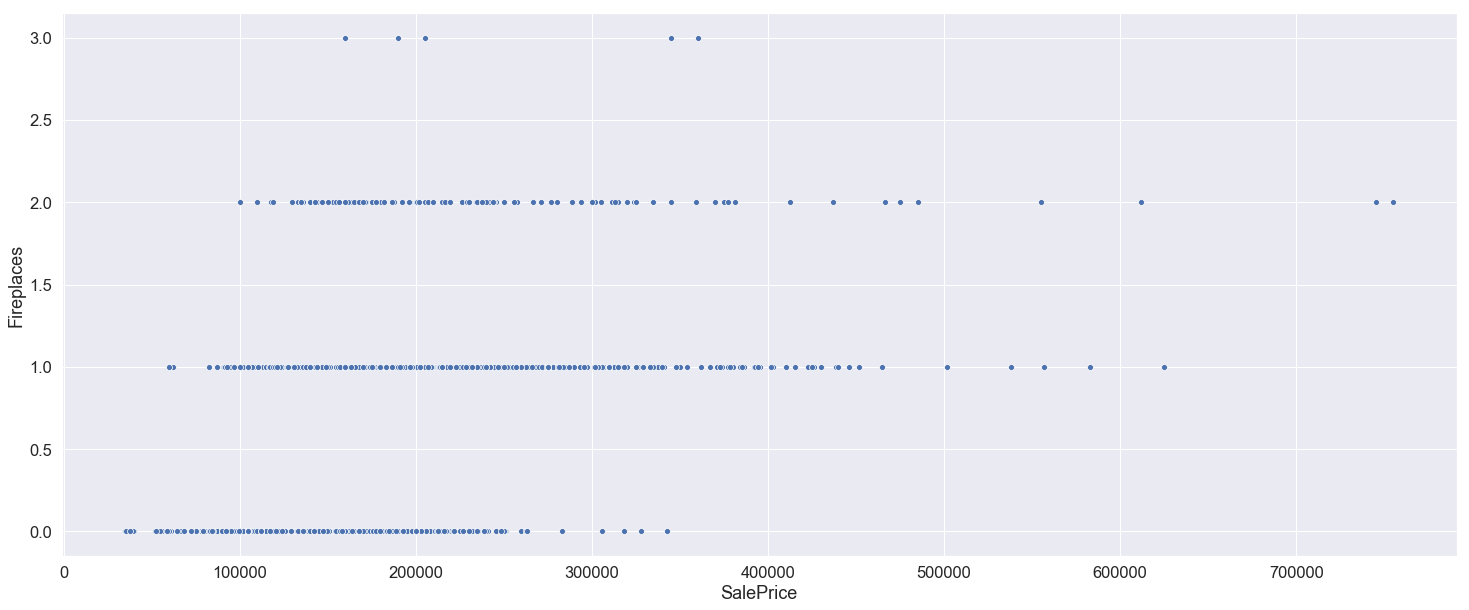

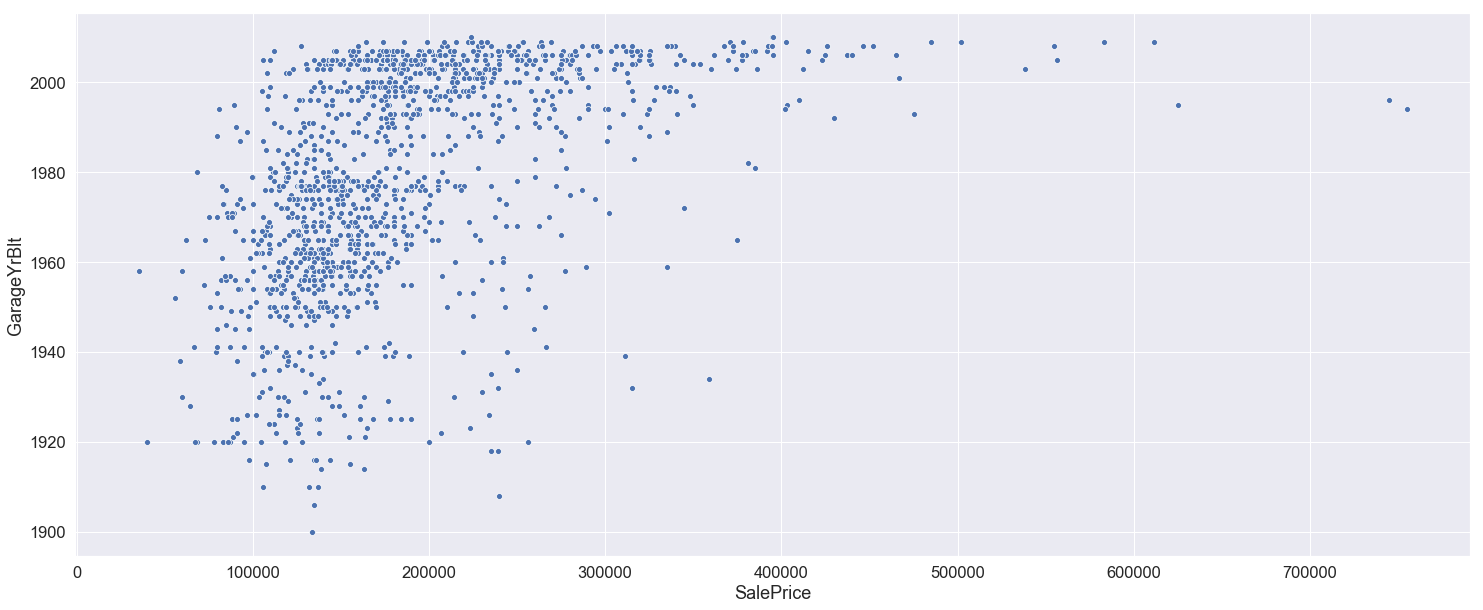

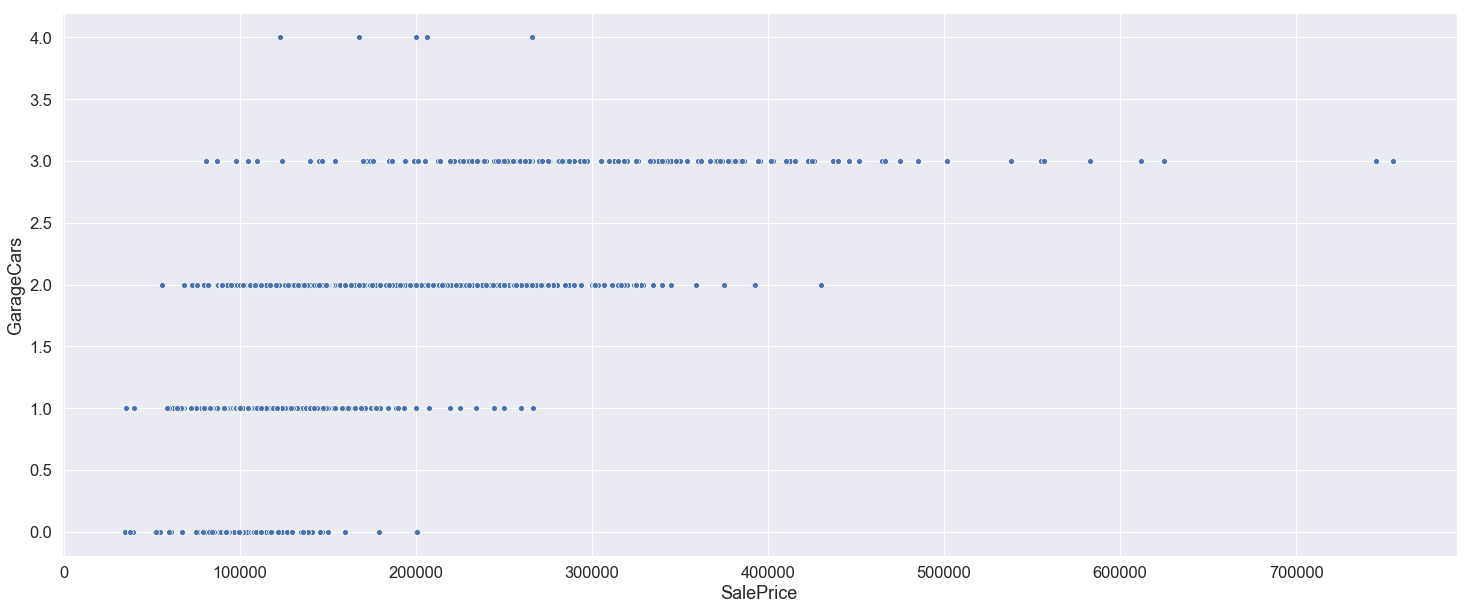

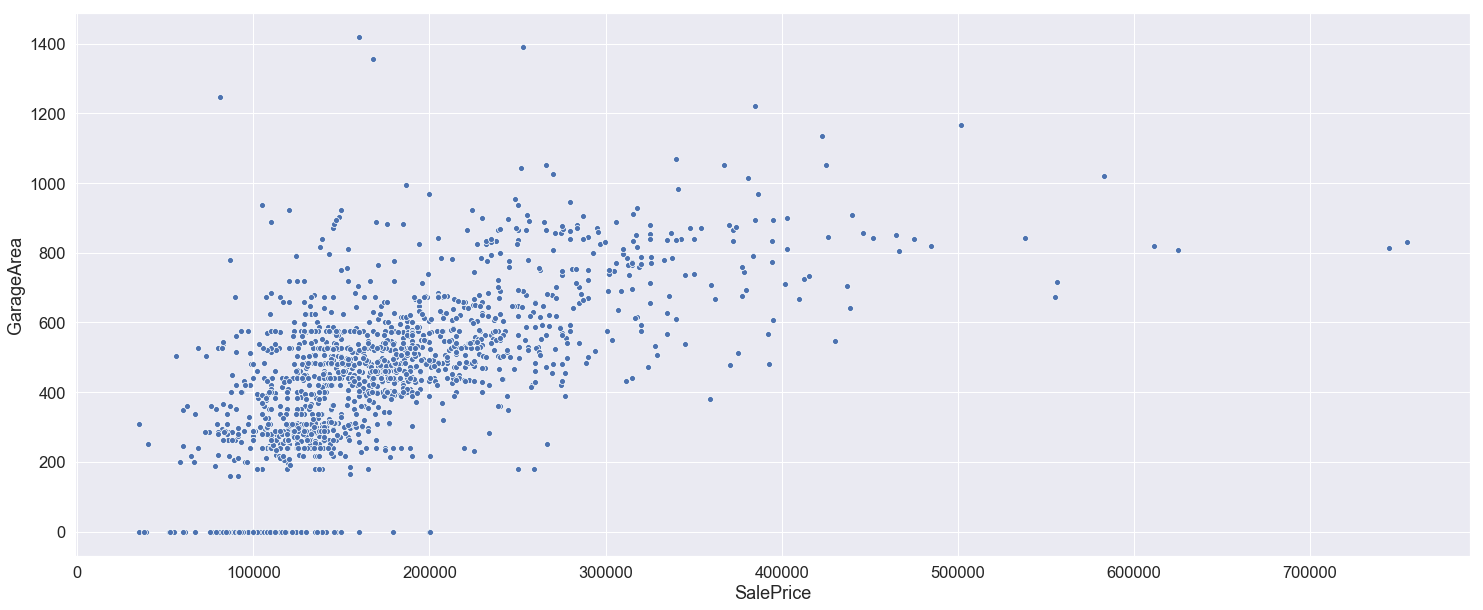

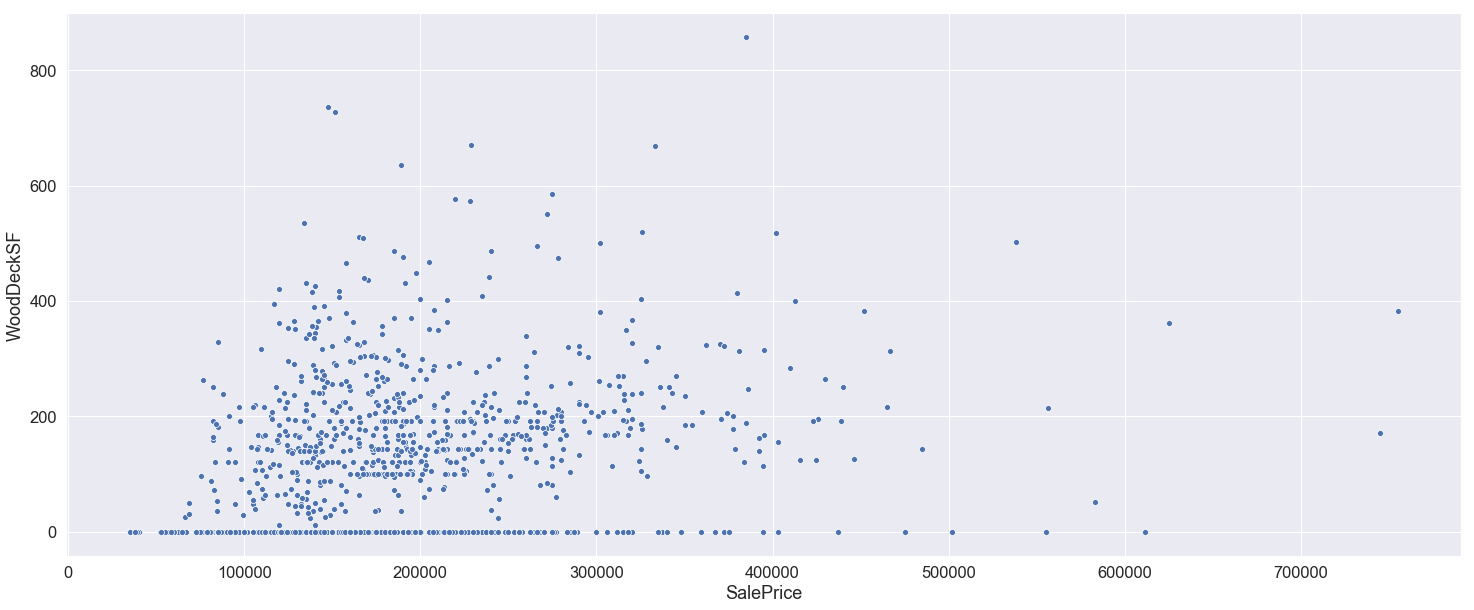

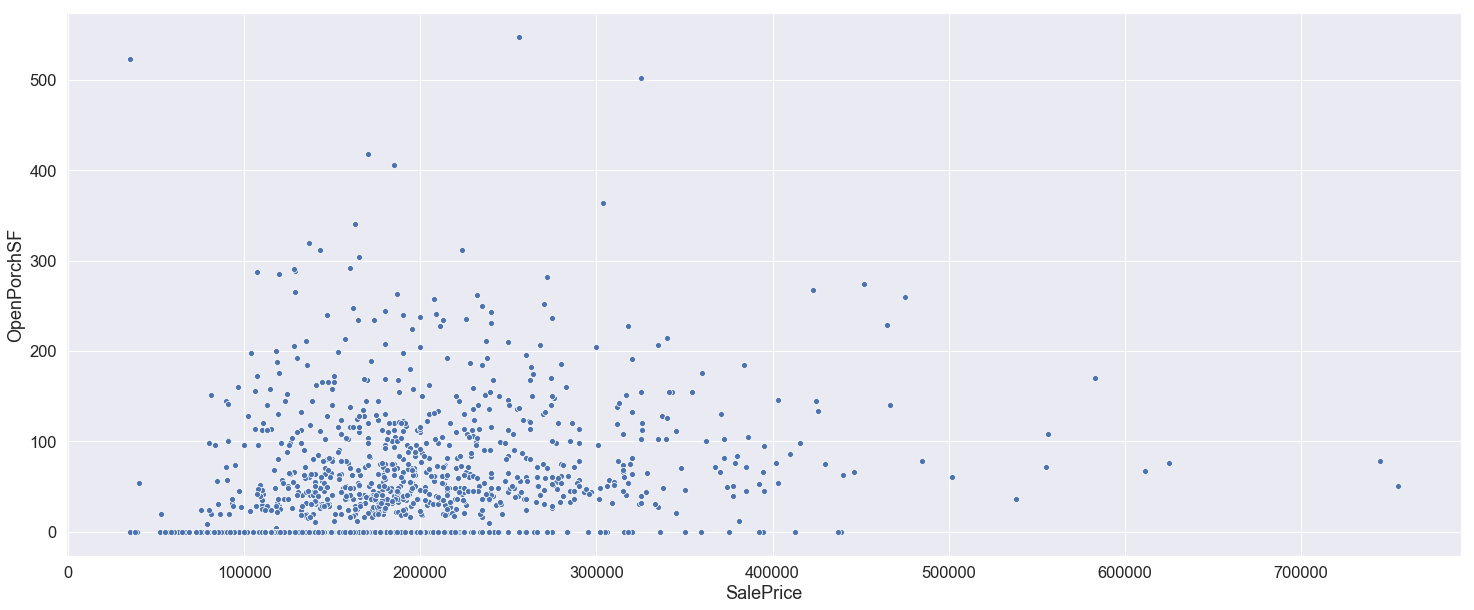

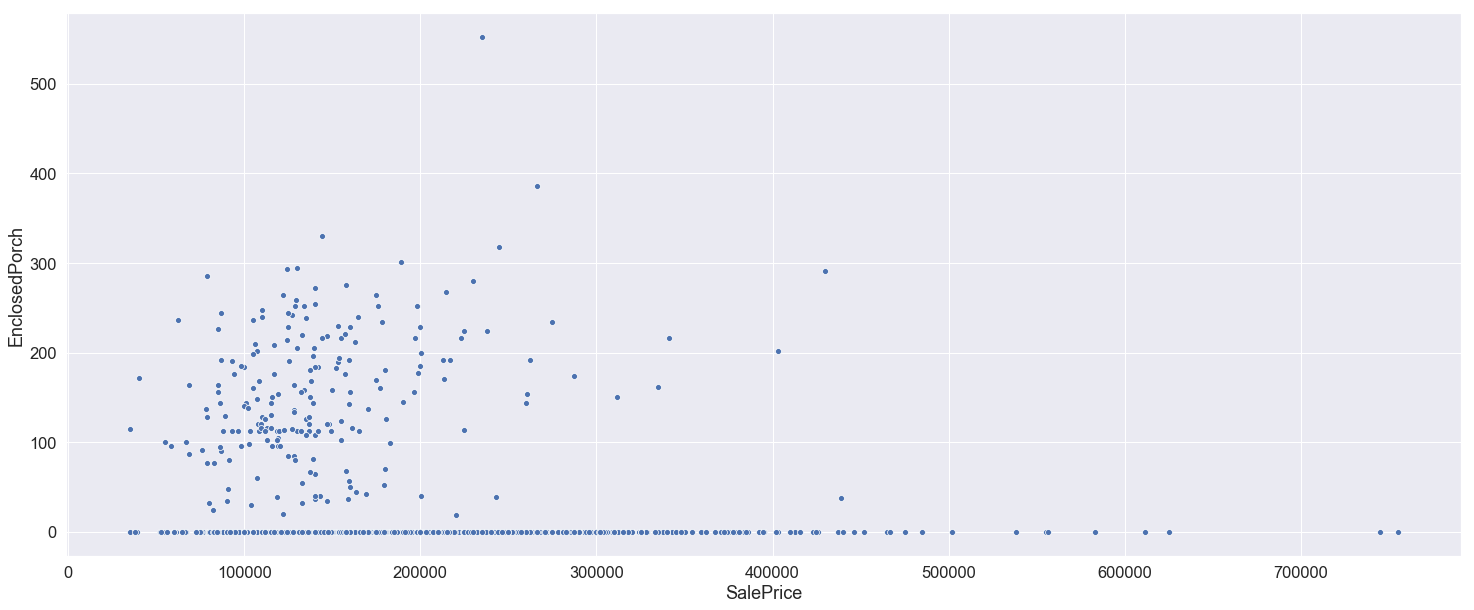

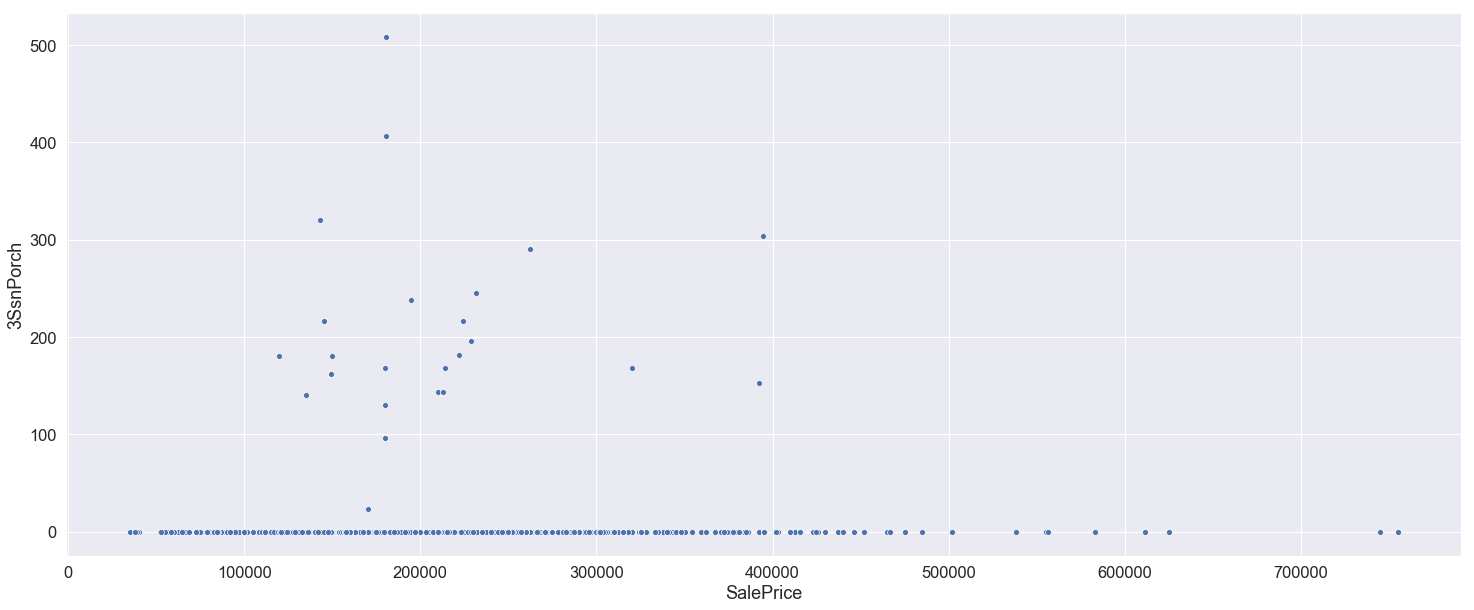

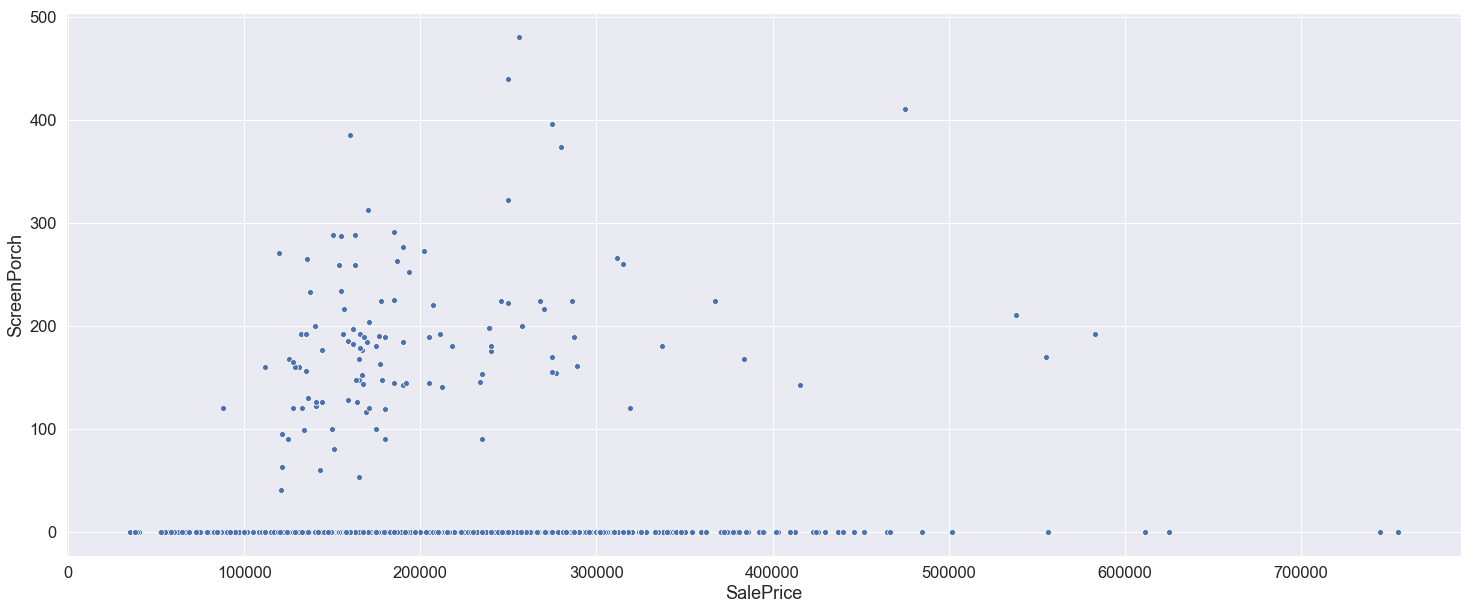

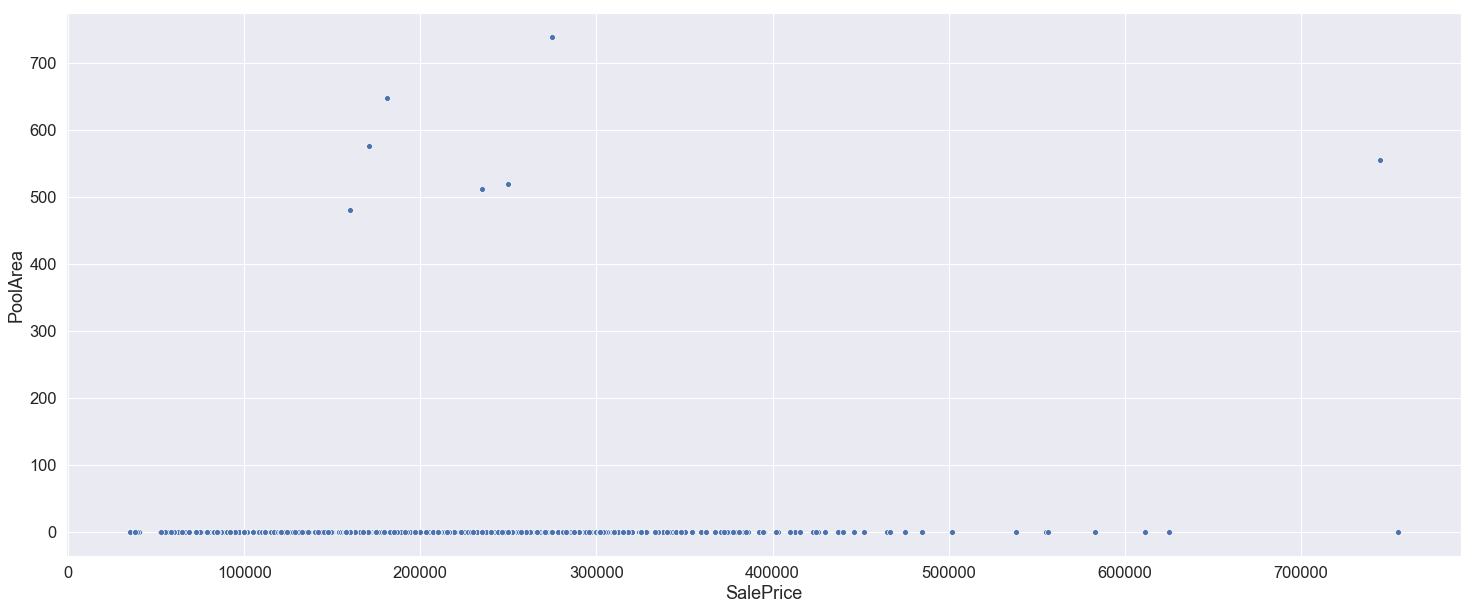

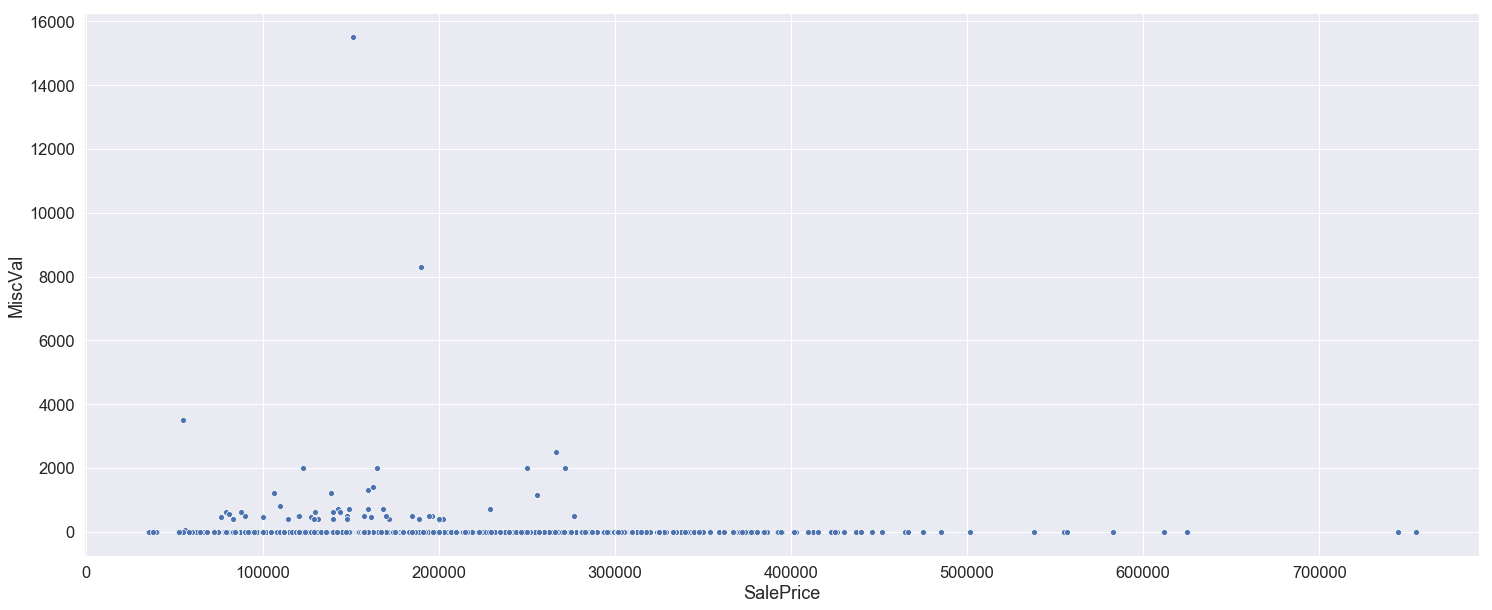

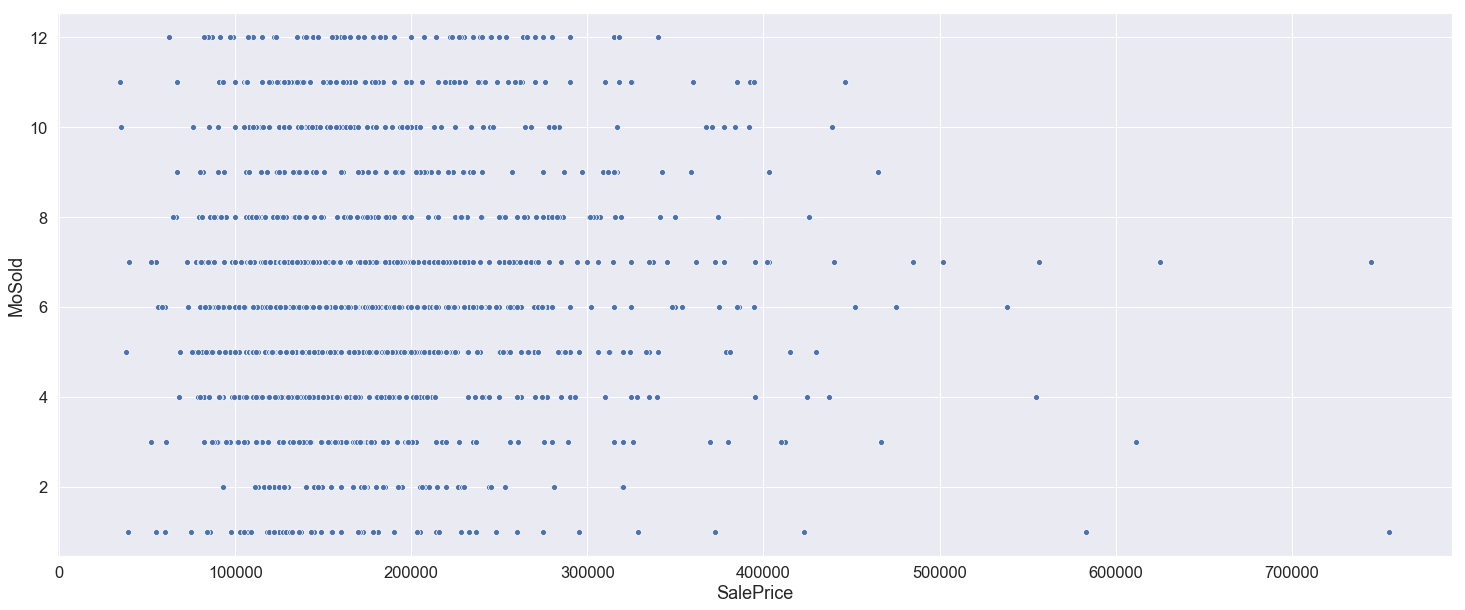

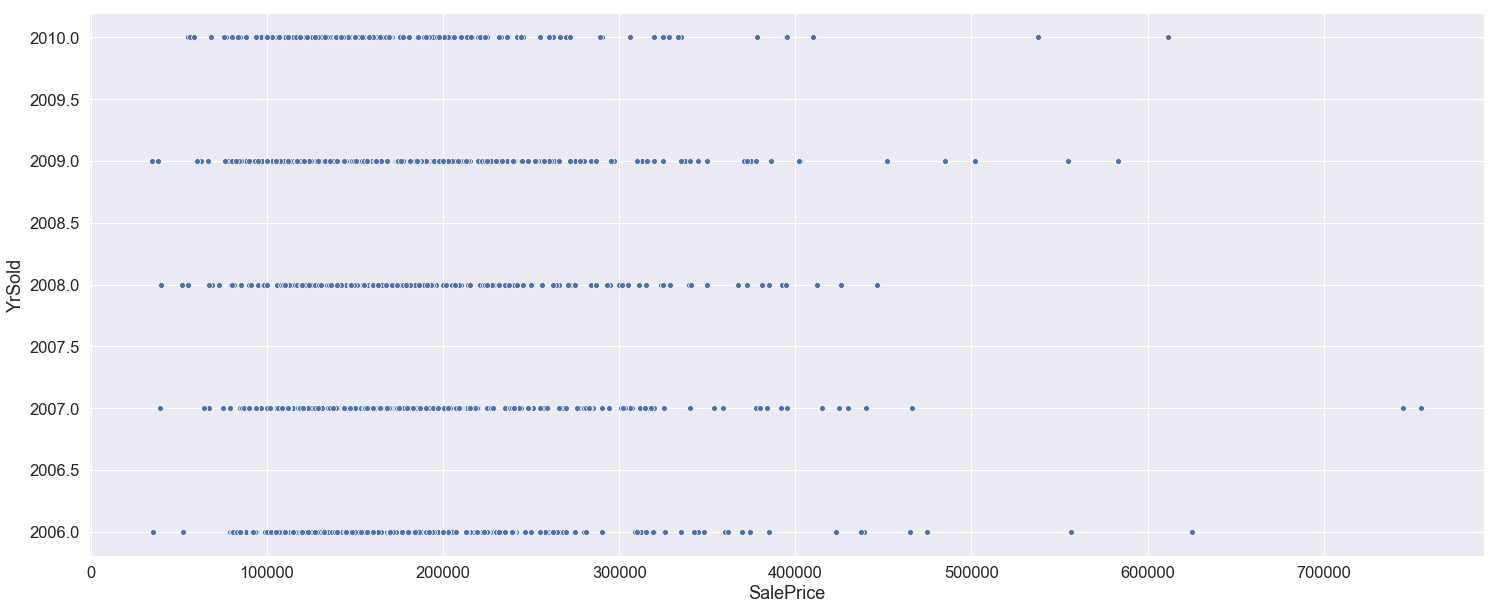

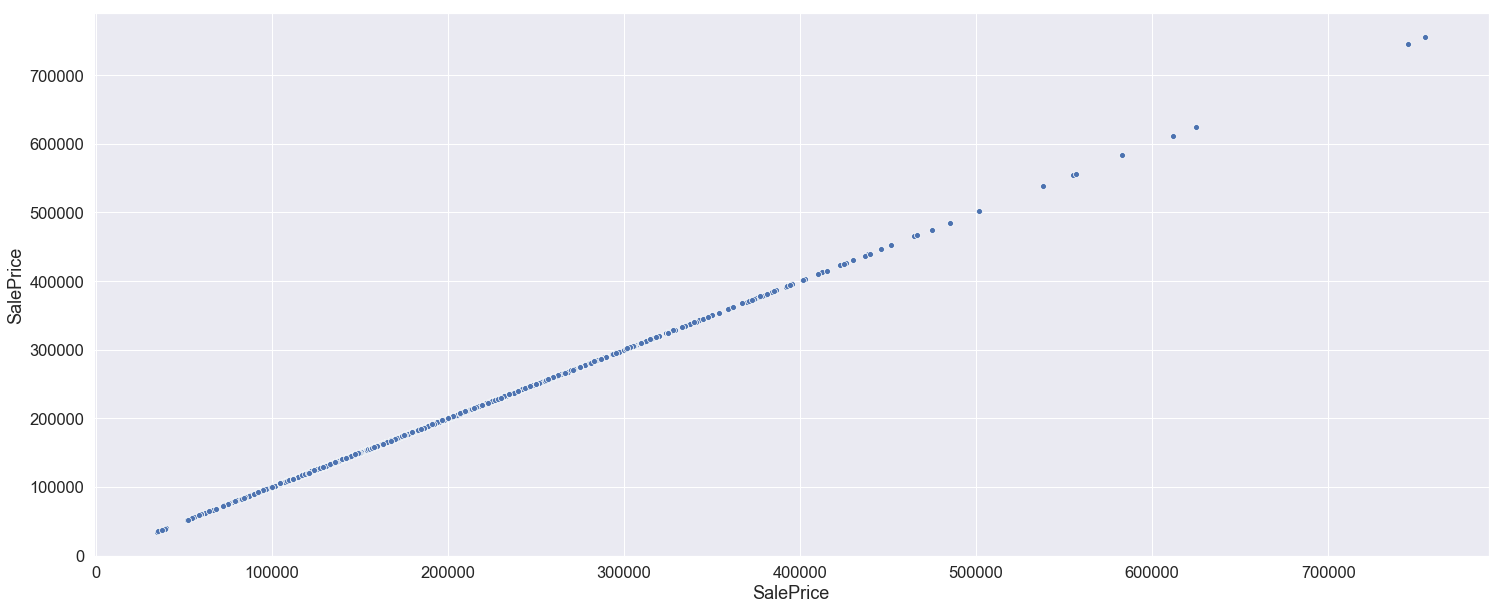

In [6]:
for i in list(train.columns):
    if train[i].dtype != 'O':
        sns.scatterplot(x = train.SalePrice,y=train[i],estimator=np.mean)
        plt.show()

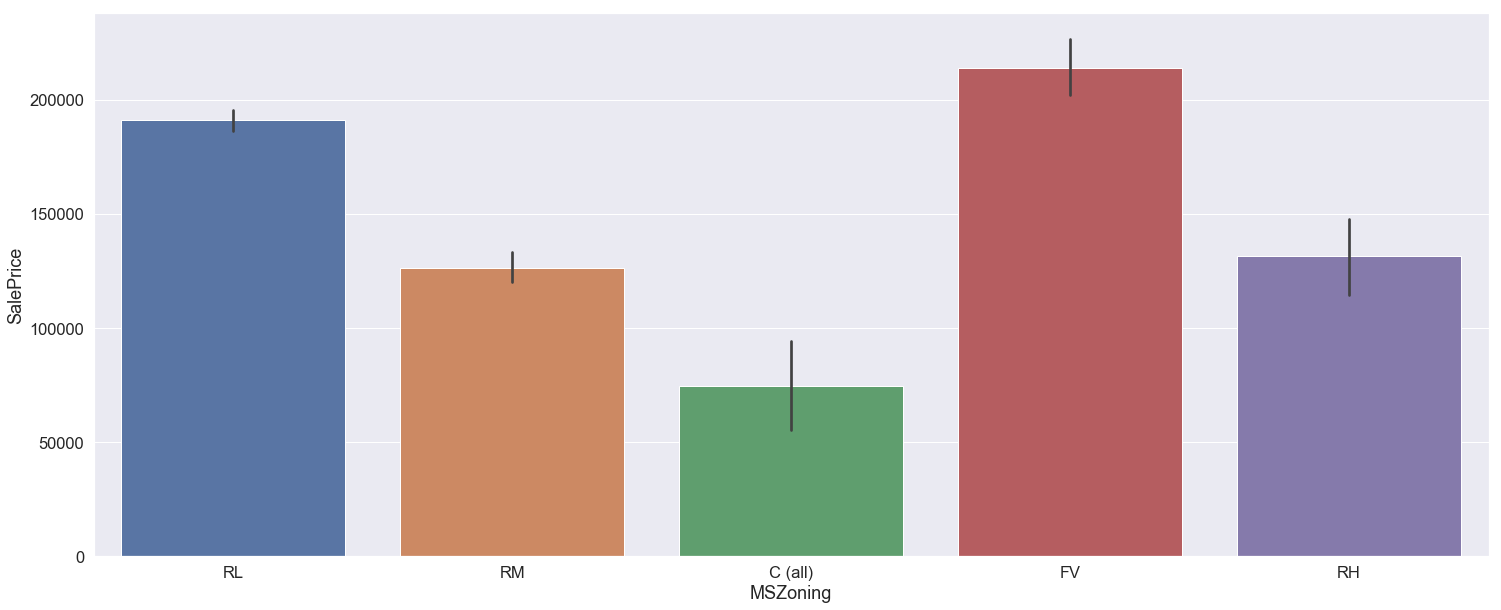

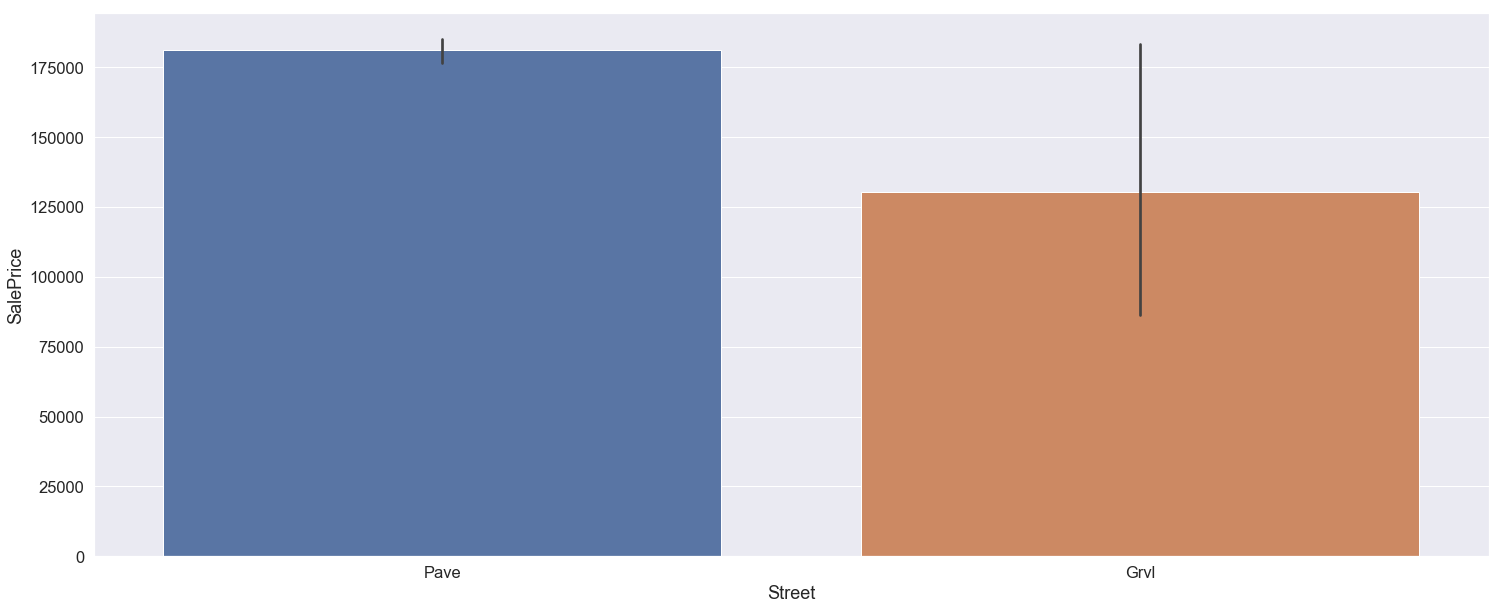

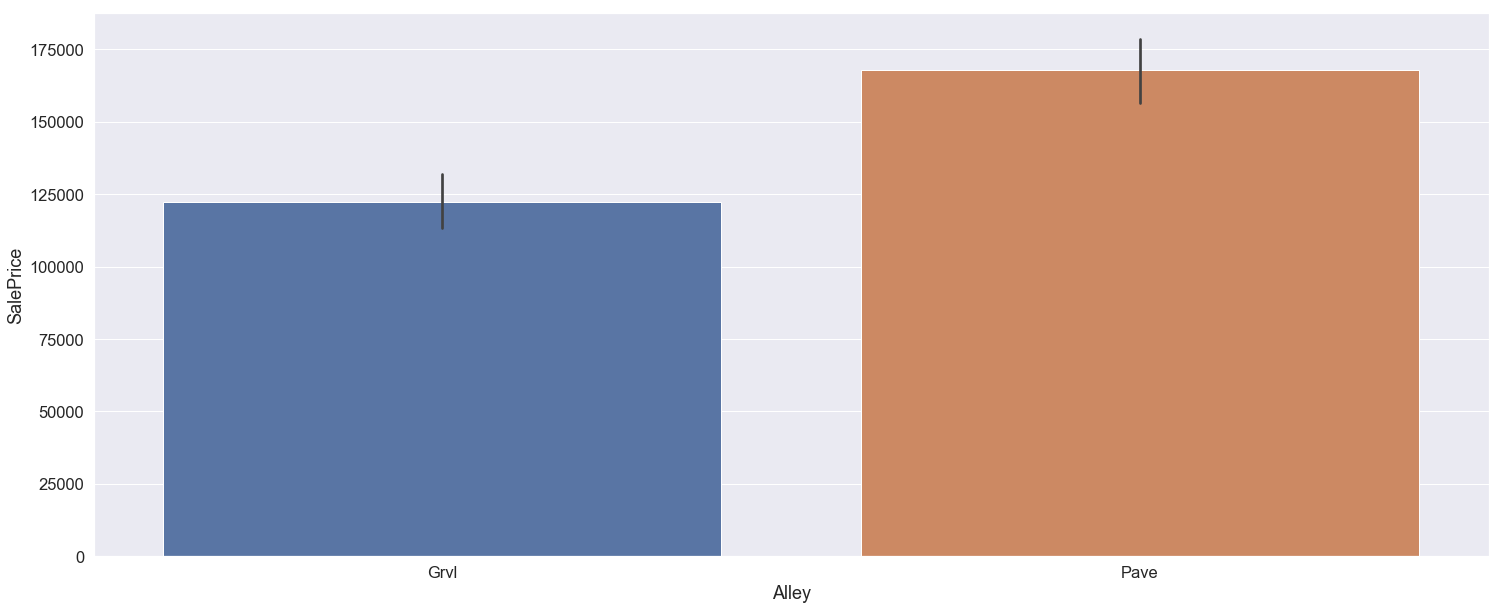

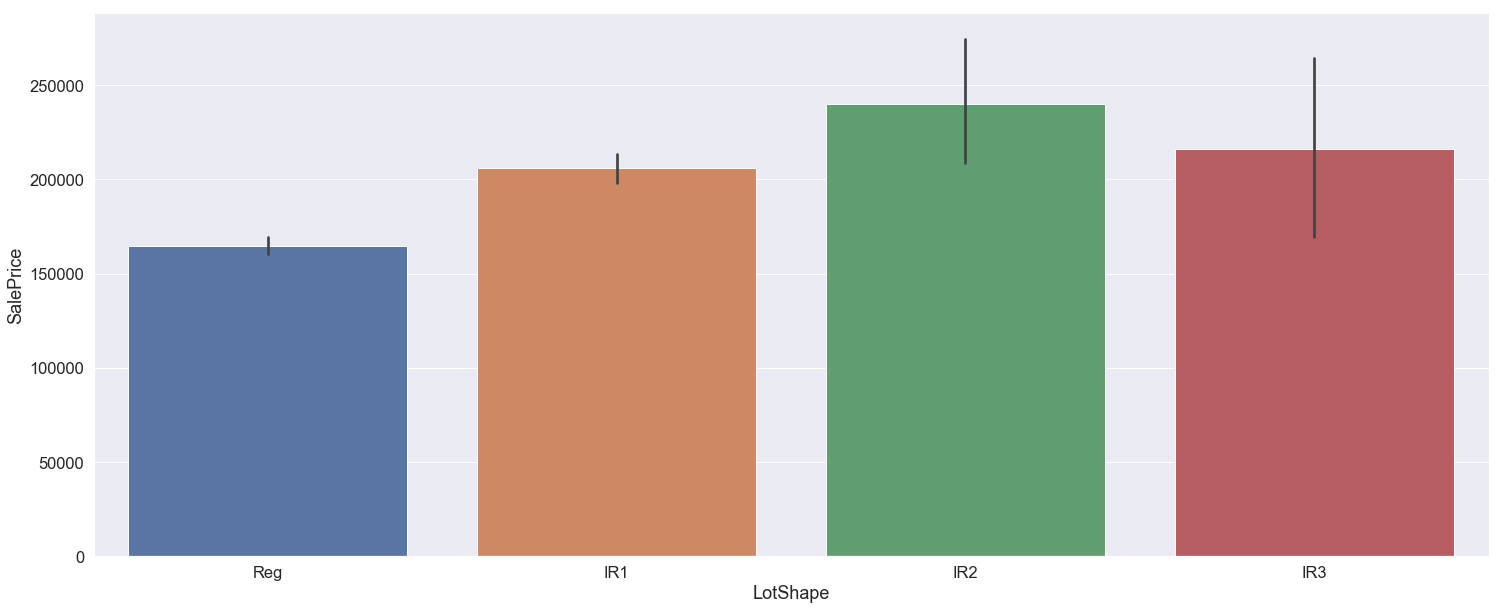

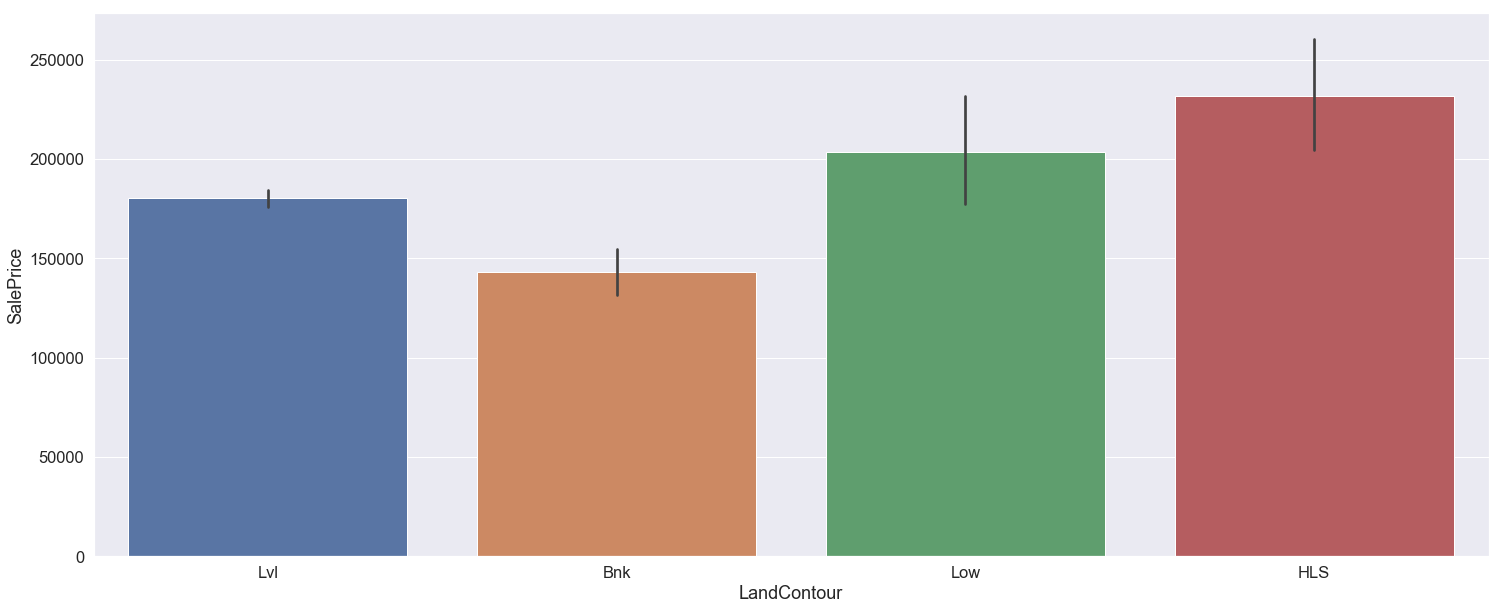

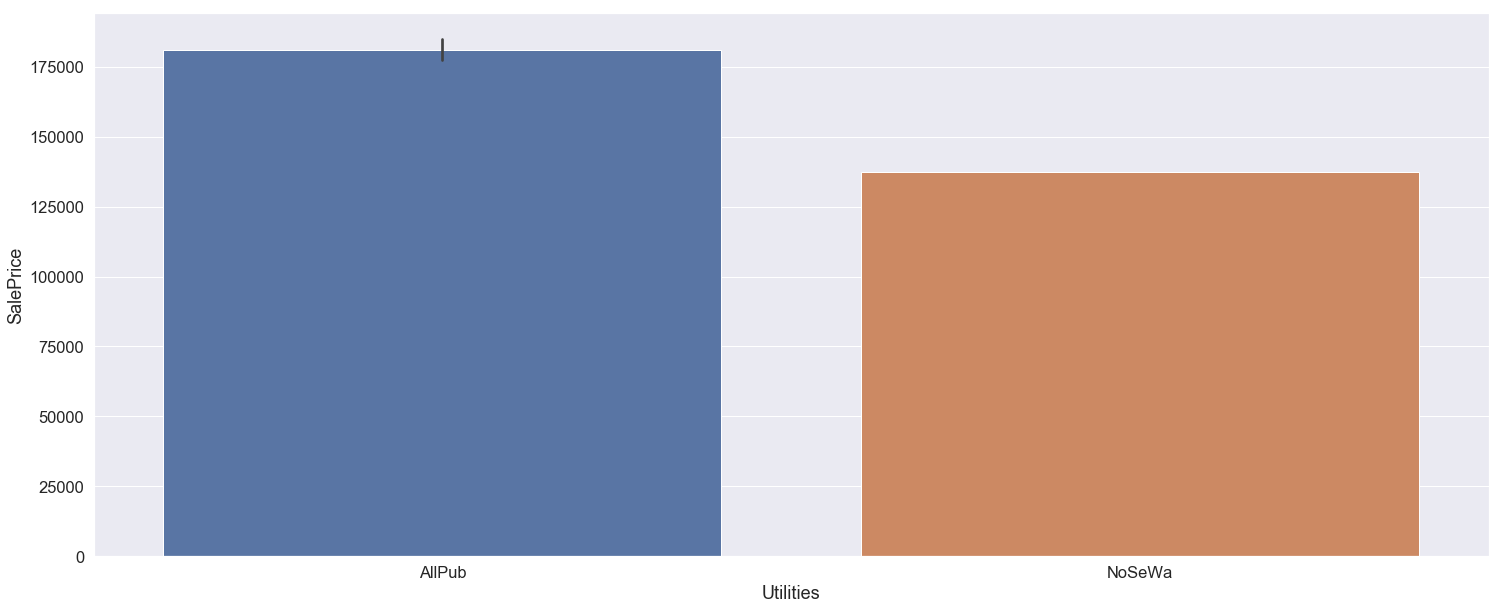

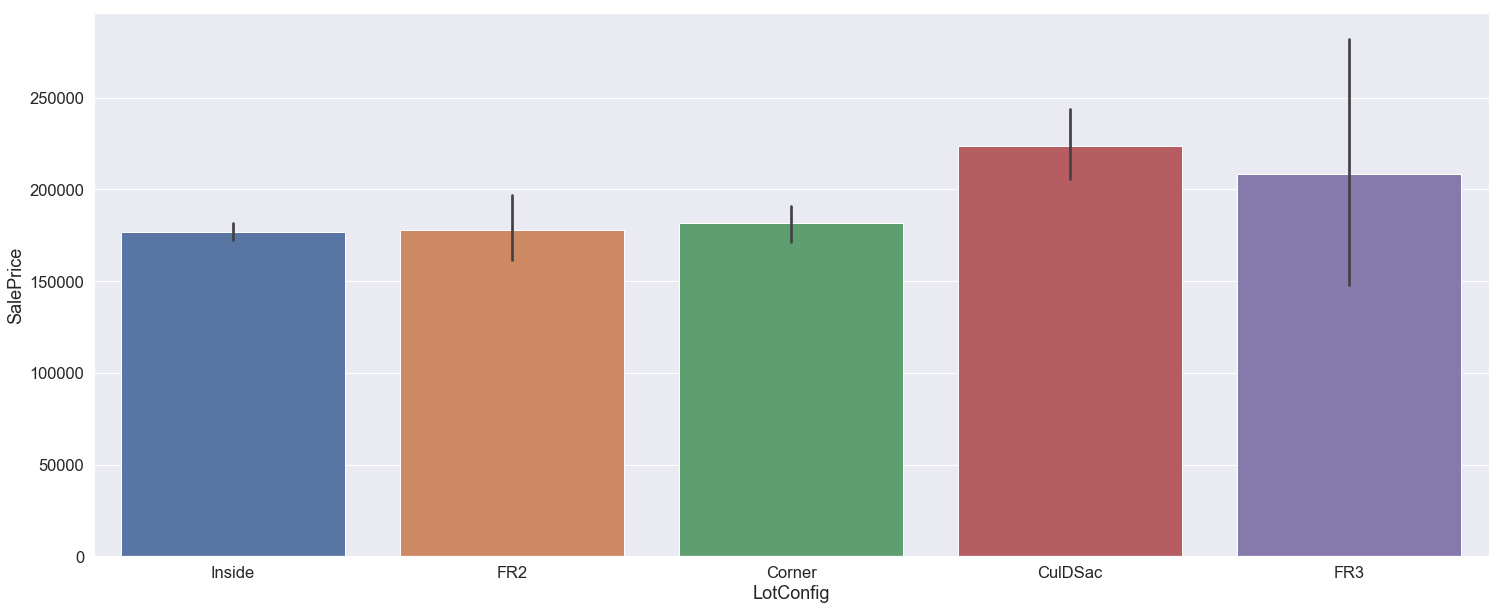

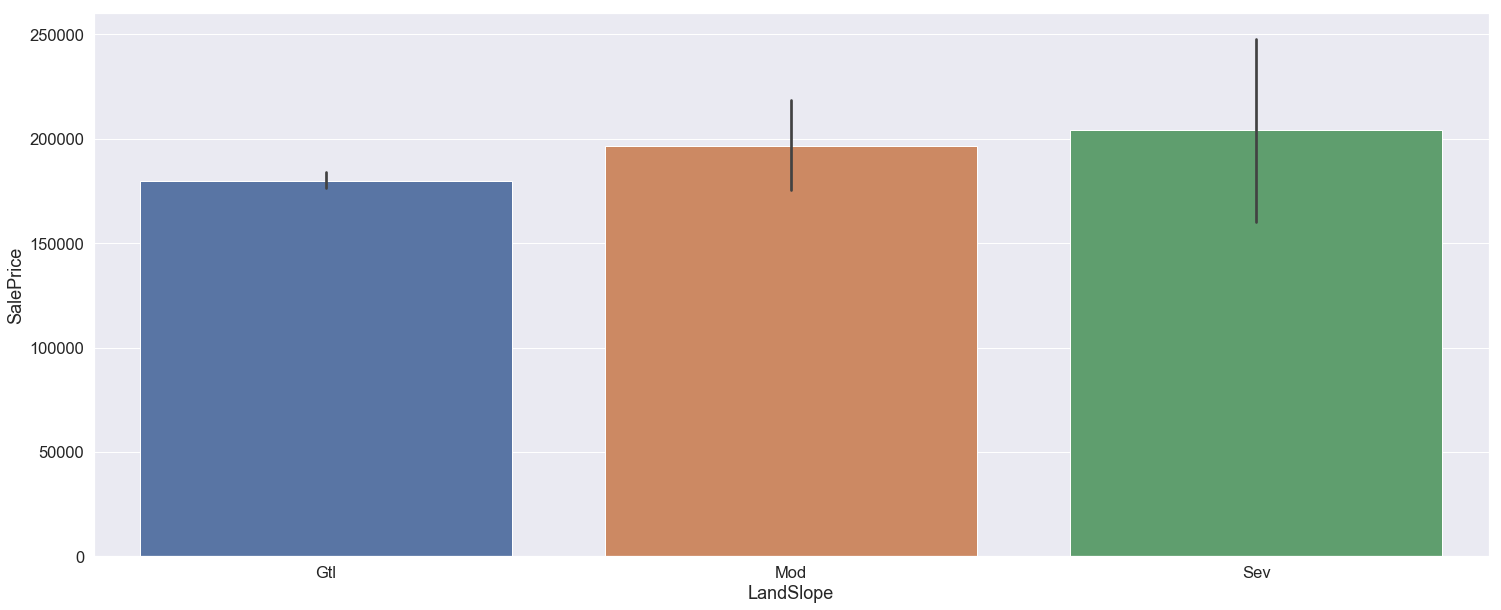

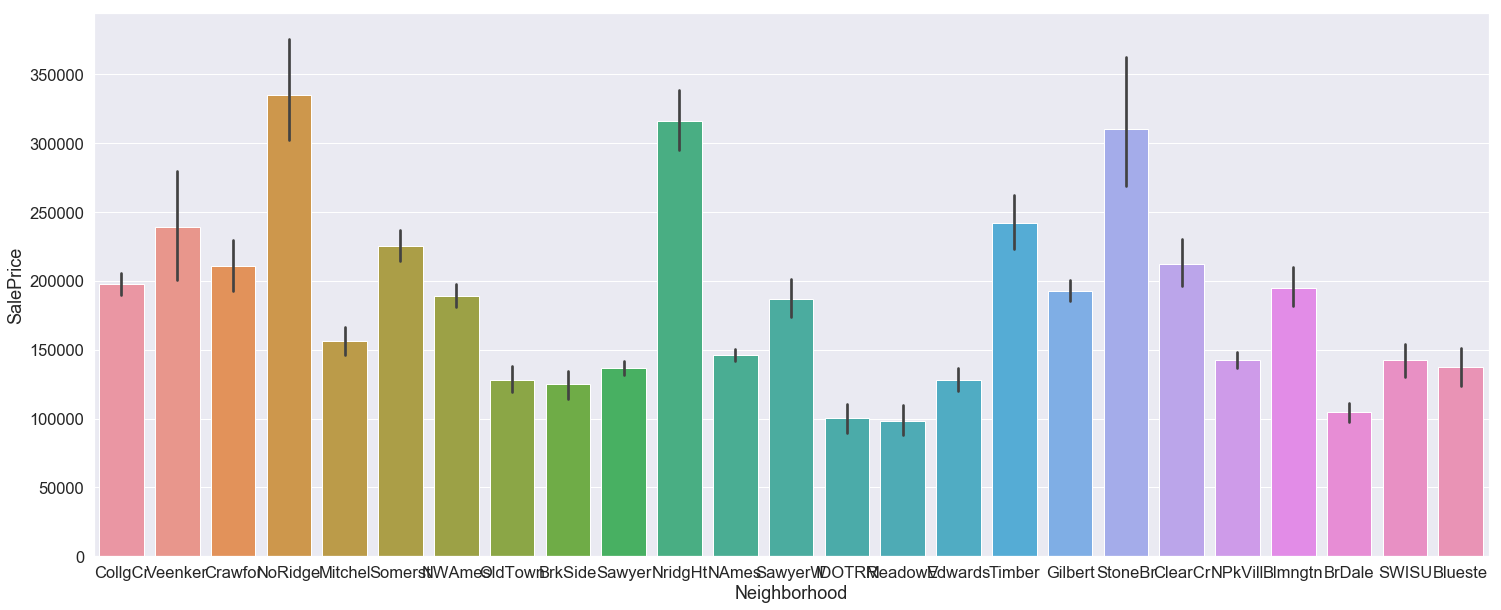

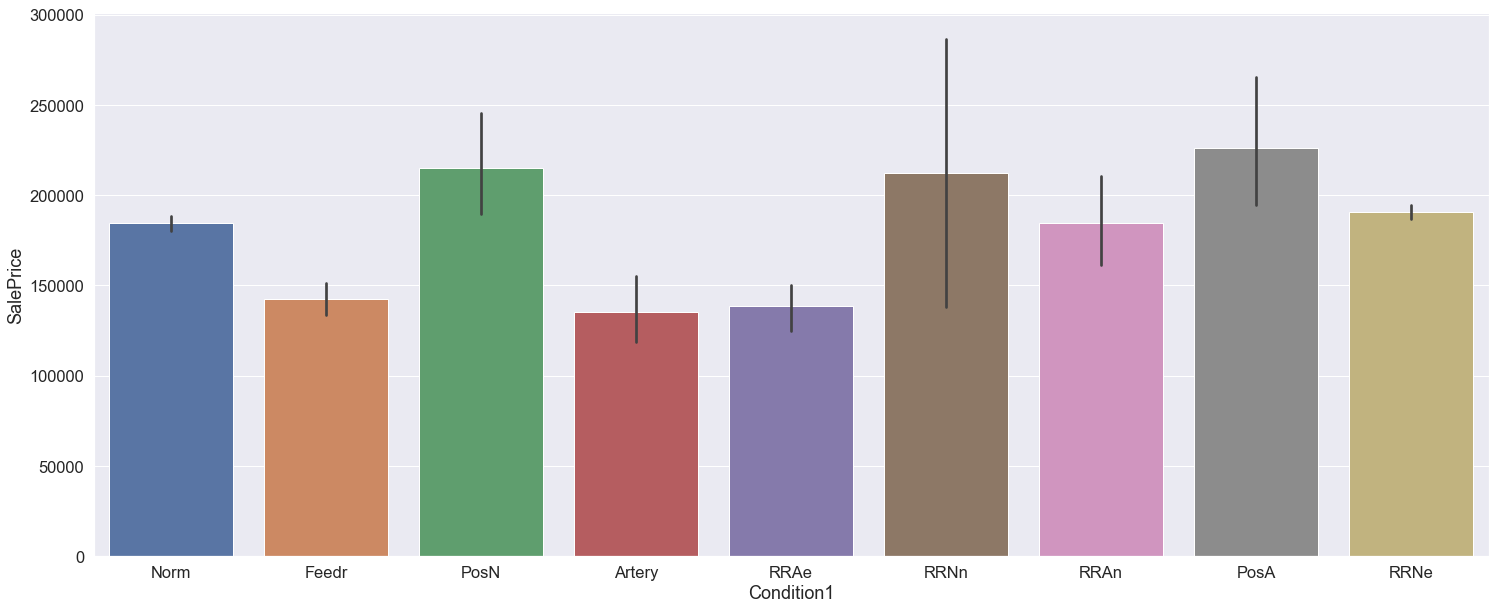

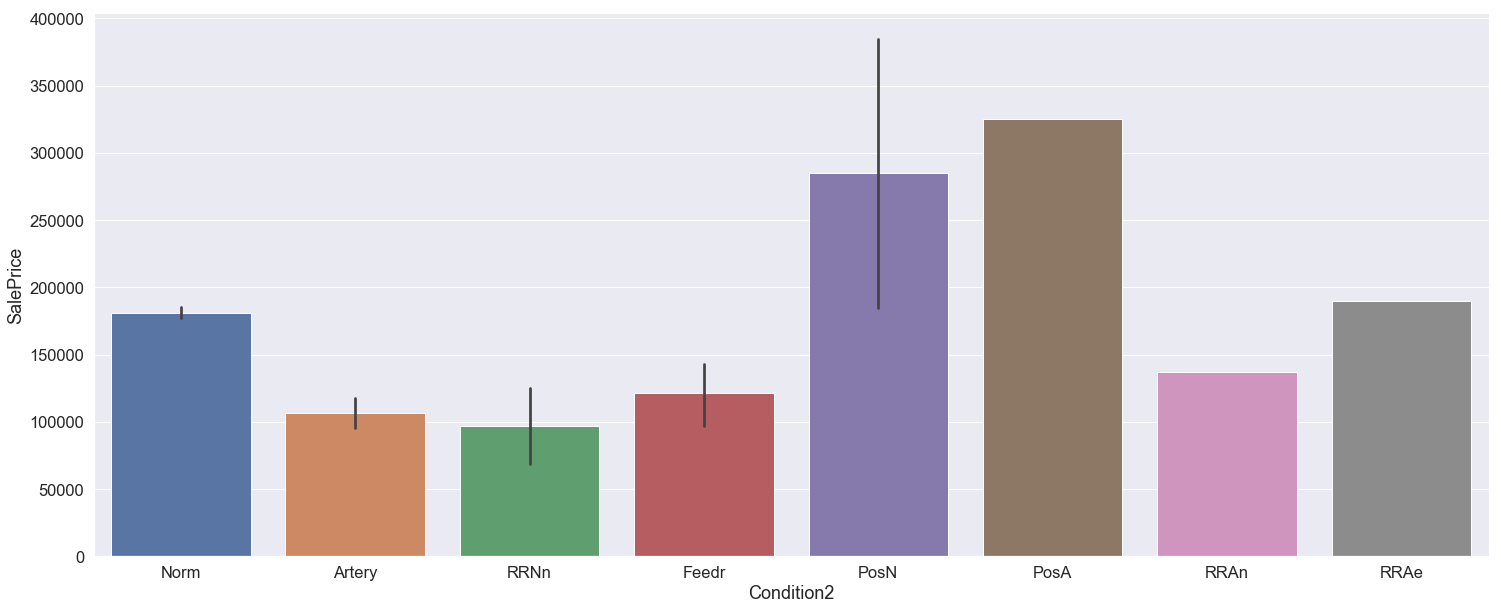

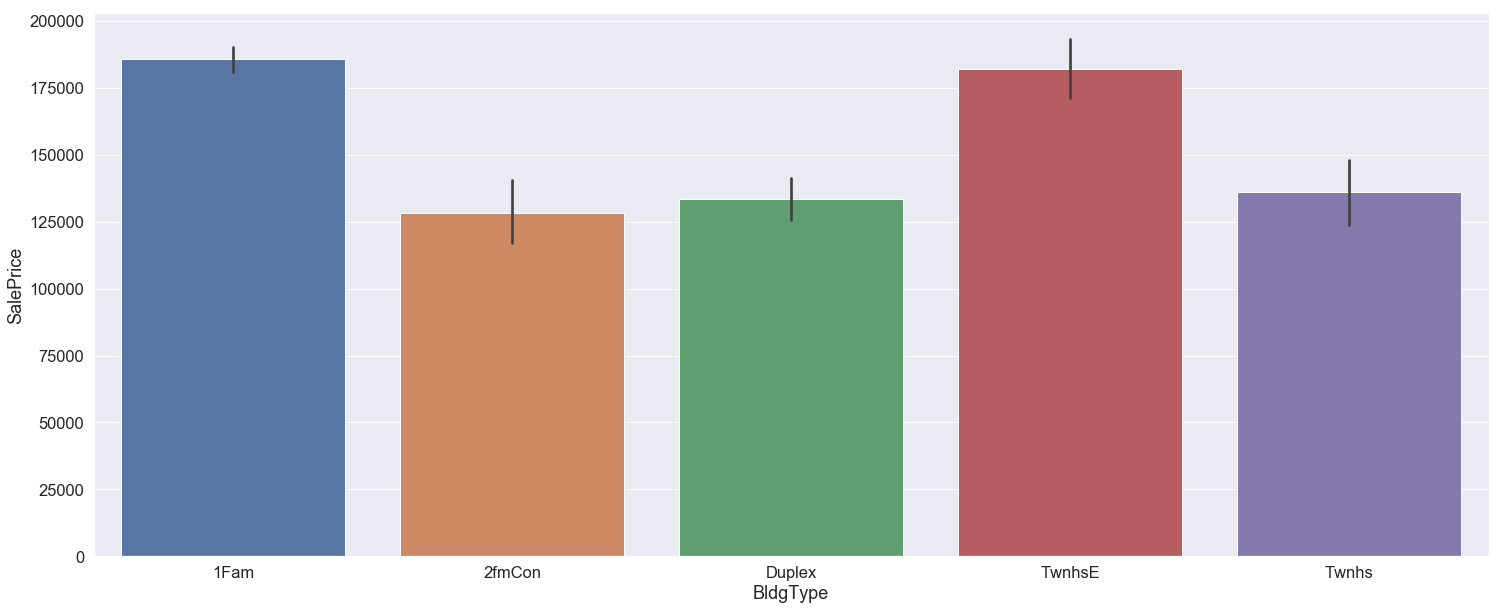

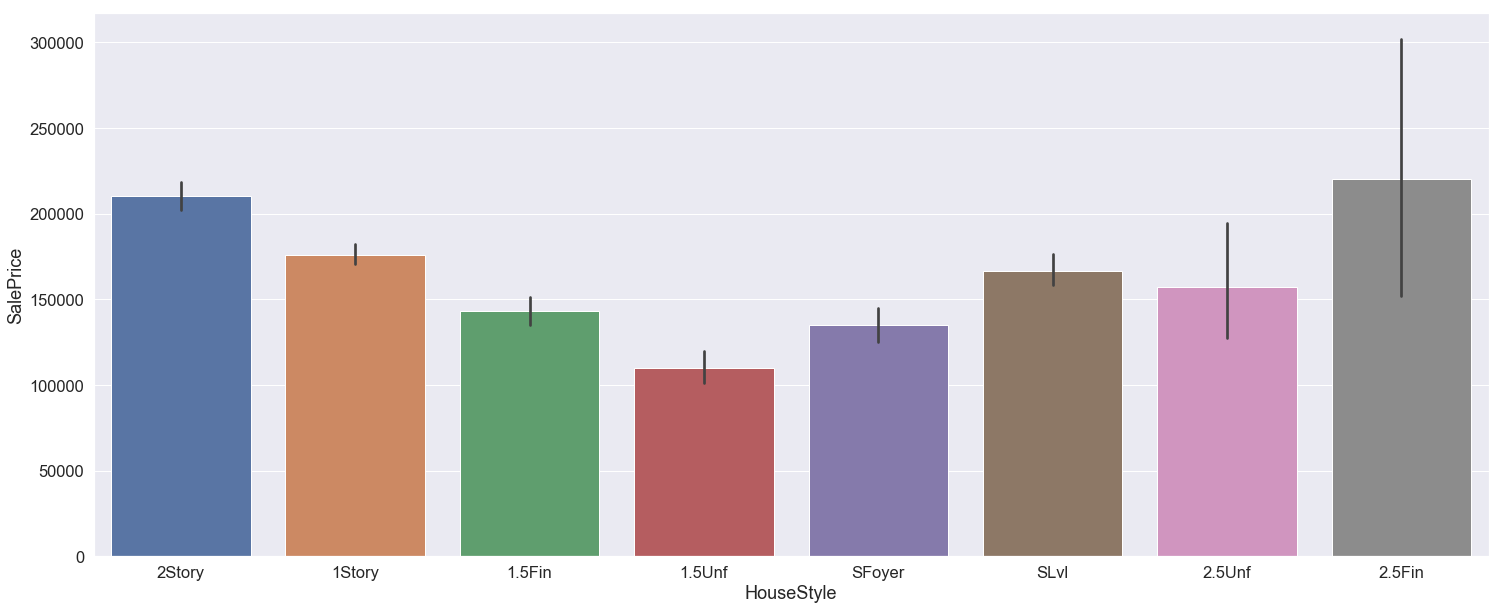

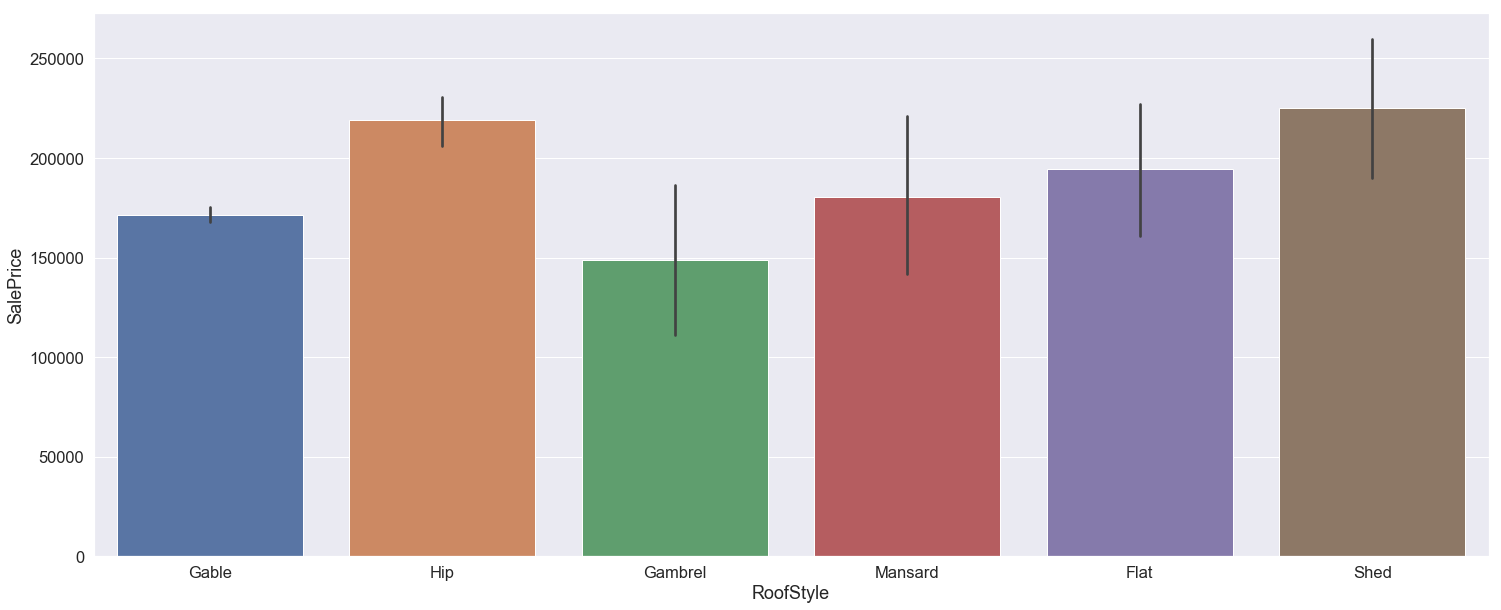

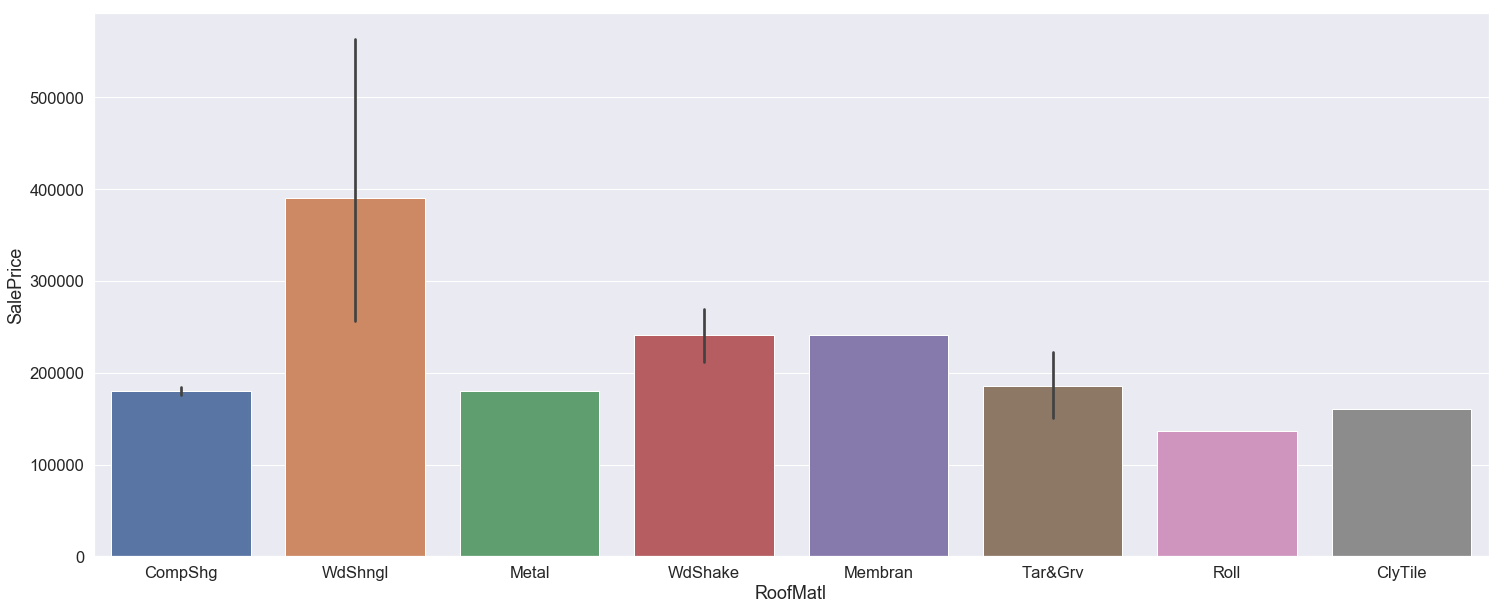

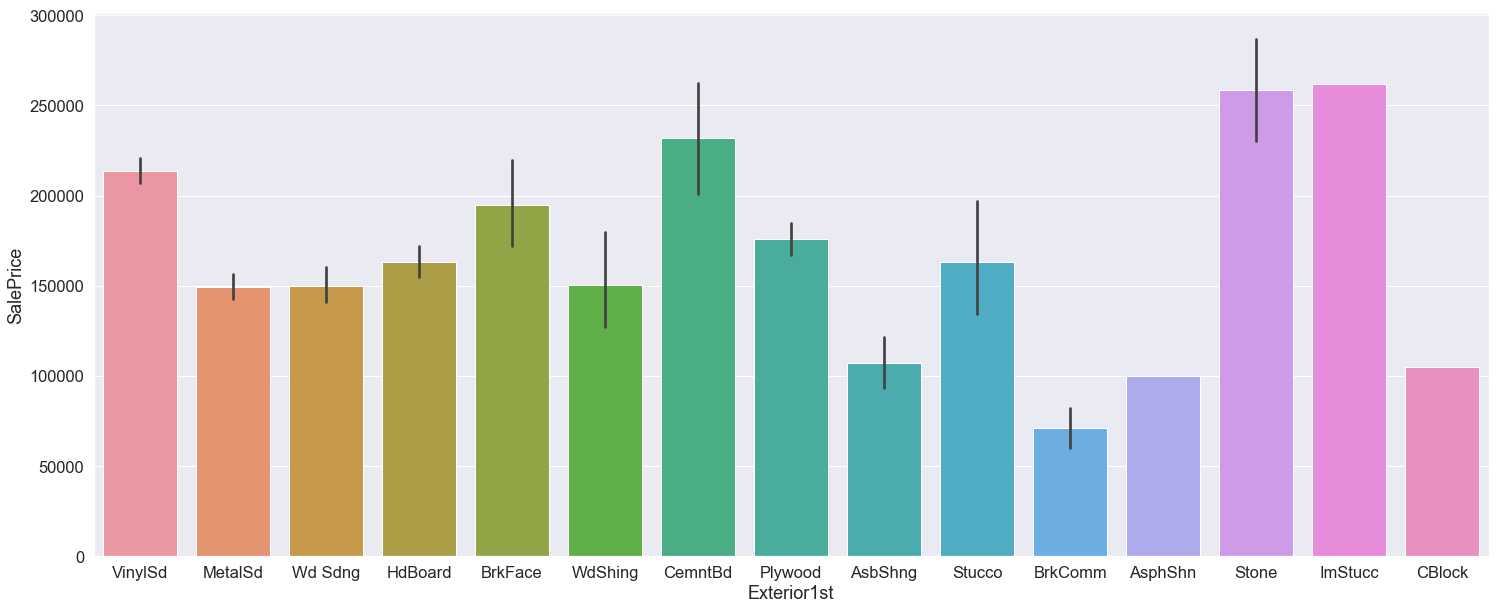

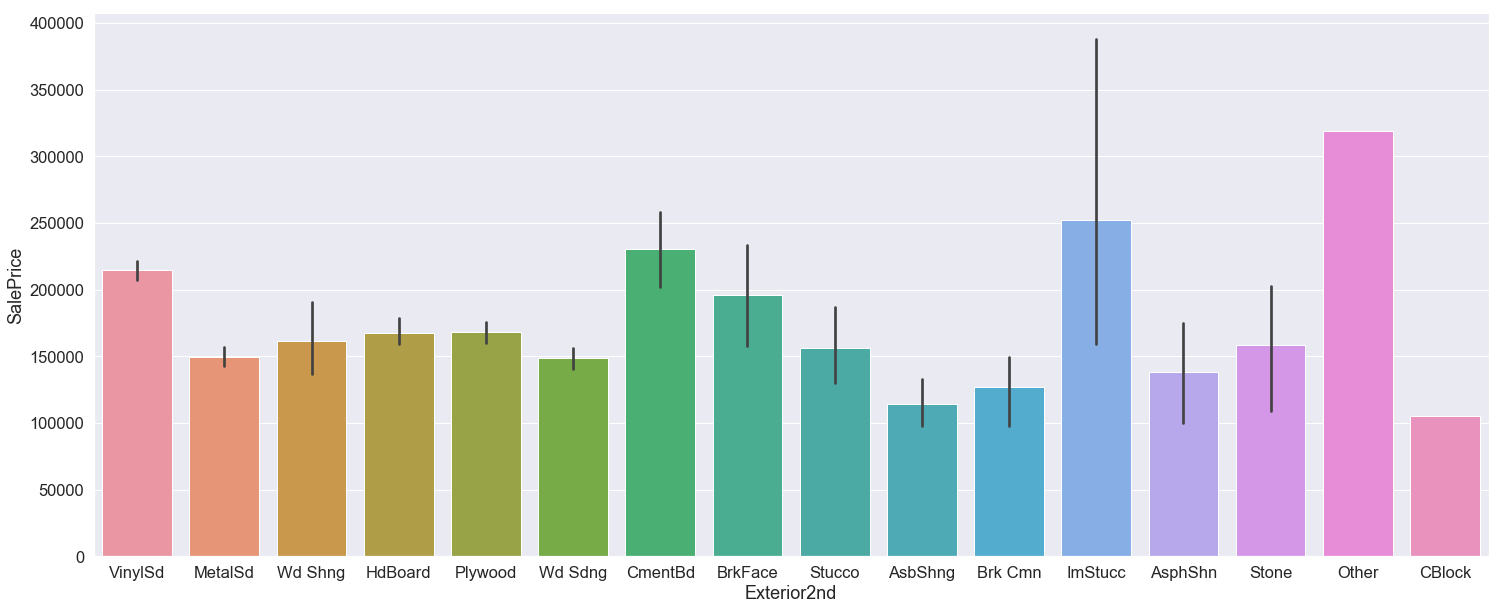

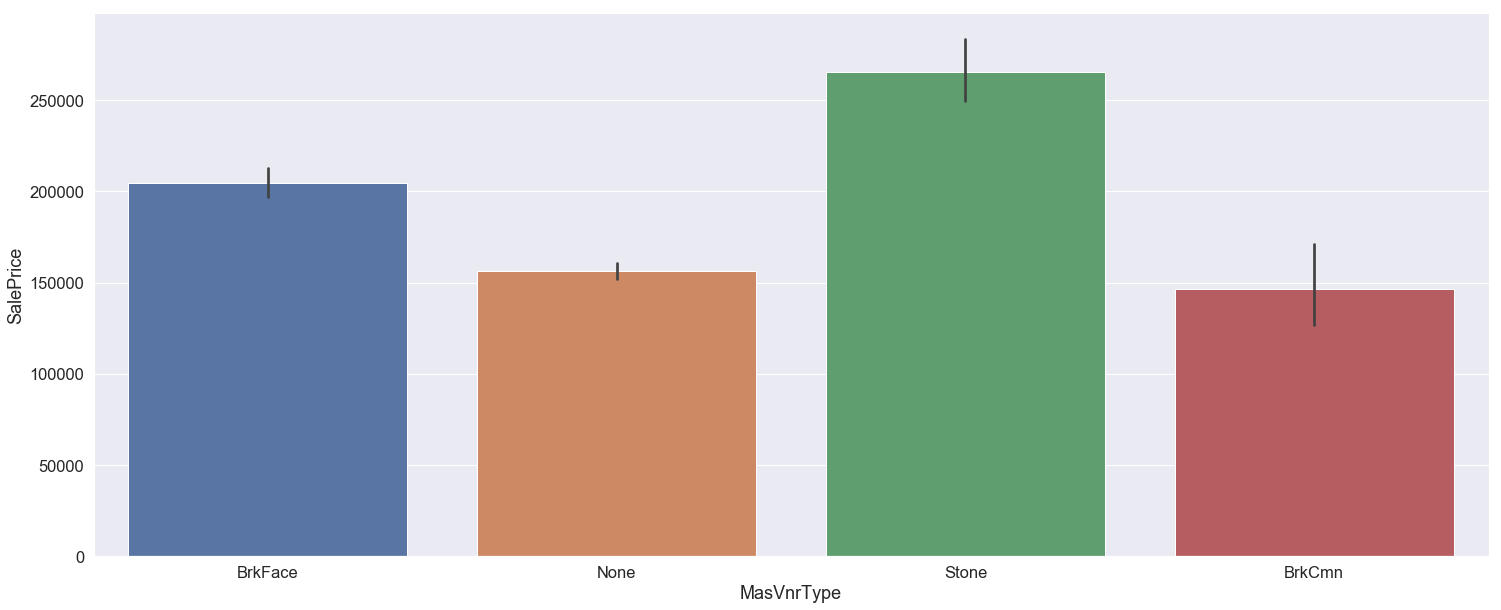

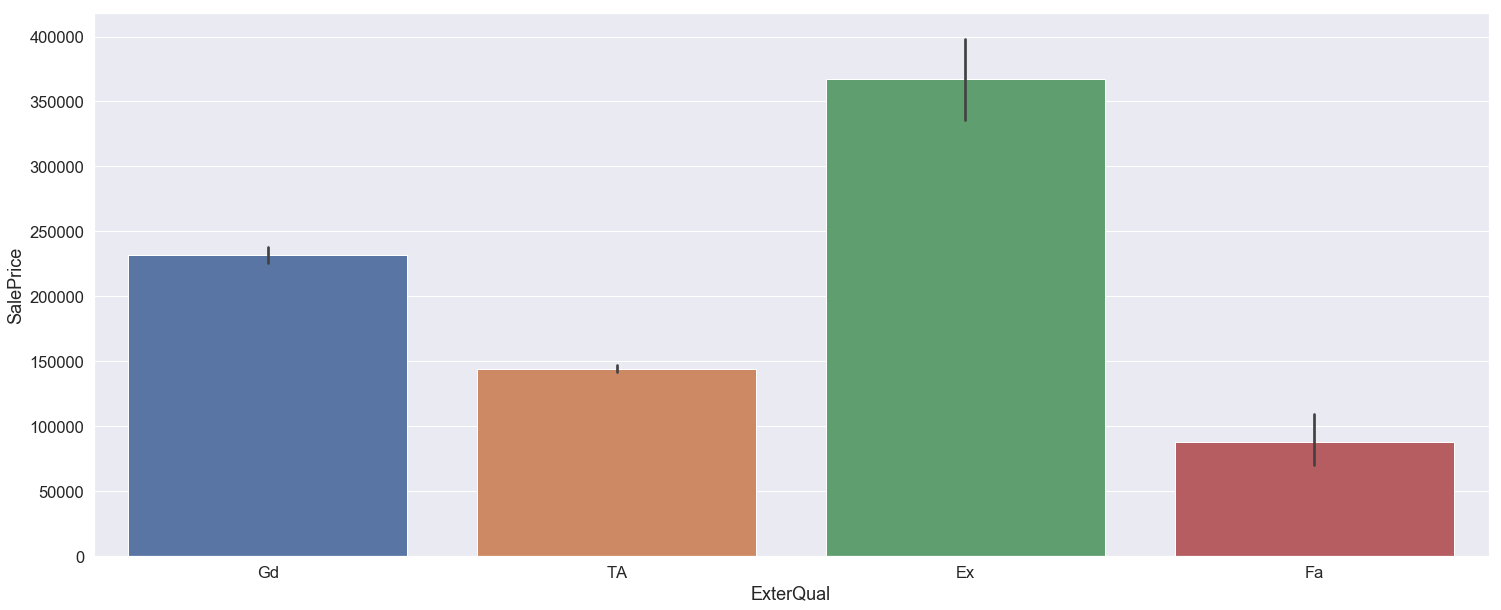

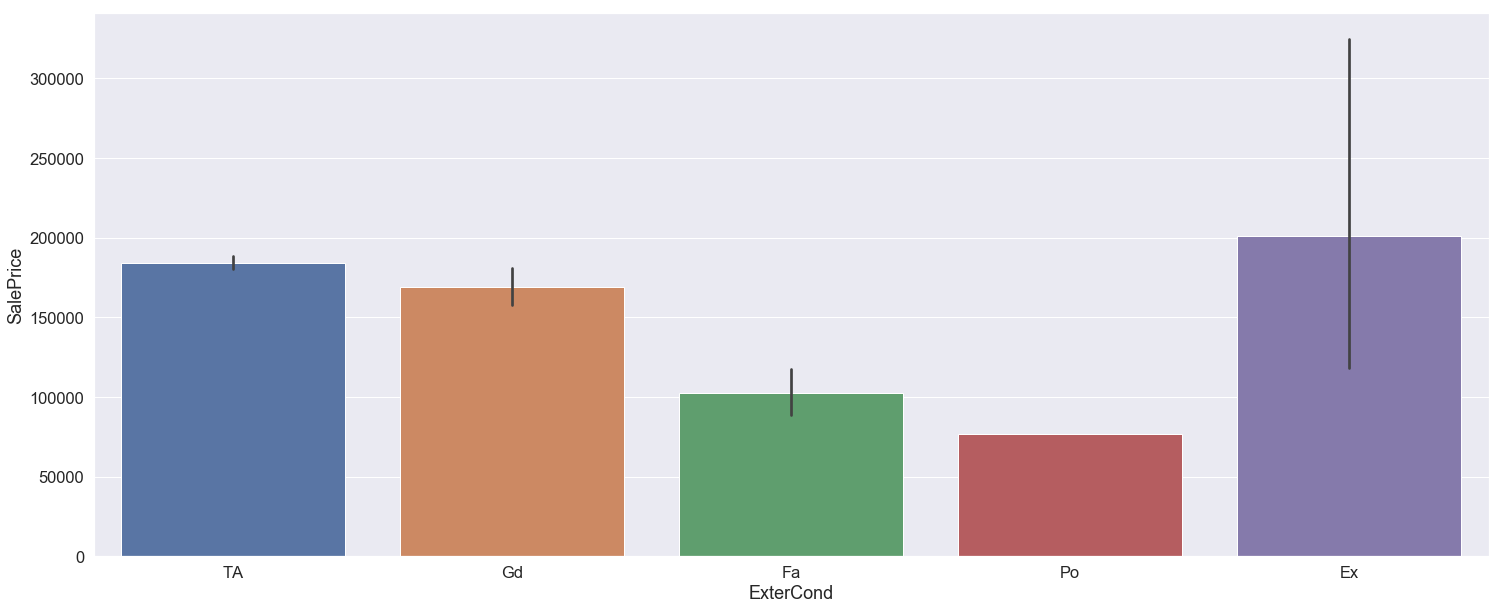

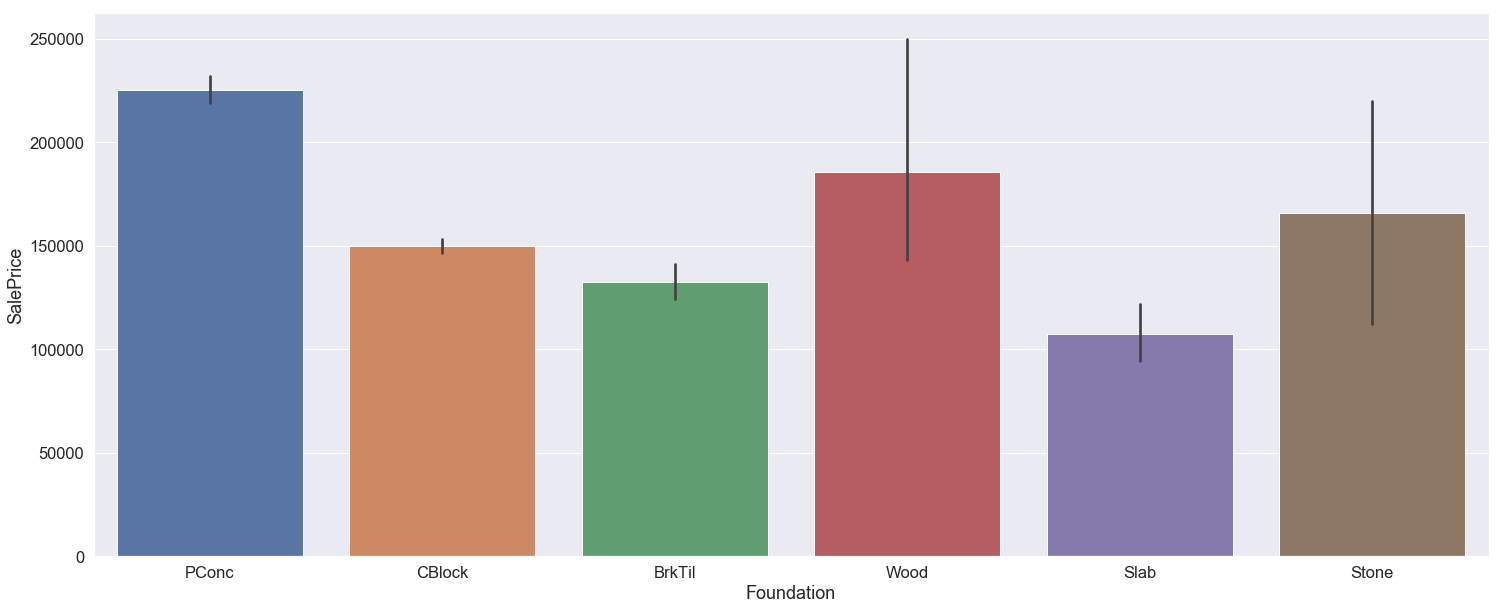

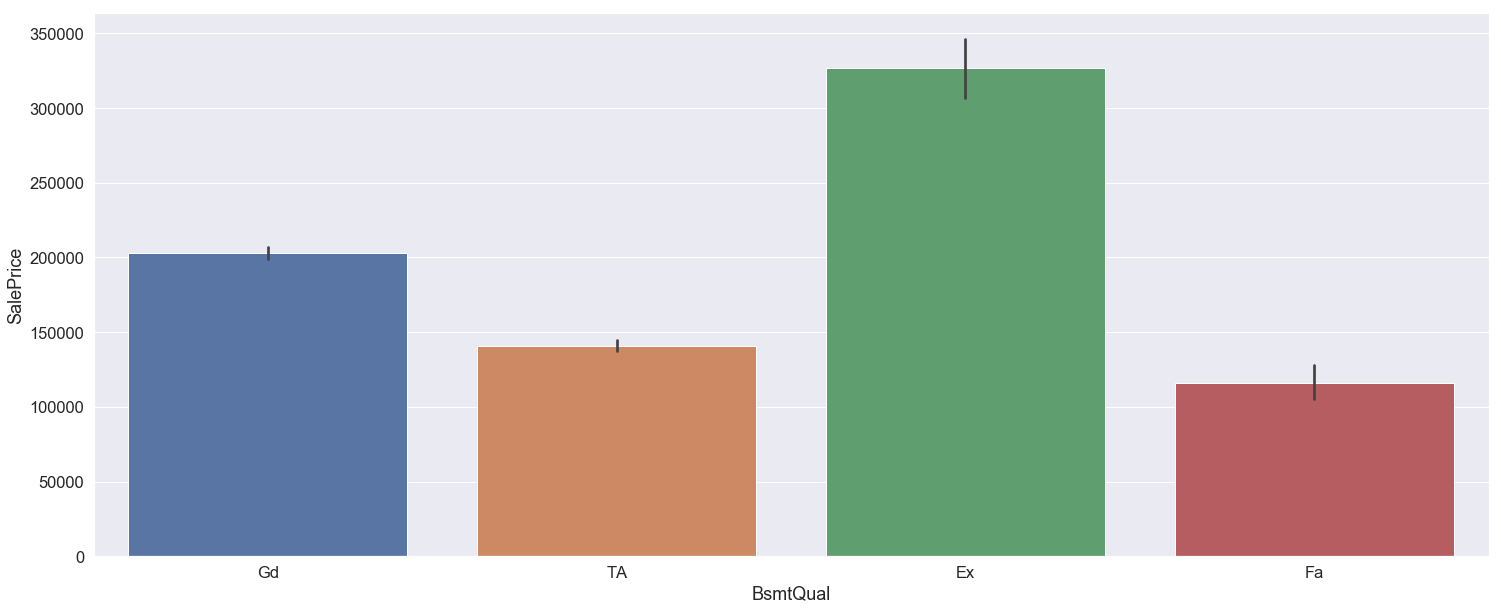

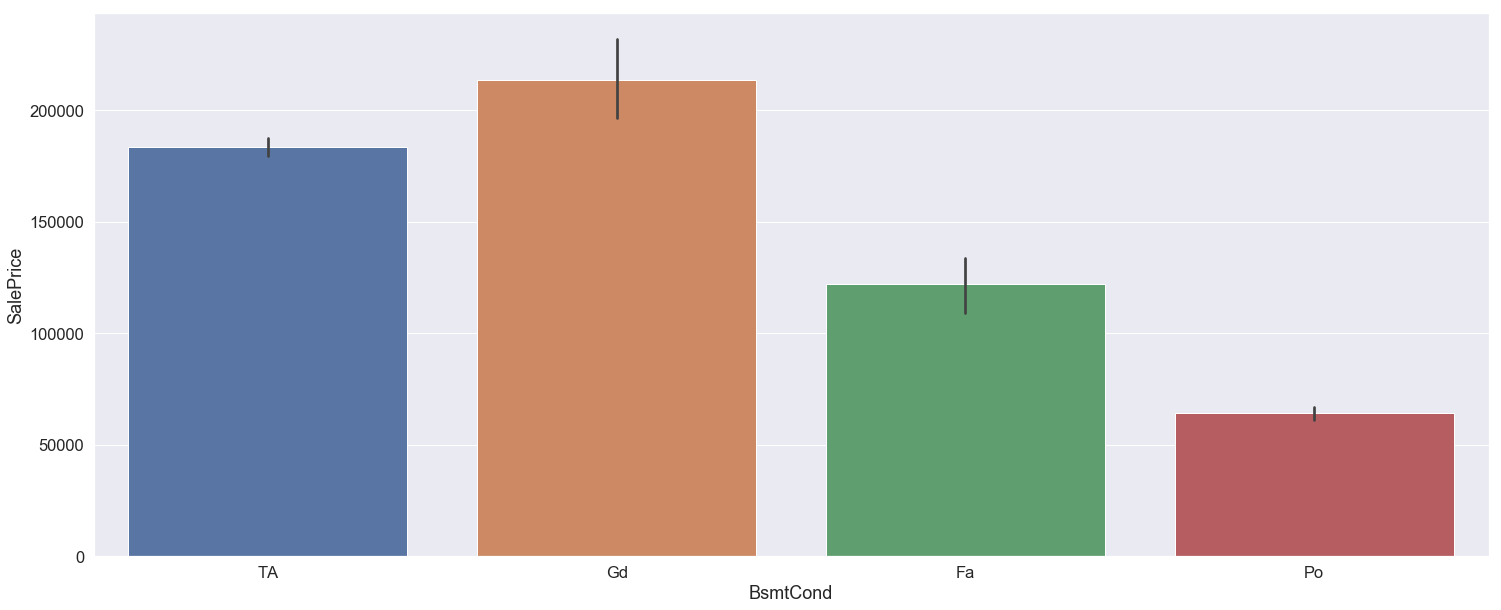

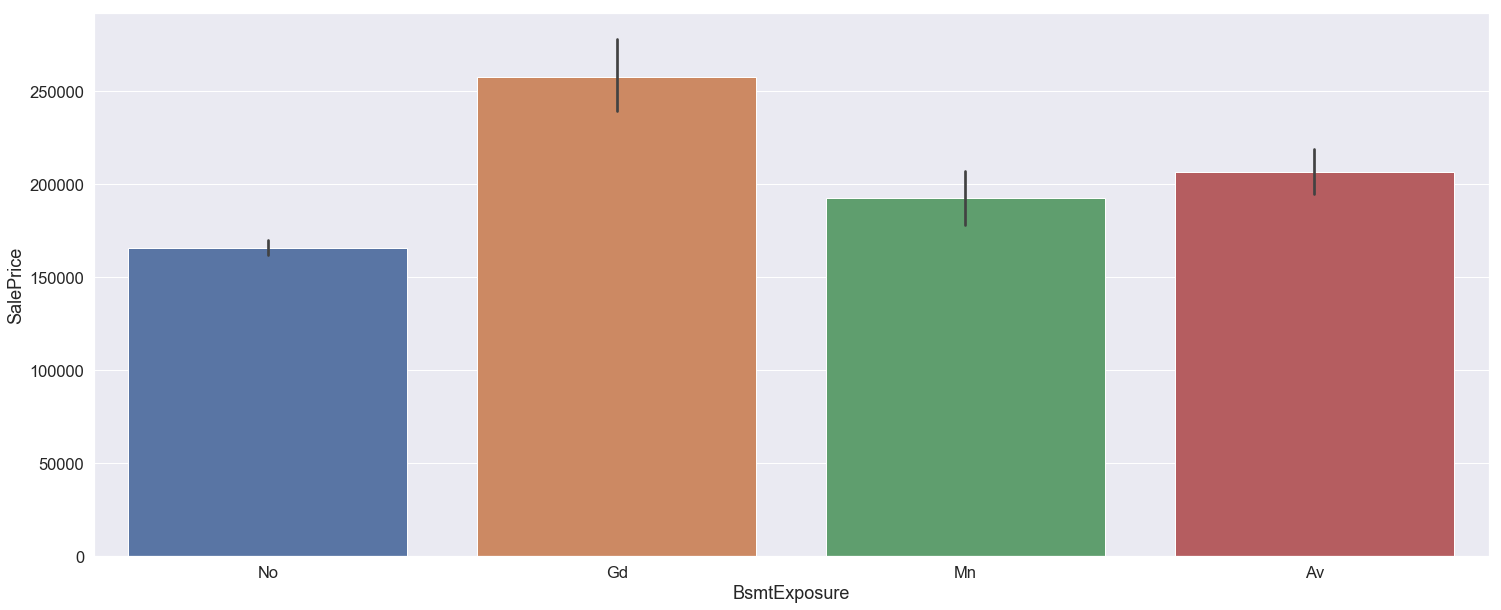

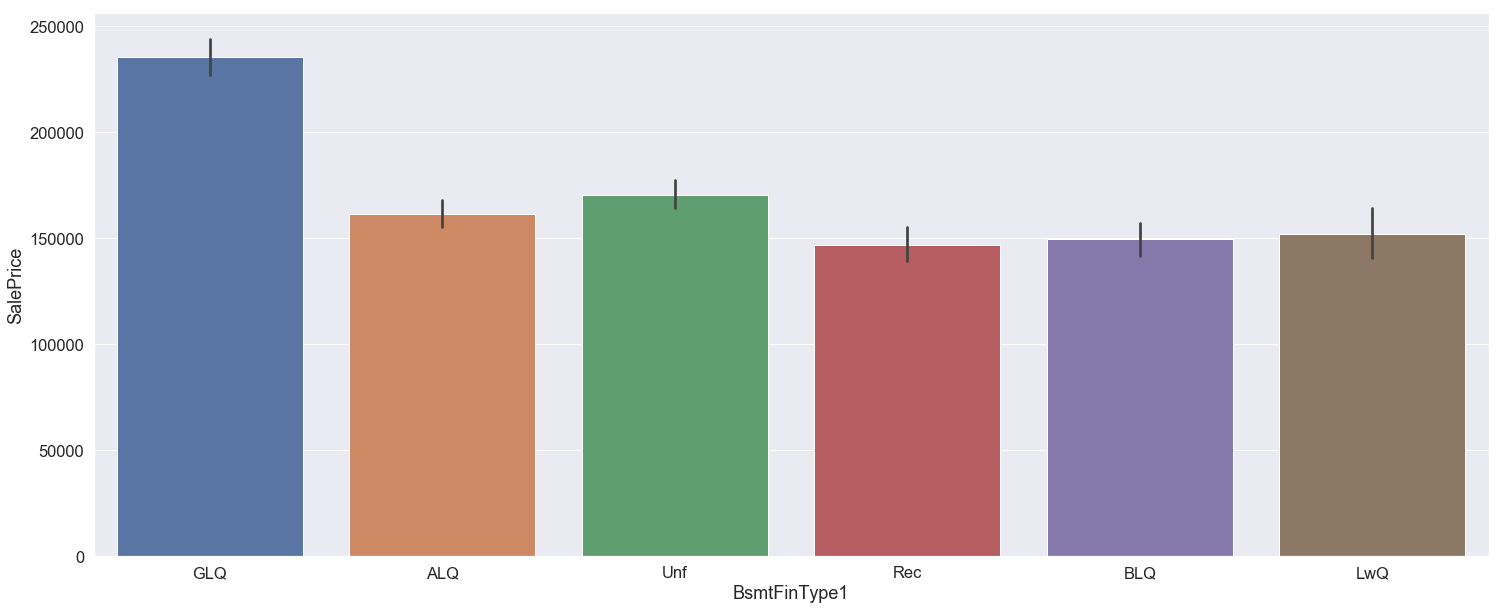

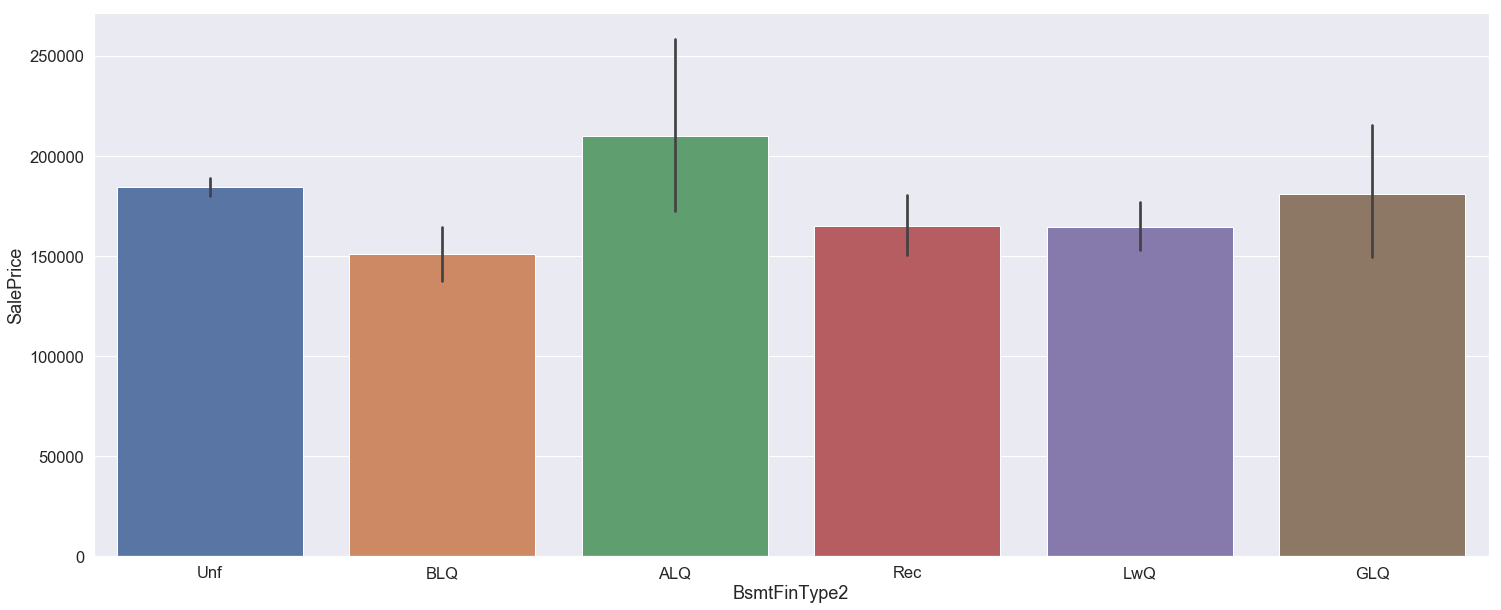

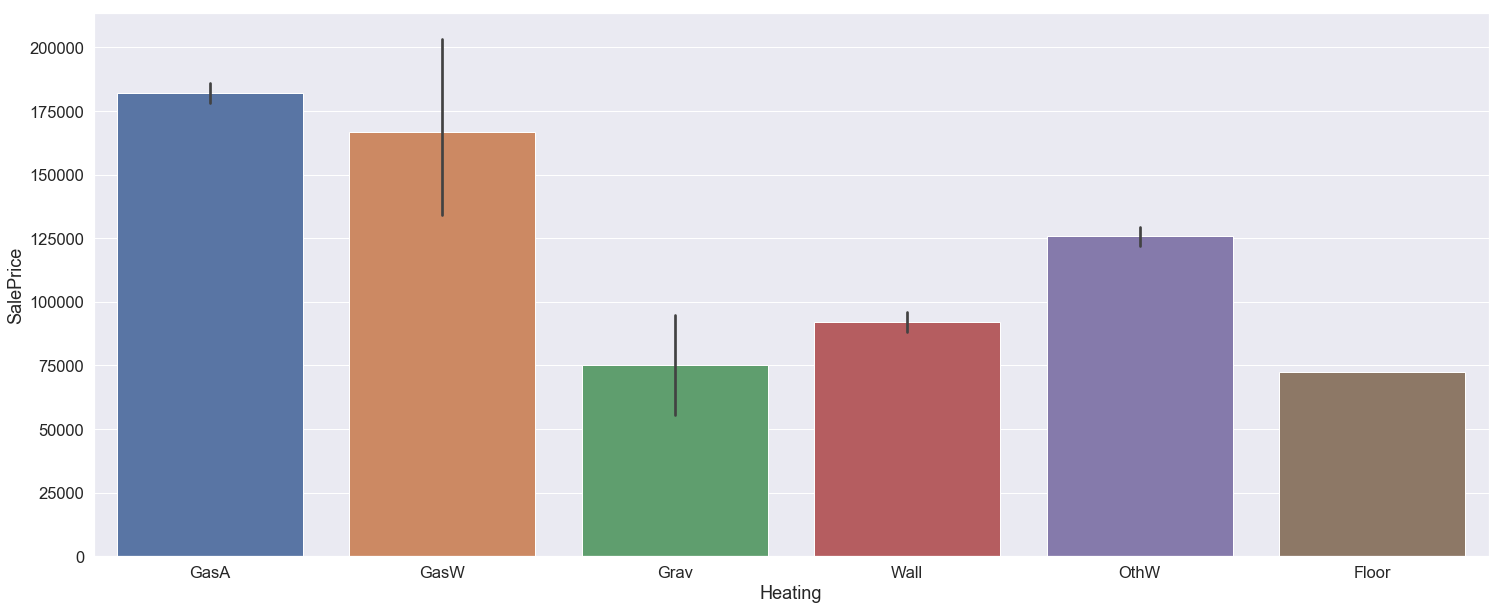

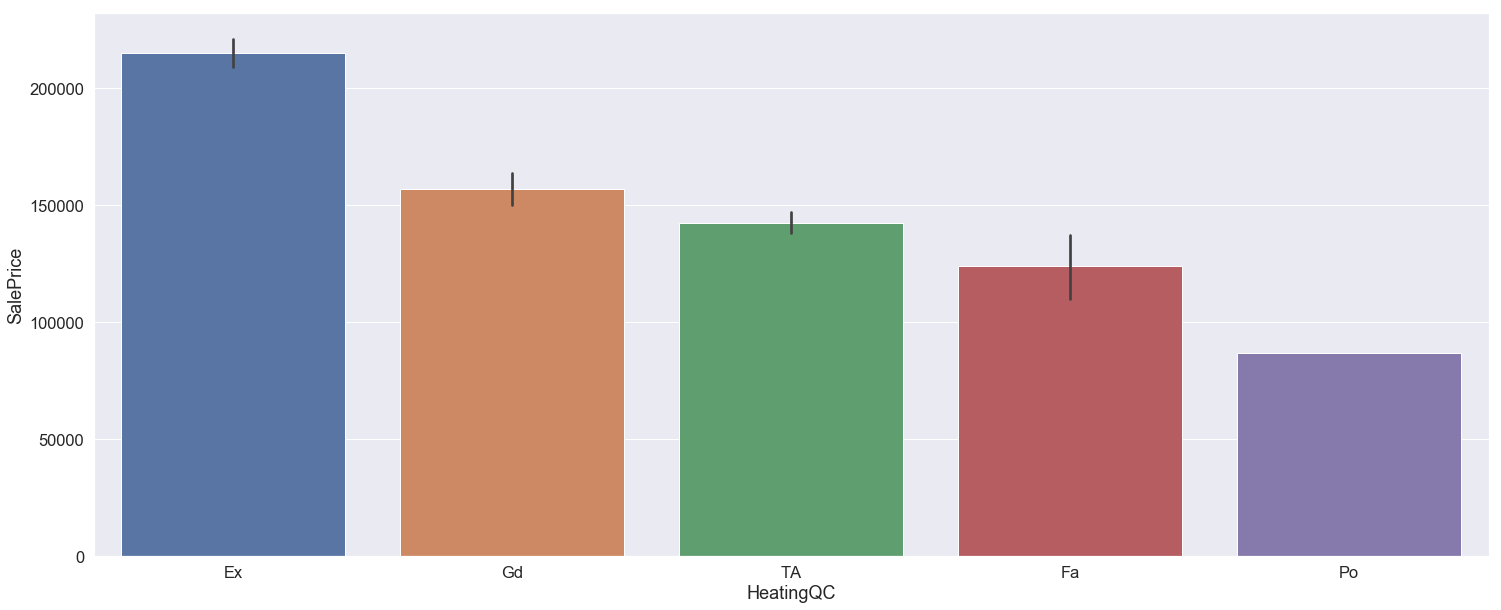

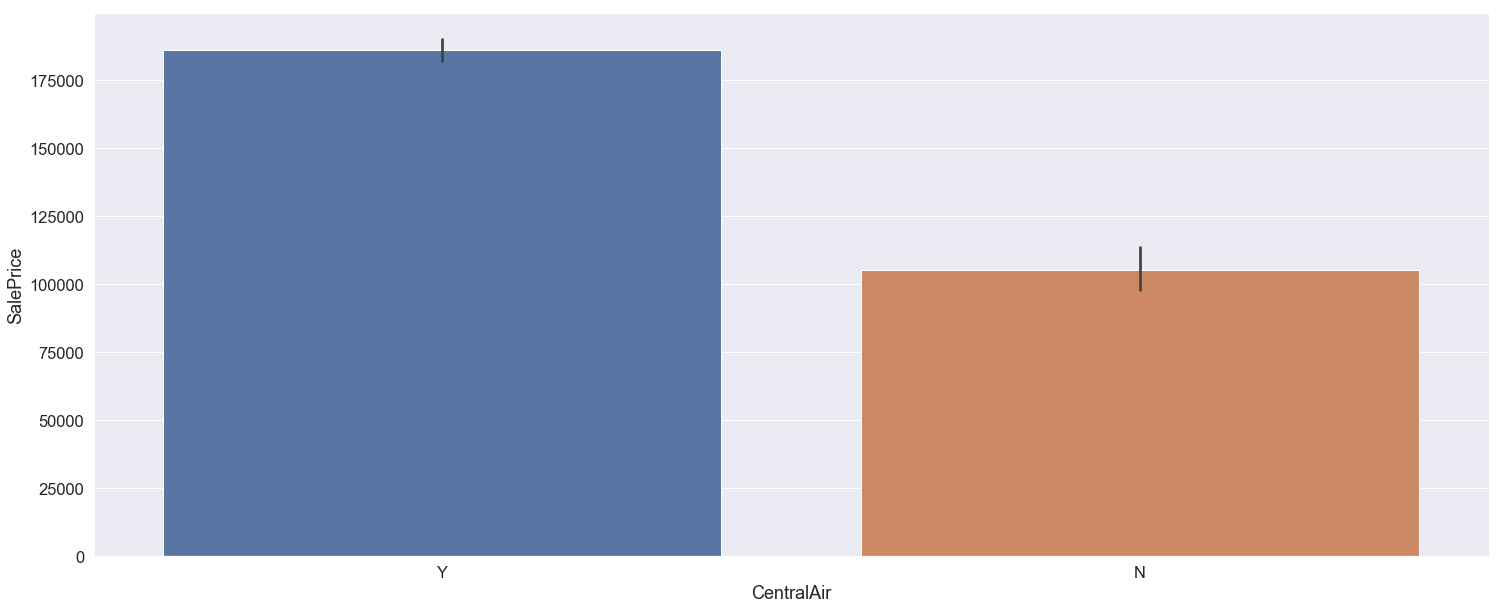

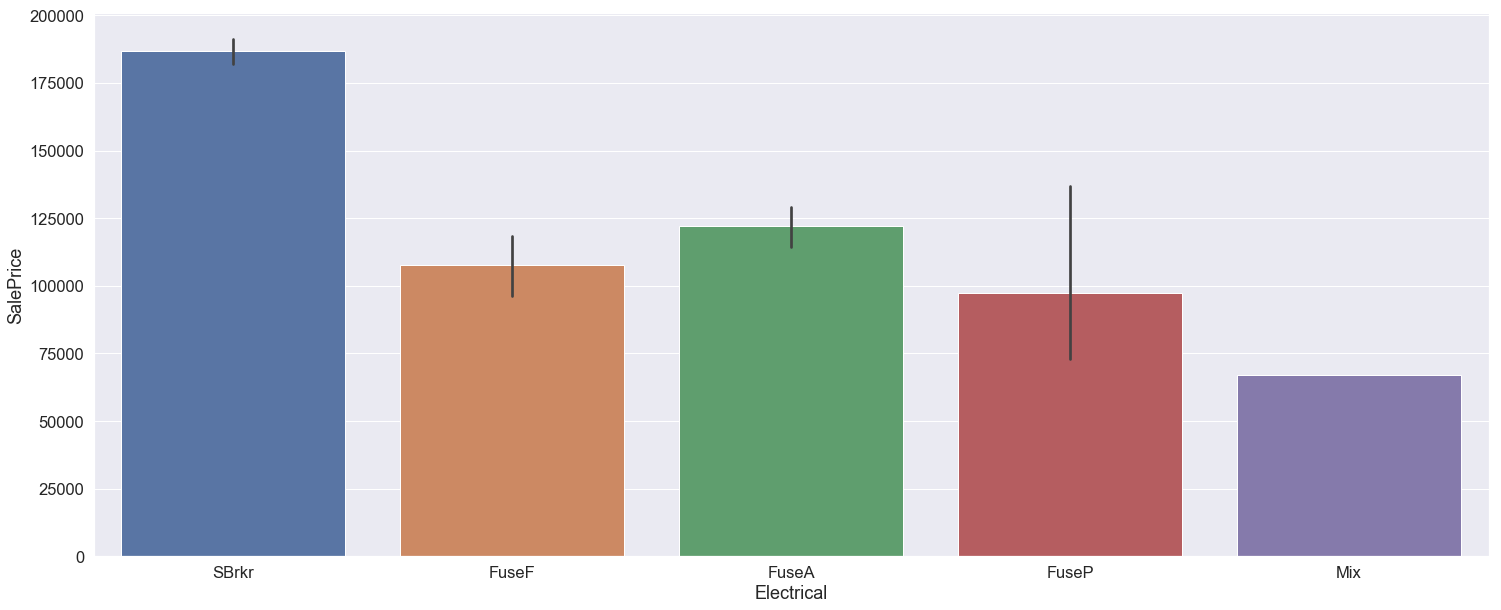

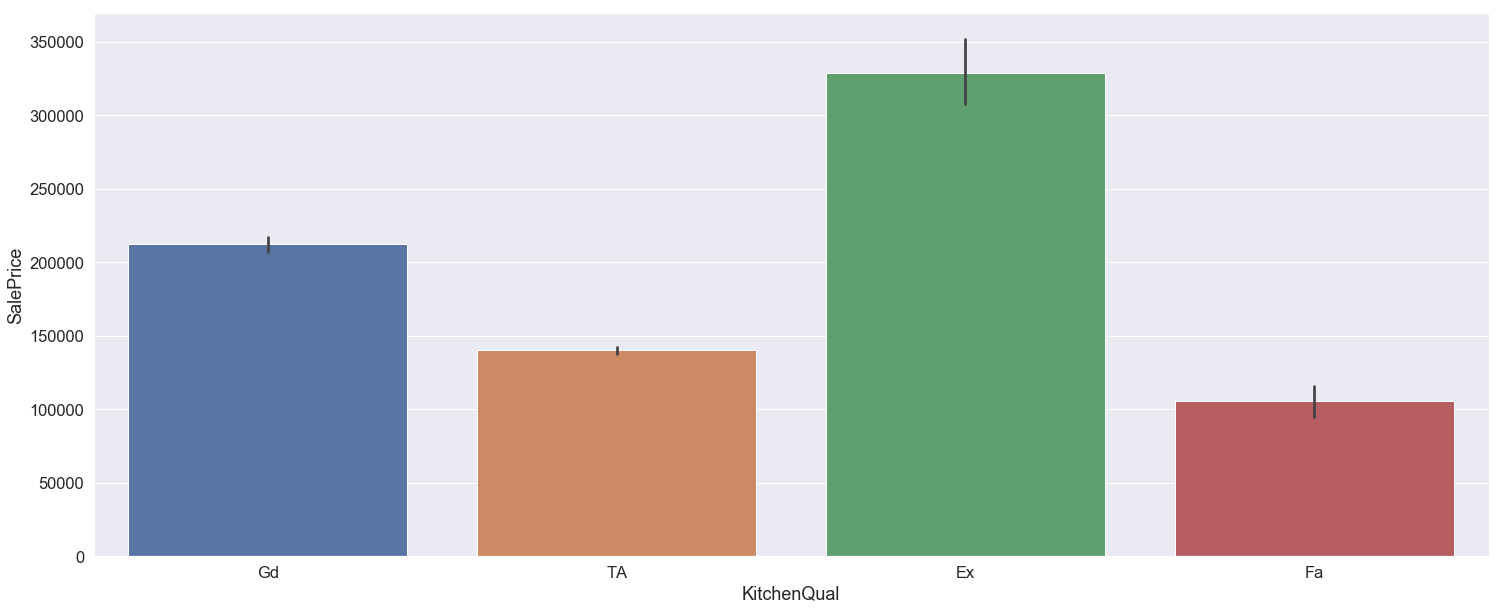

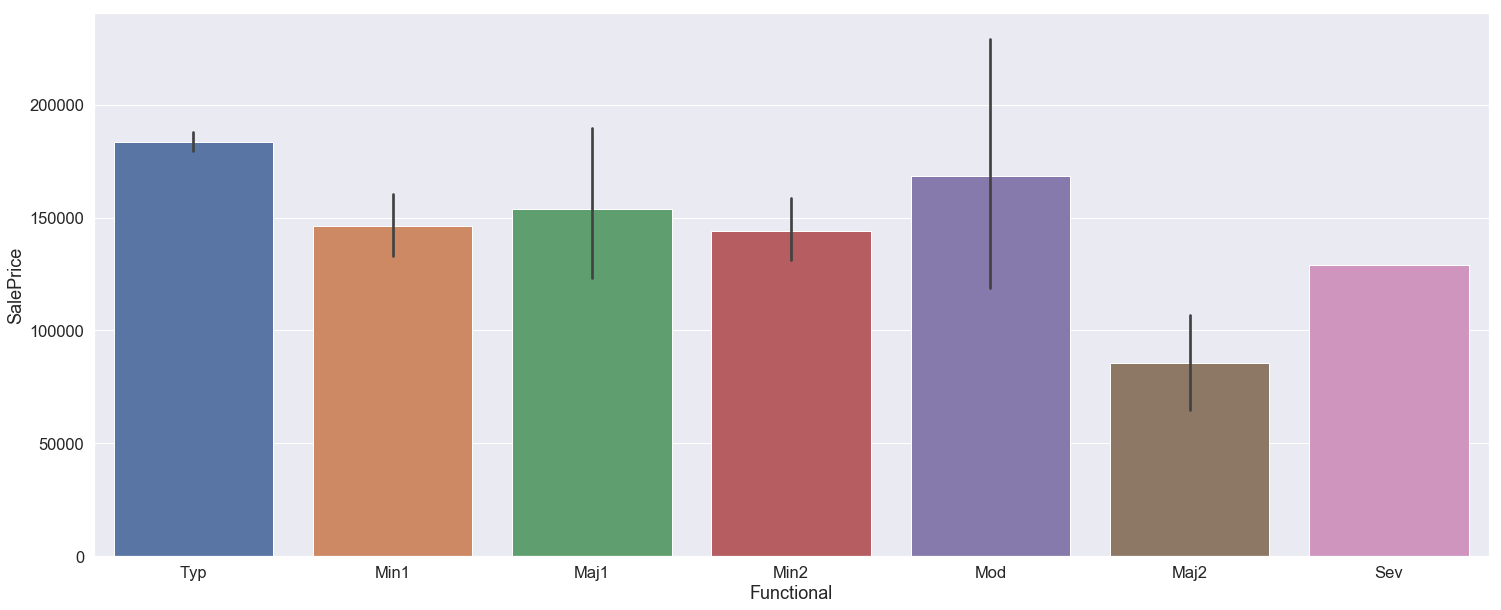

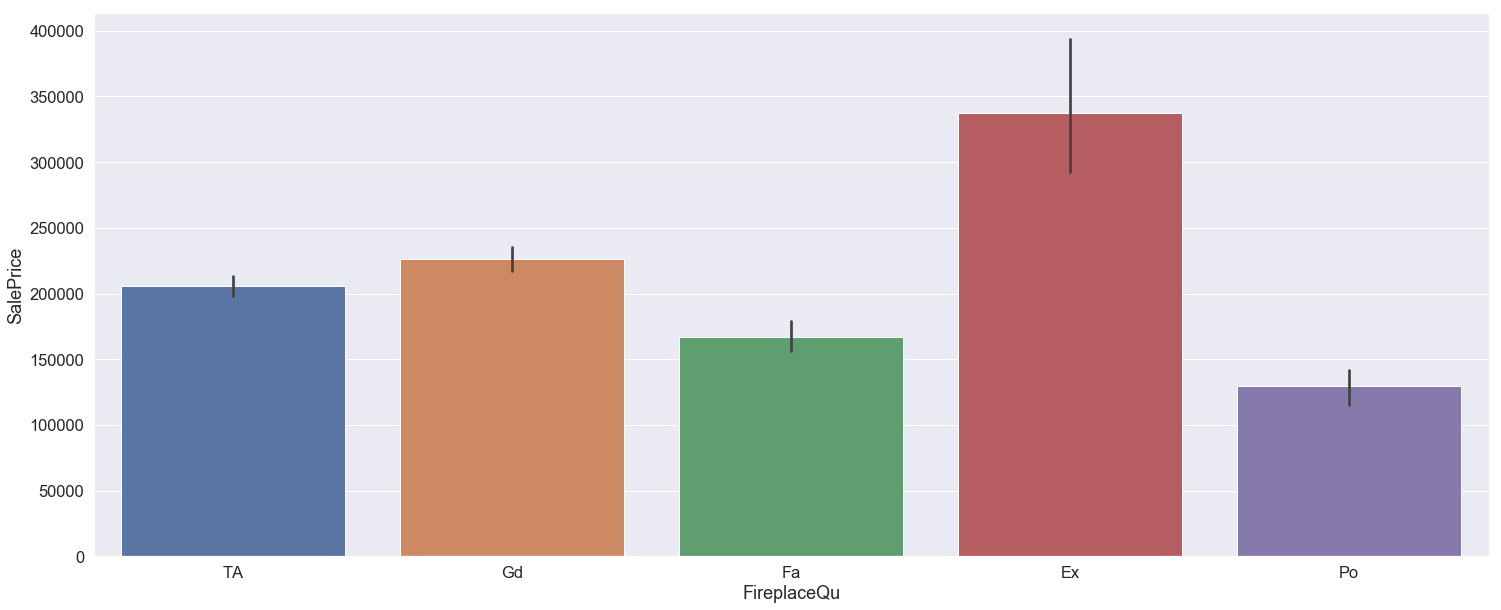

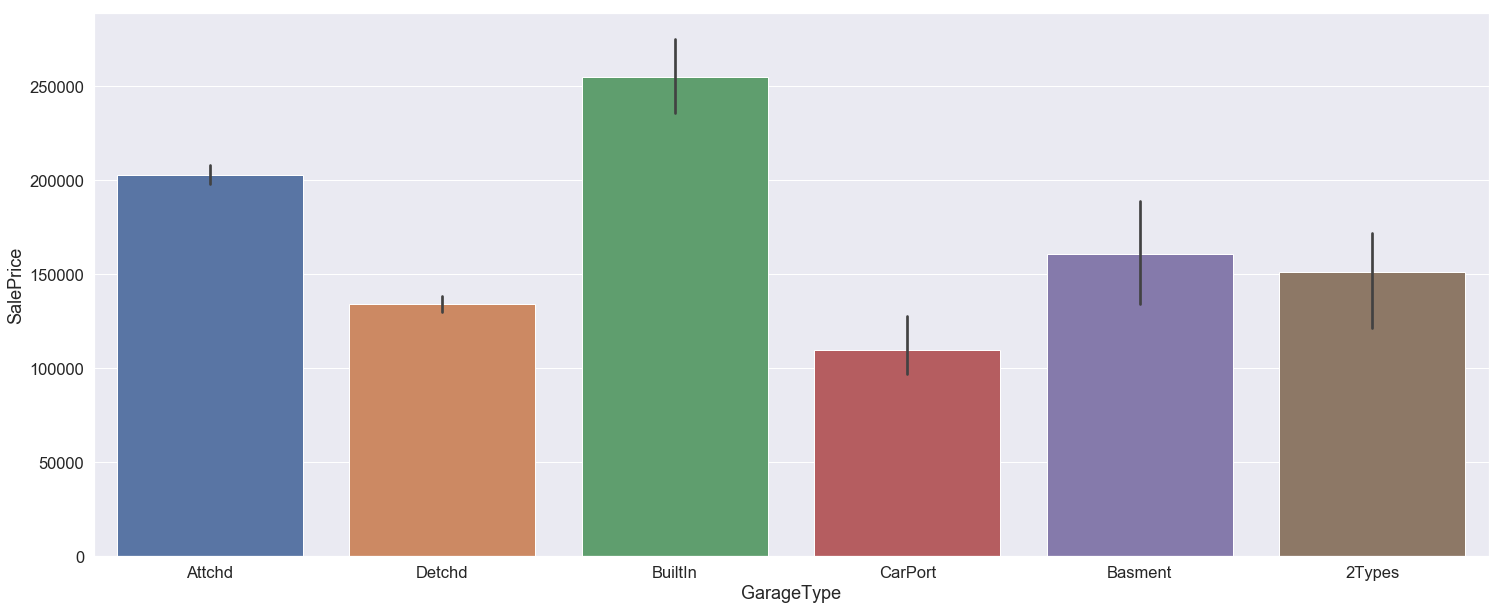

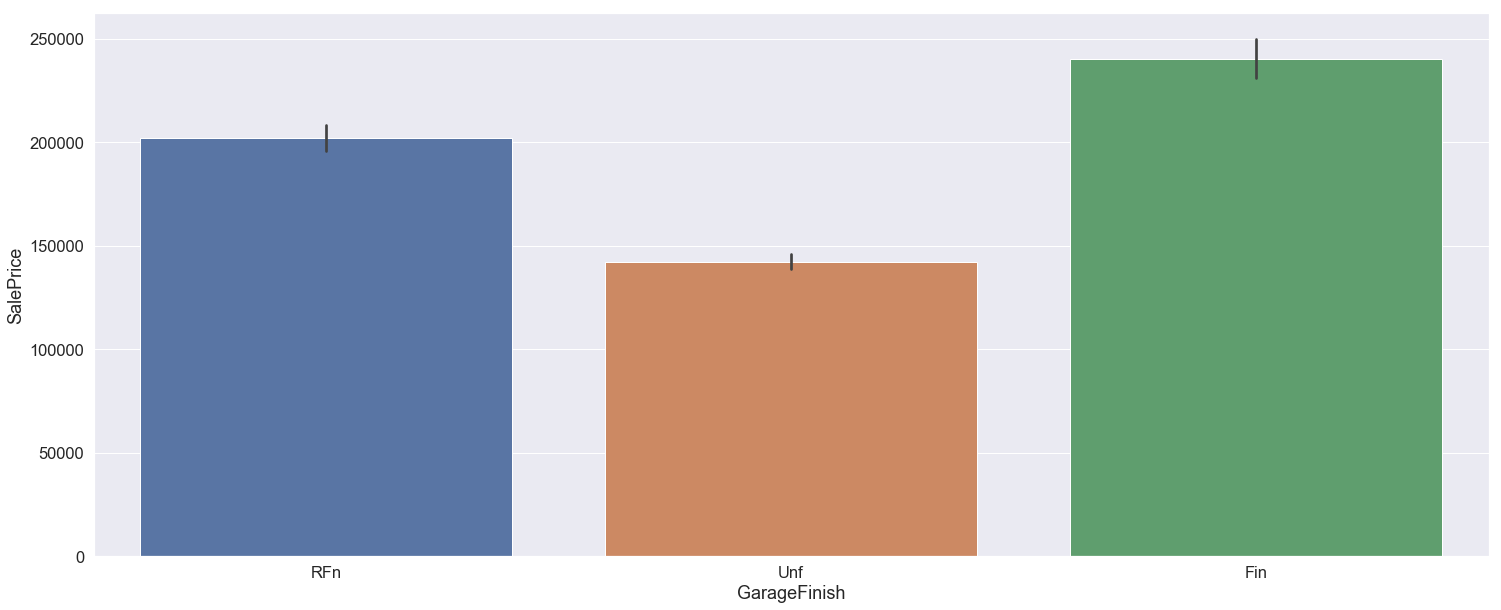

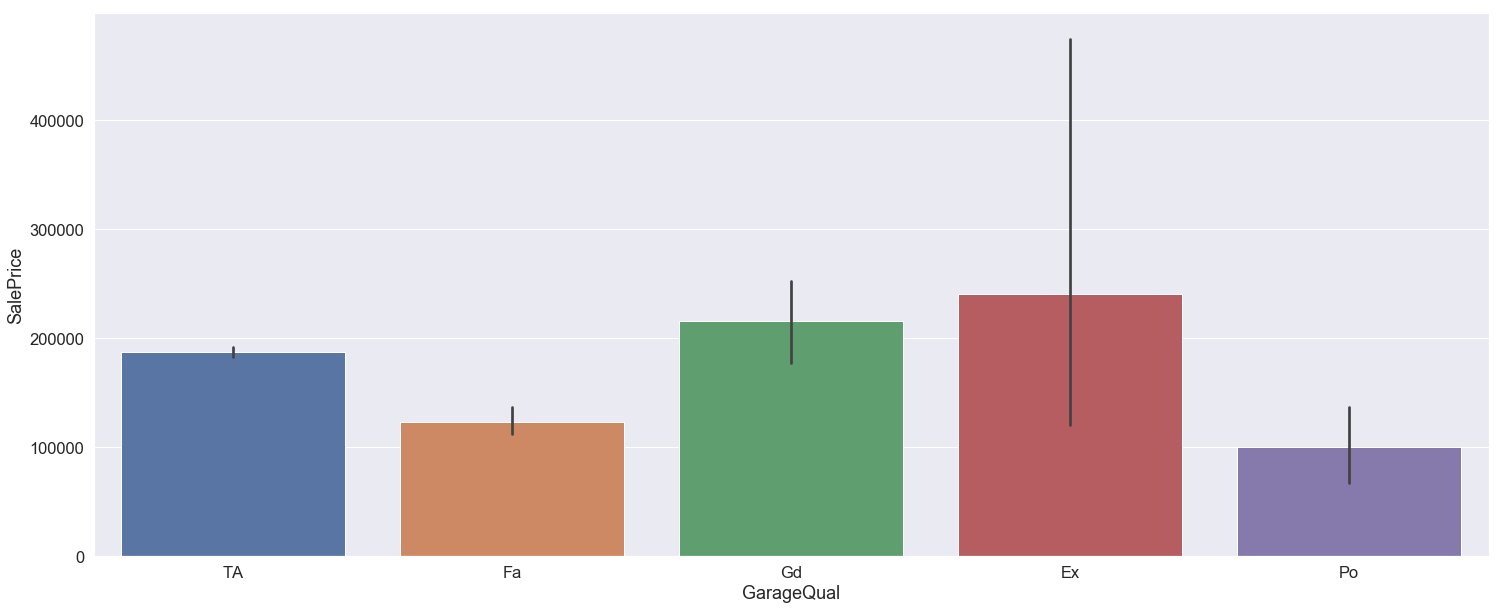

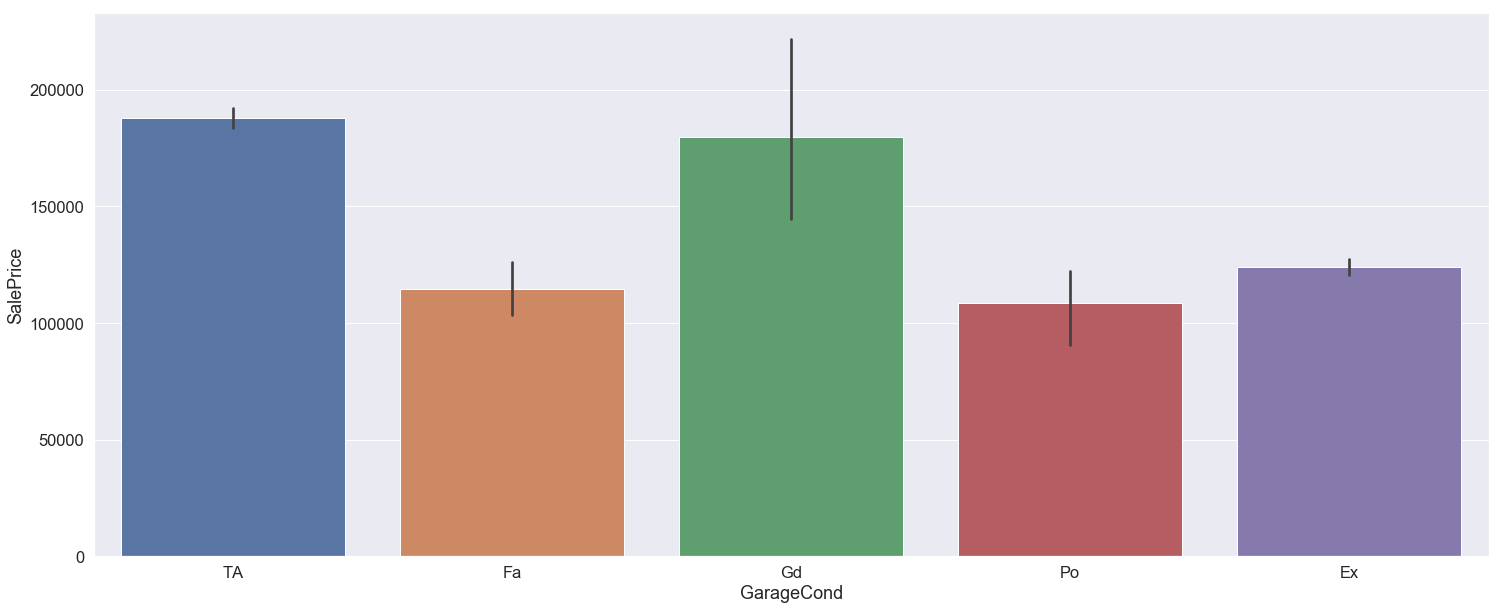

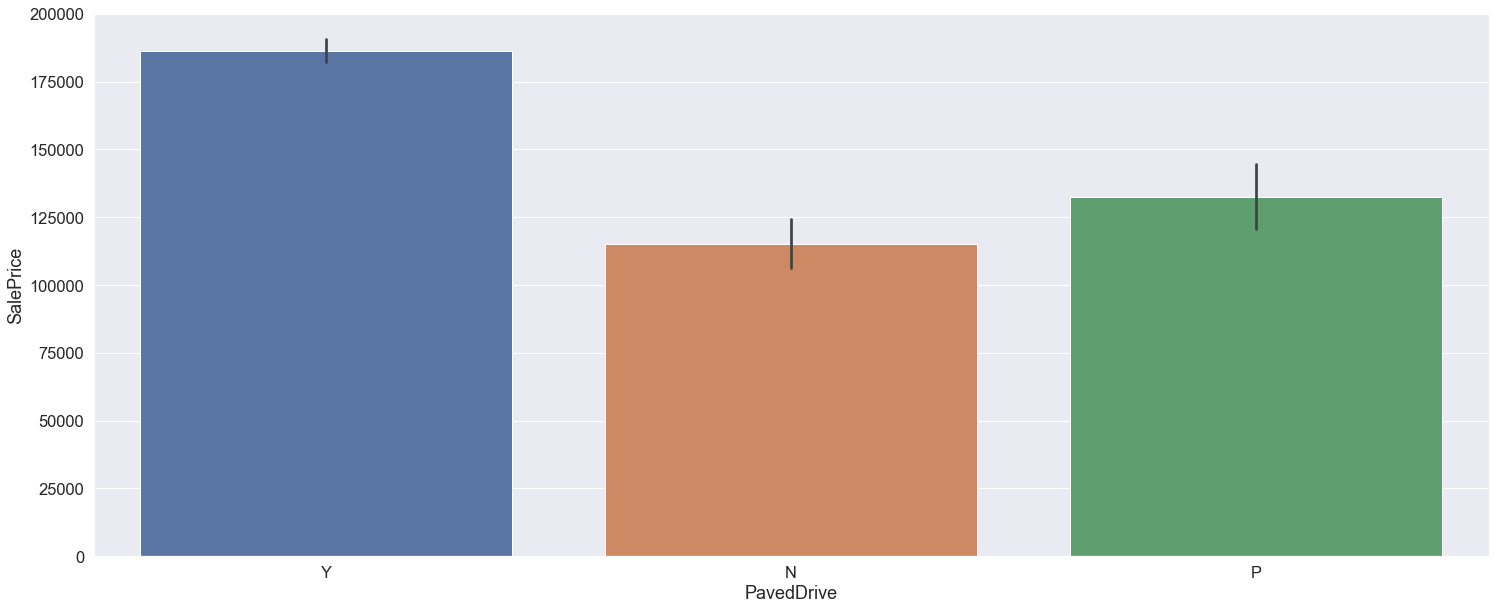

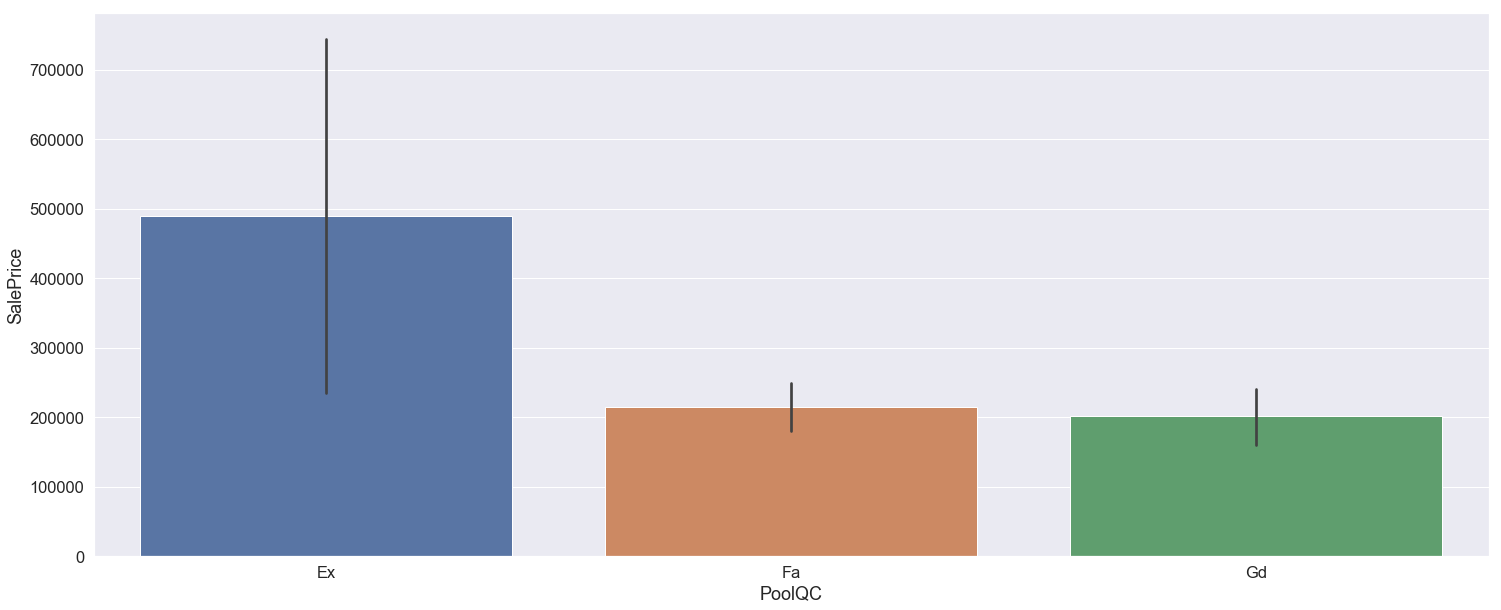

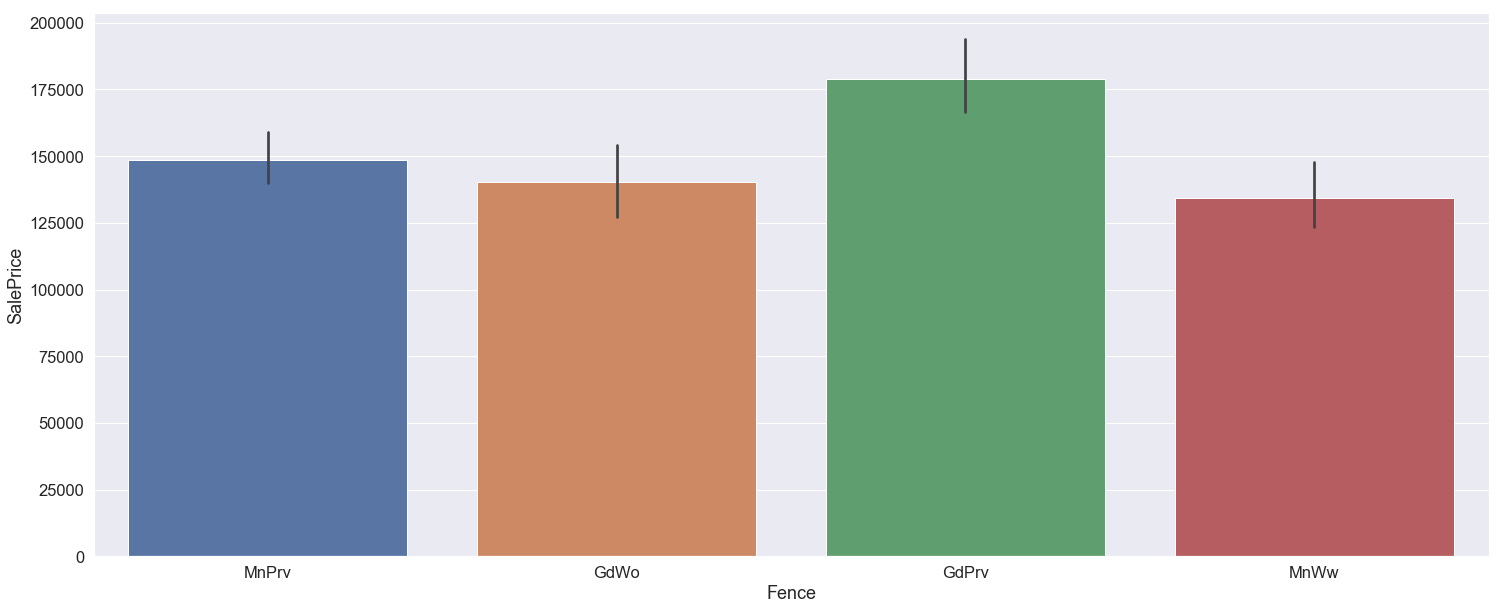

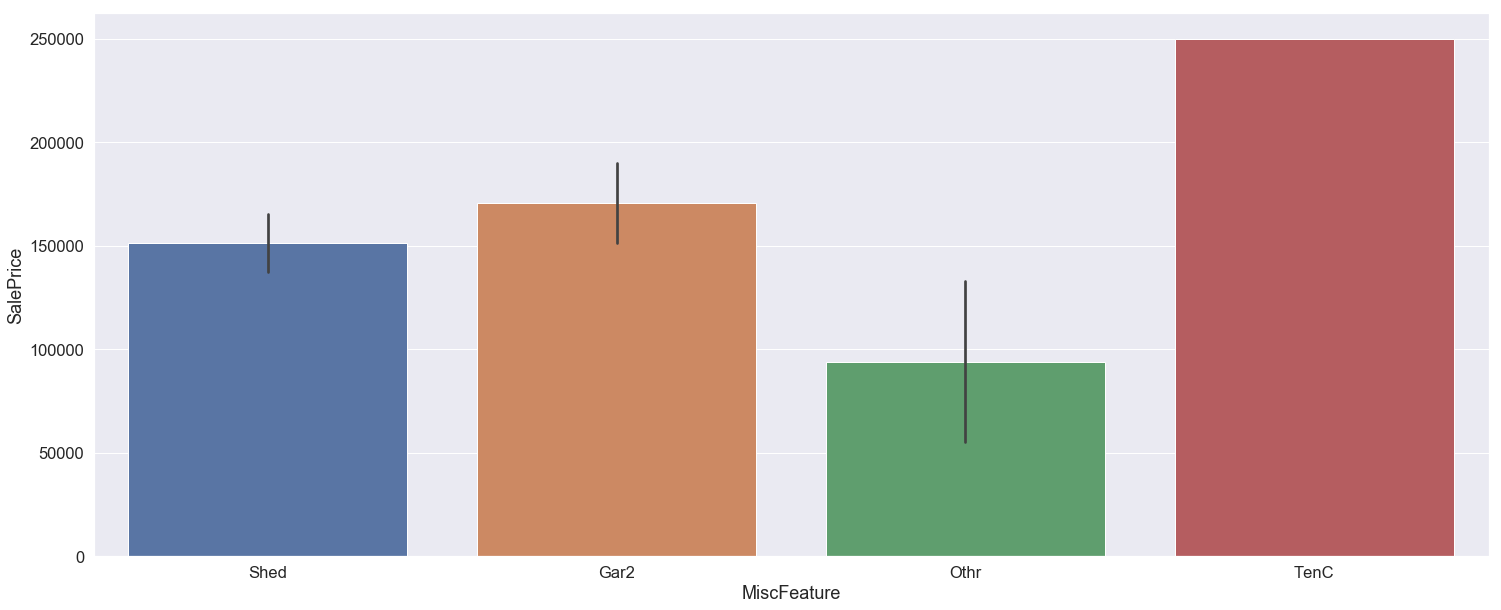

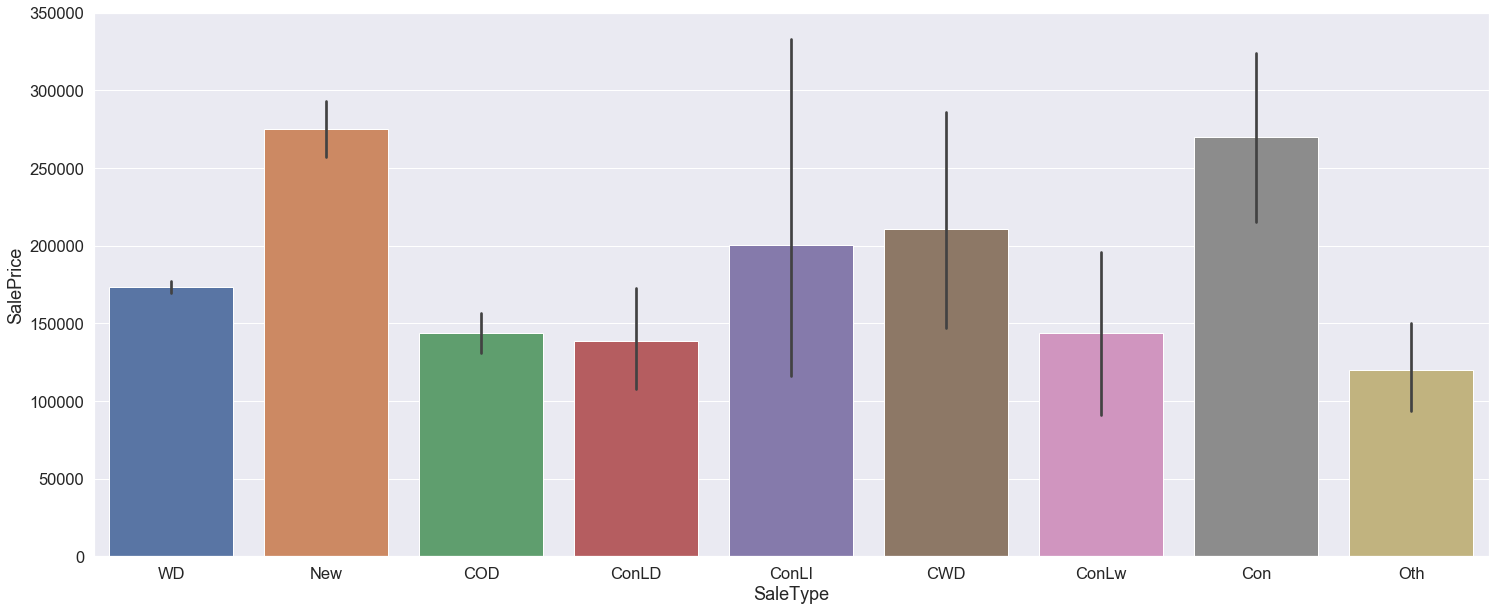

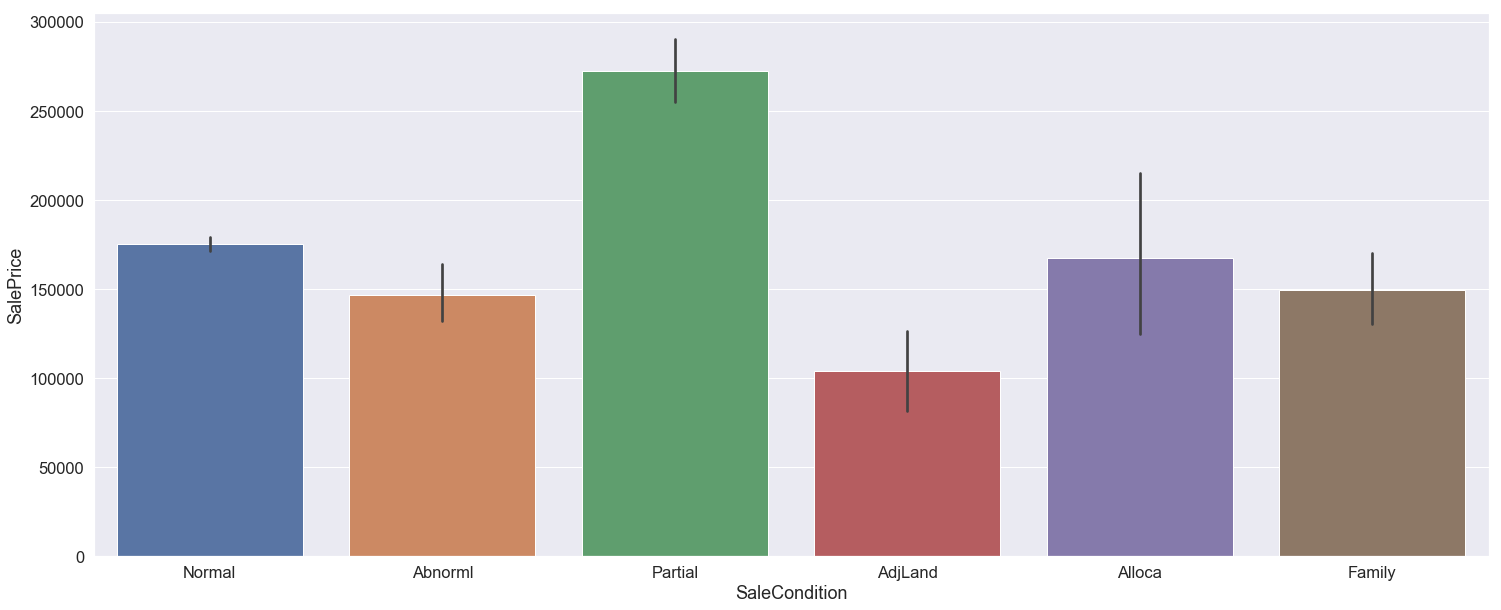

In [7]:
for i in list(train.columns):
    if train[i].dtype == 'O':
        sns.barplot(x=train[i],y=train.SalePrice,estimator=np.mean)
        plt.show()

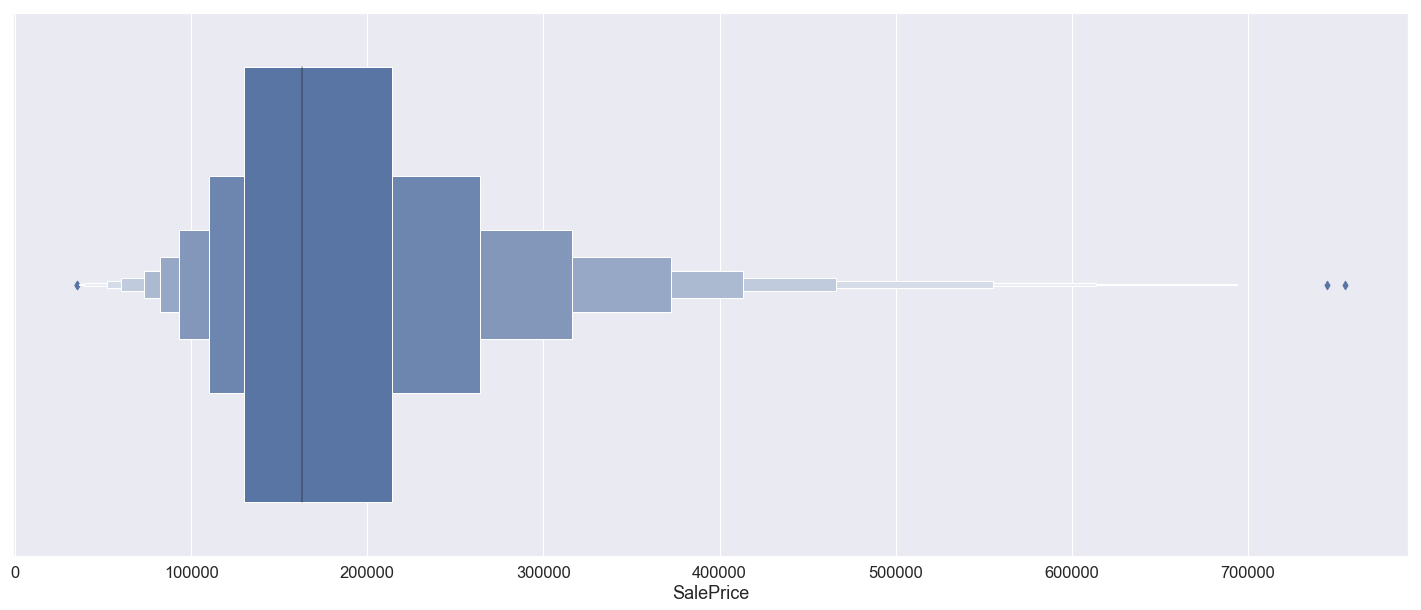

In [8]:
sns.boxenplot(train.SalePrice)

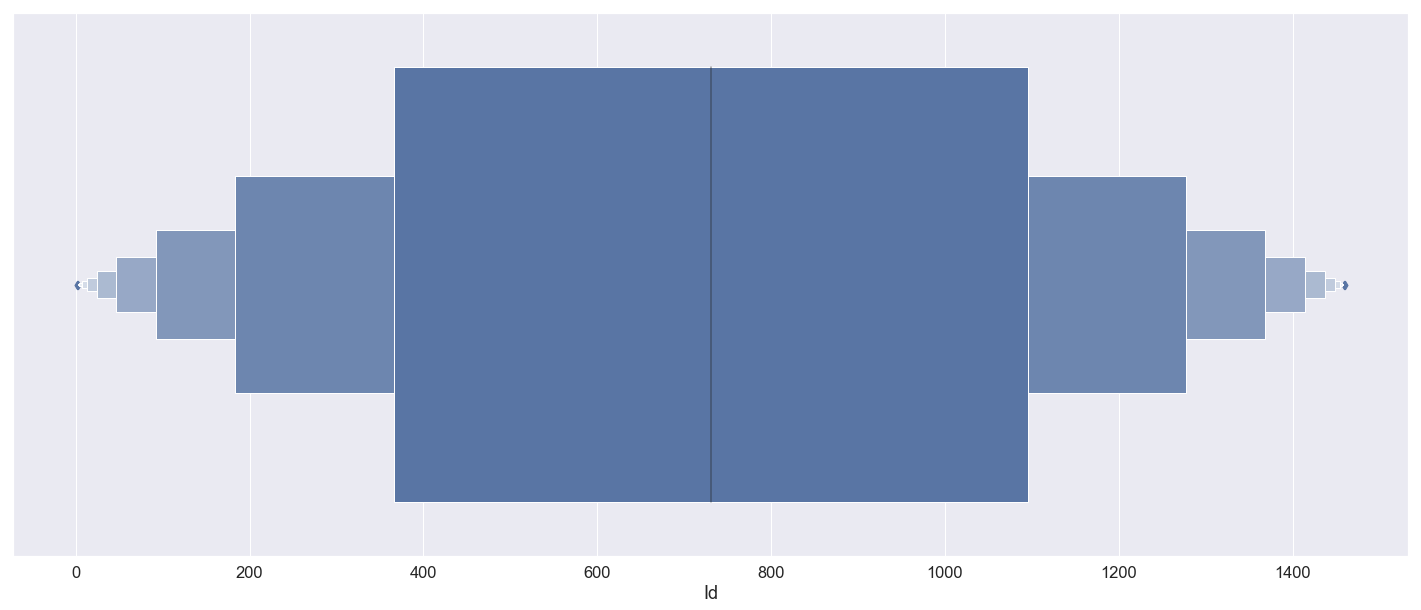

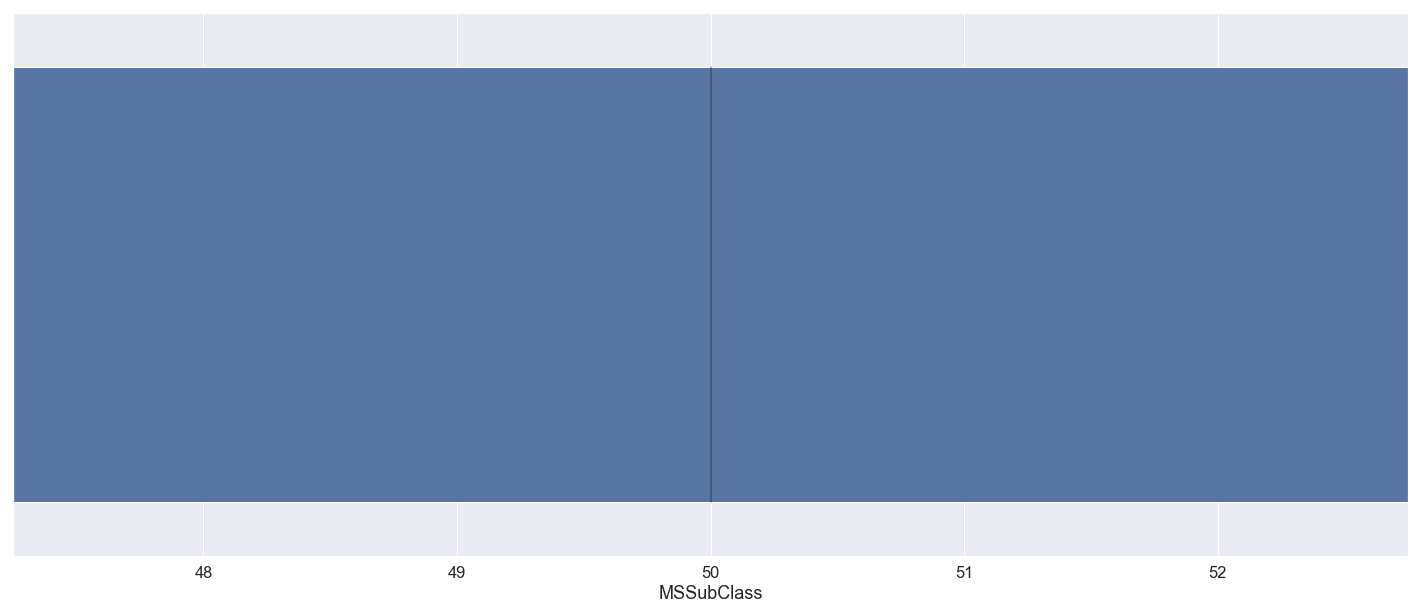

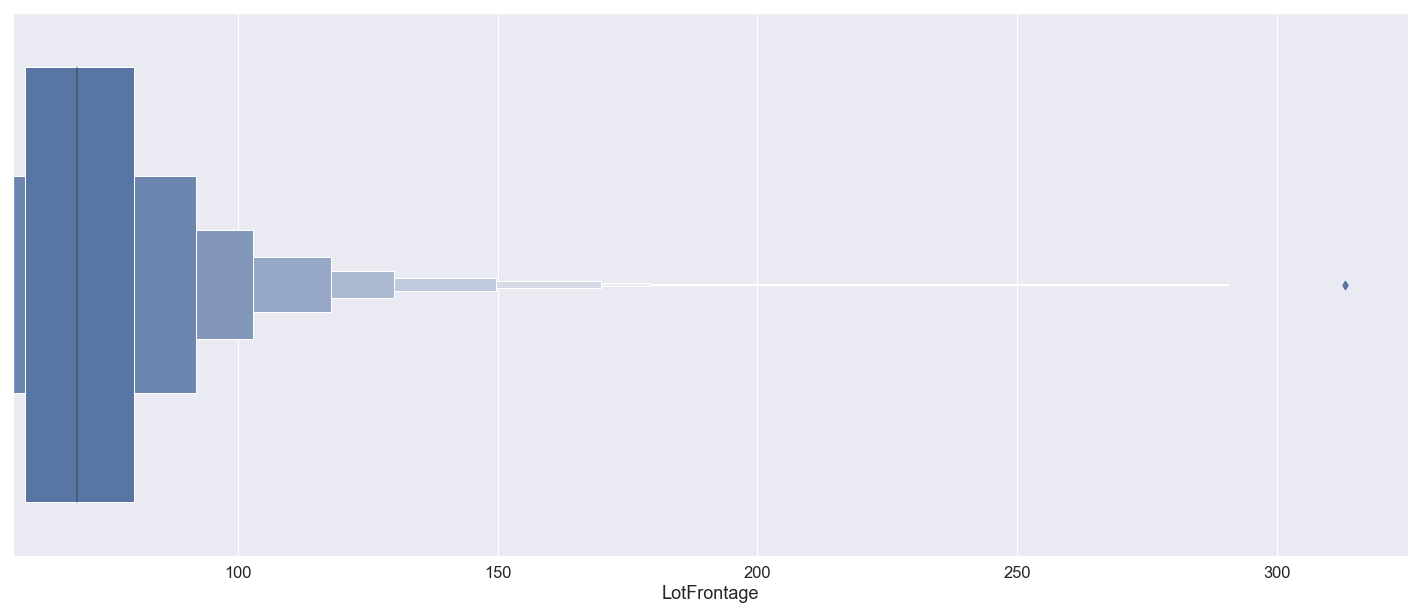

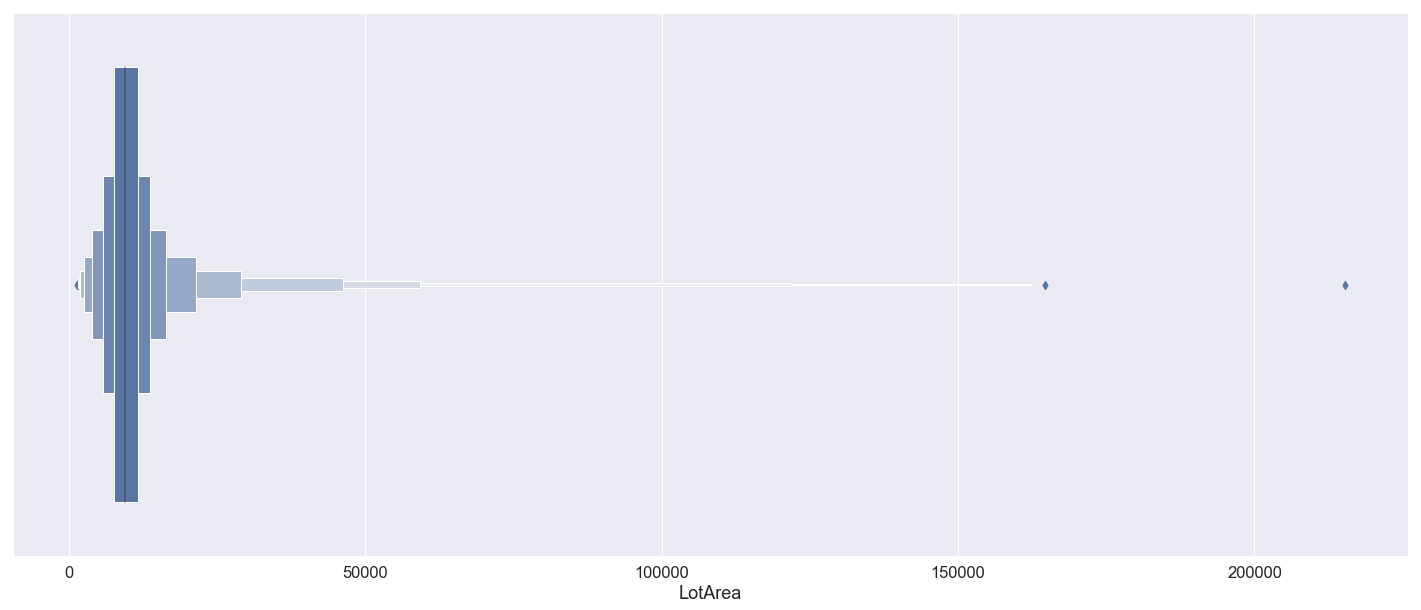

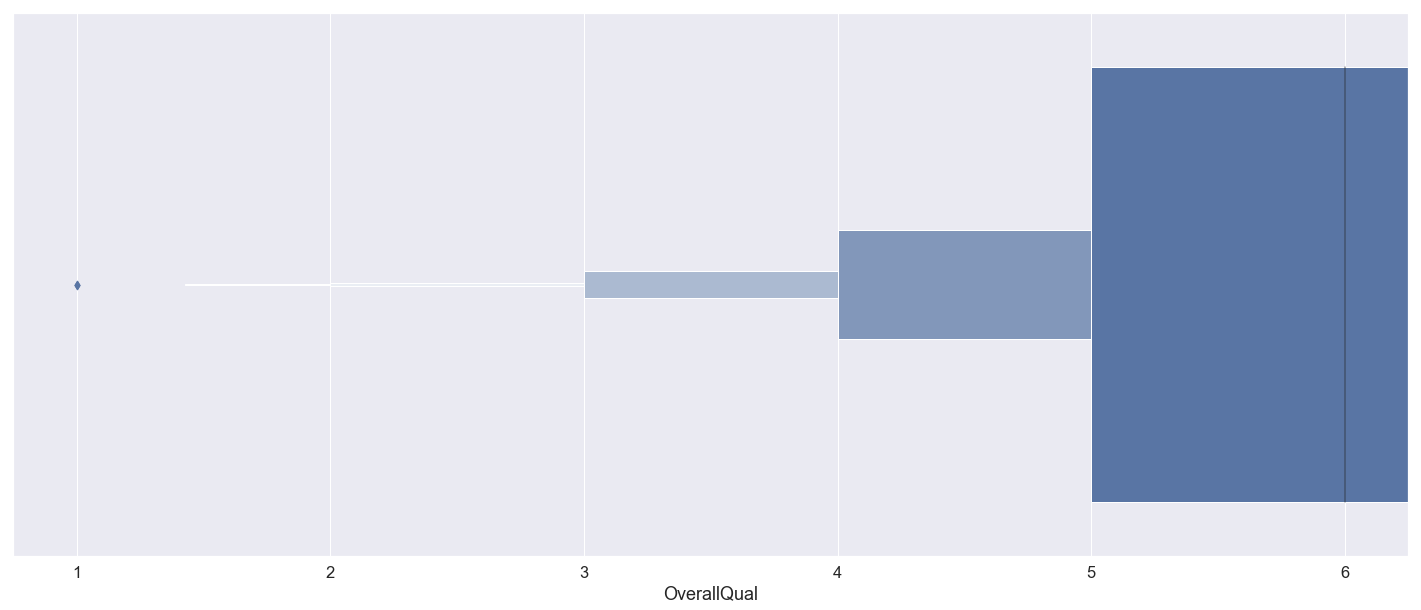

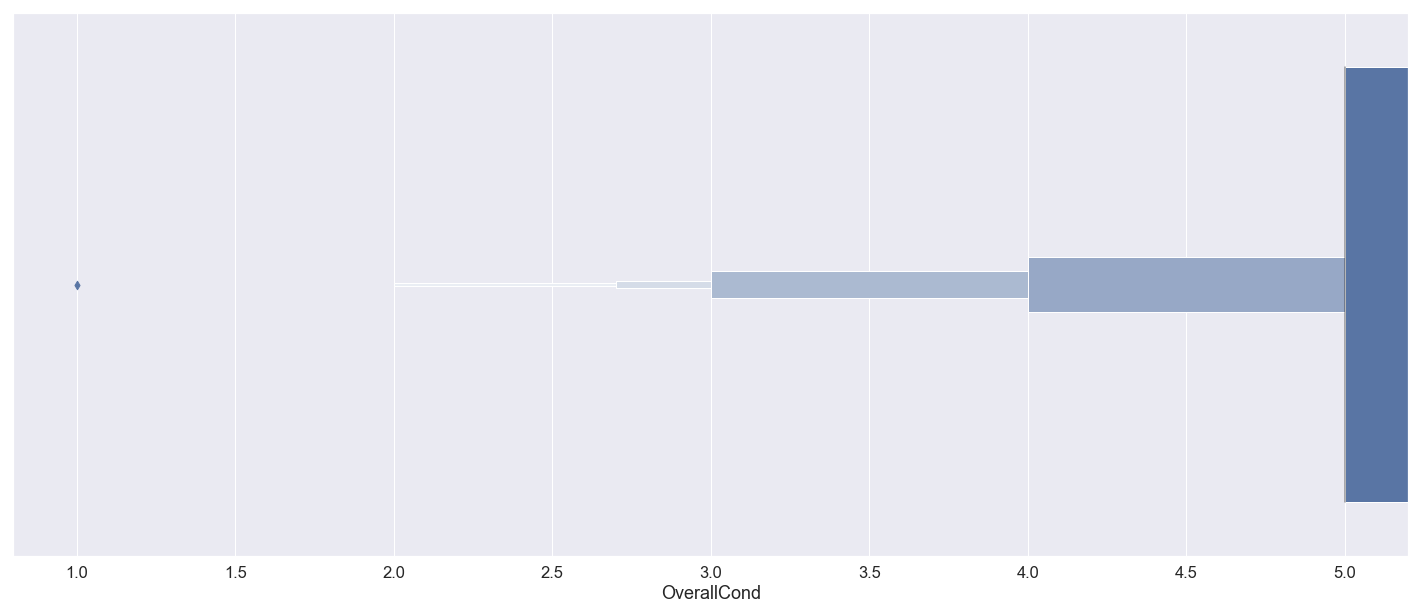

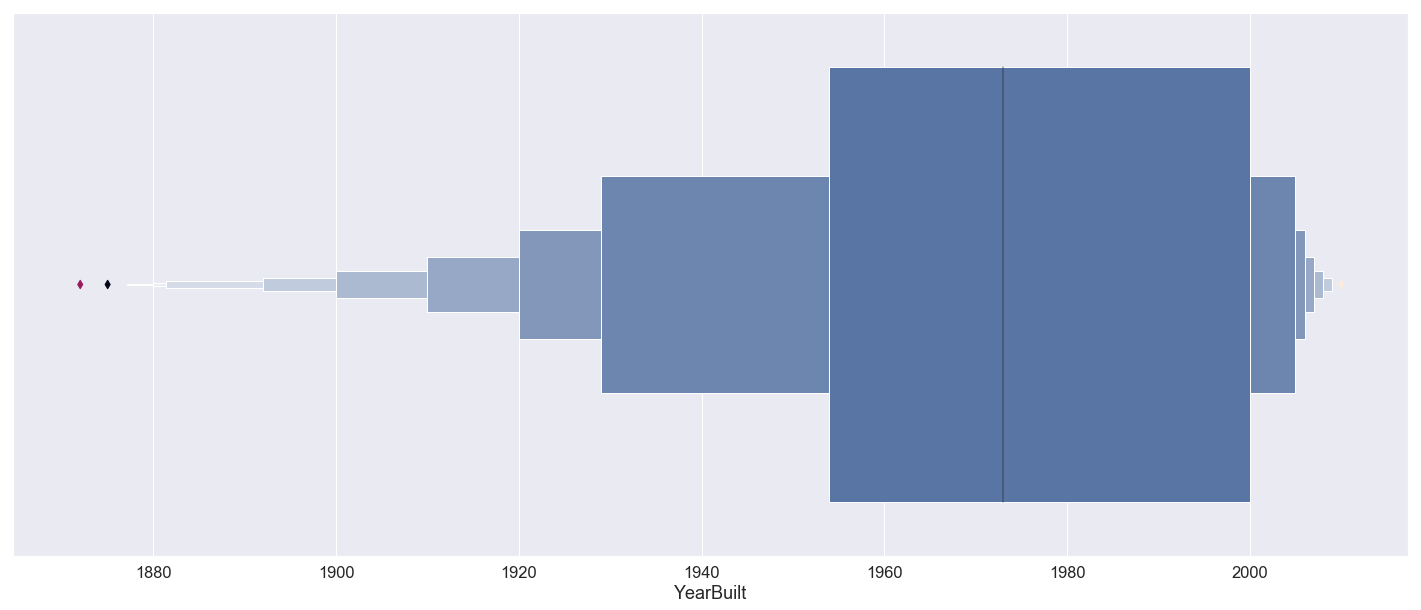

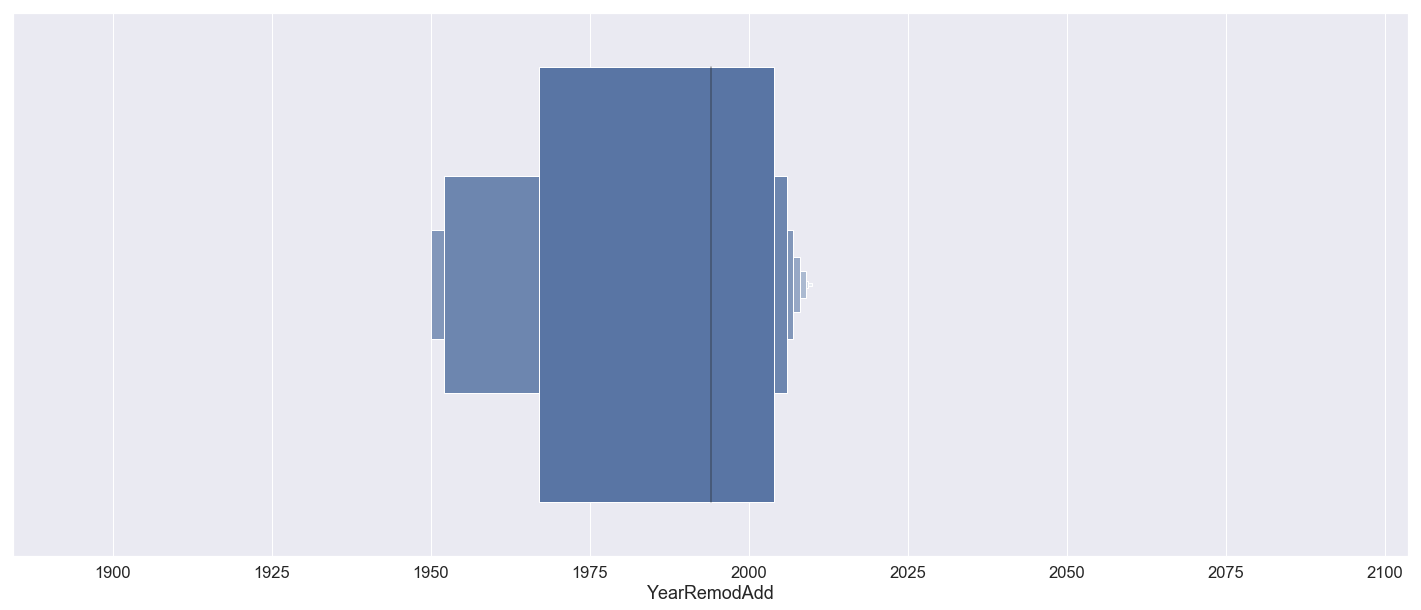

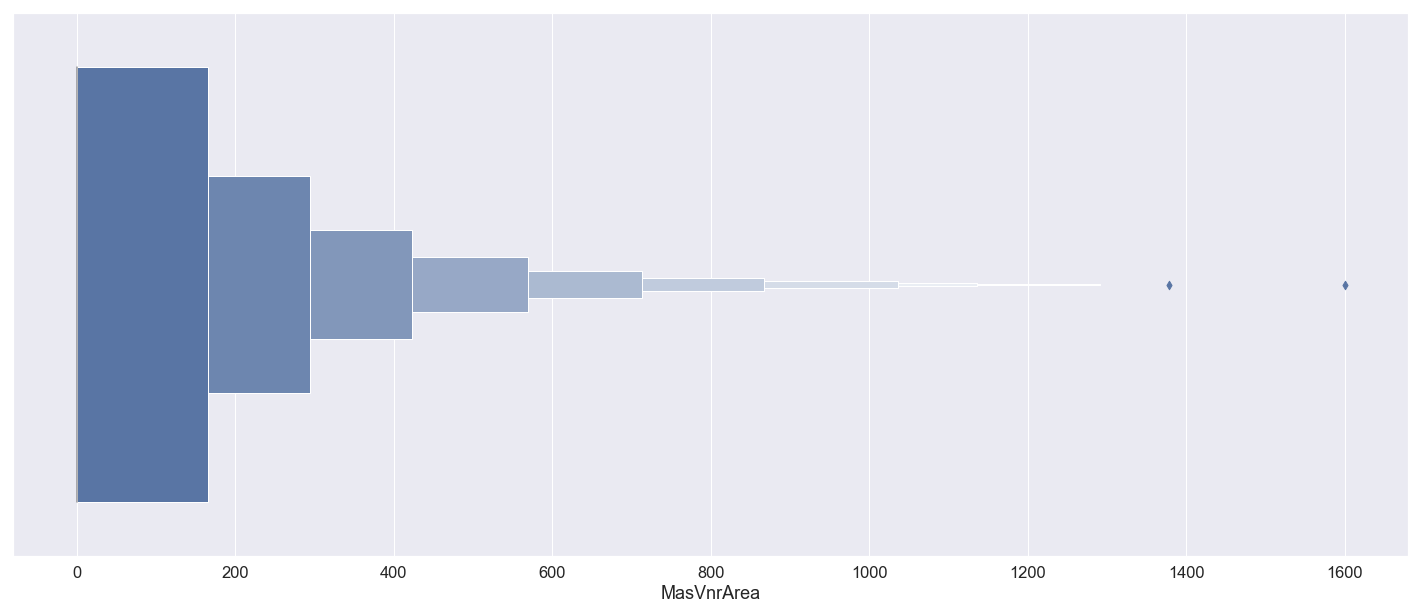

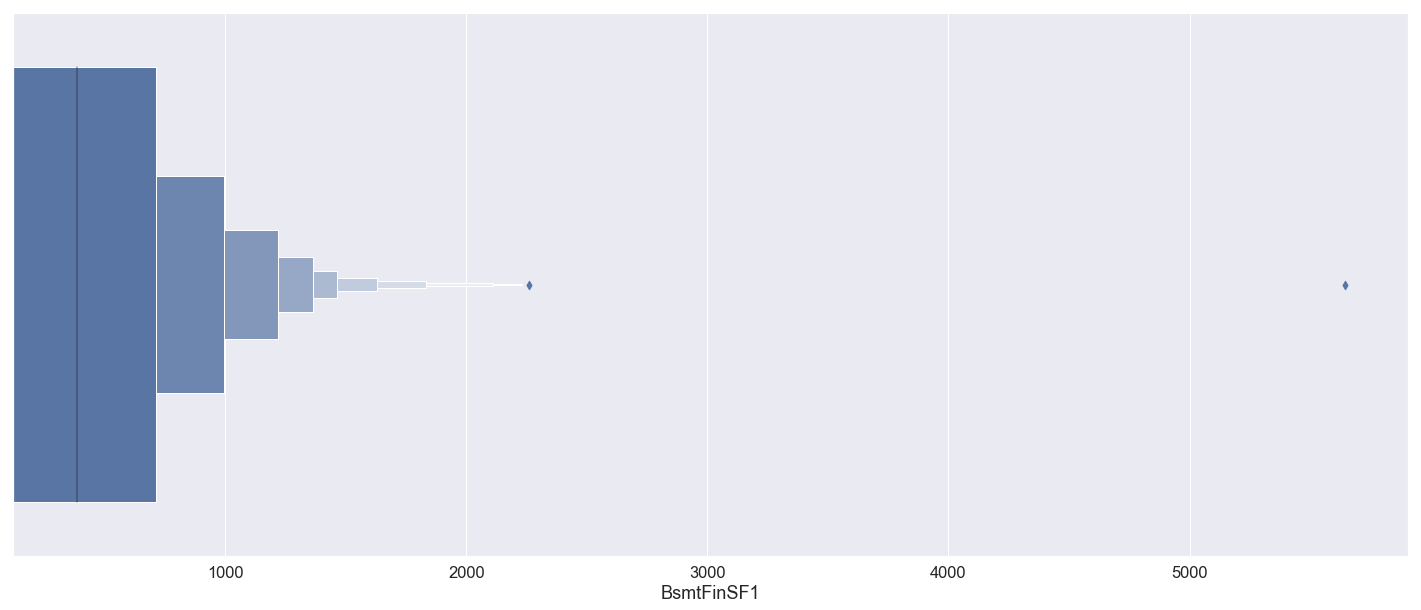

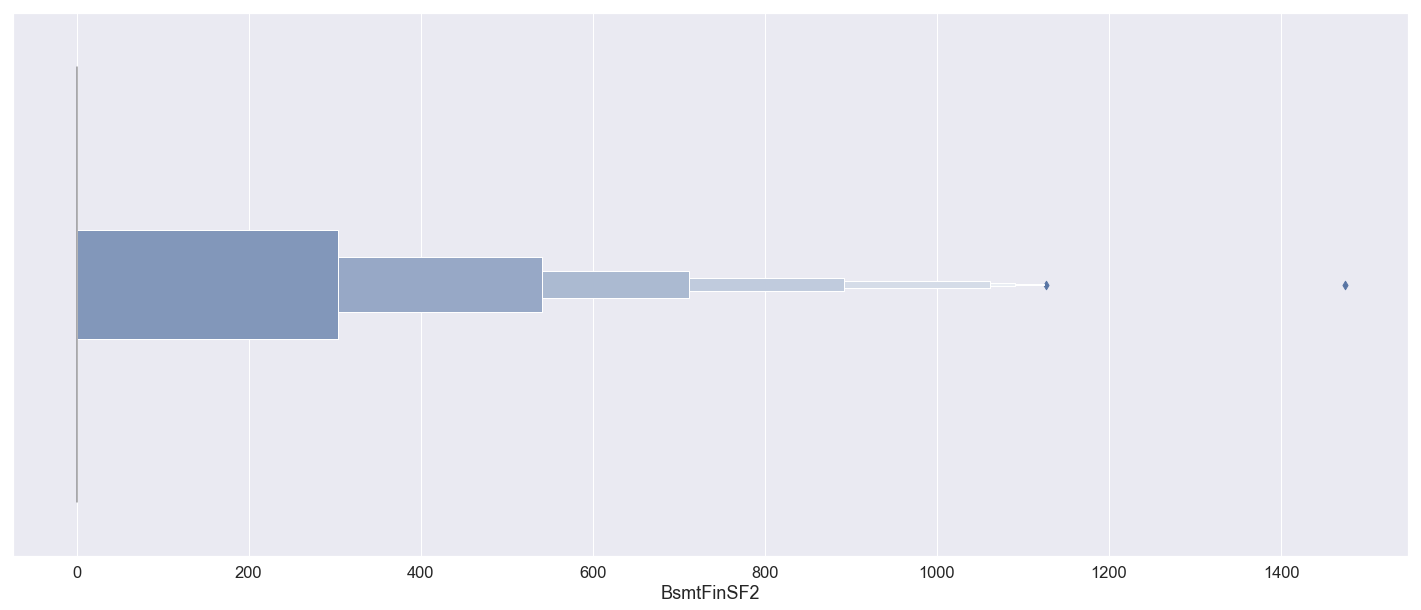

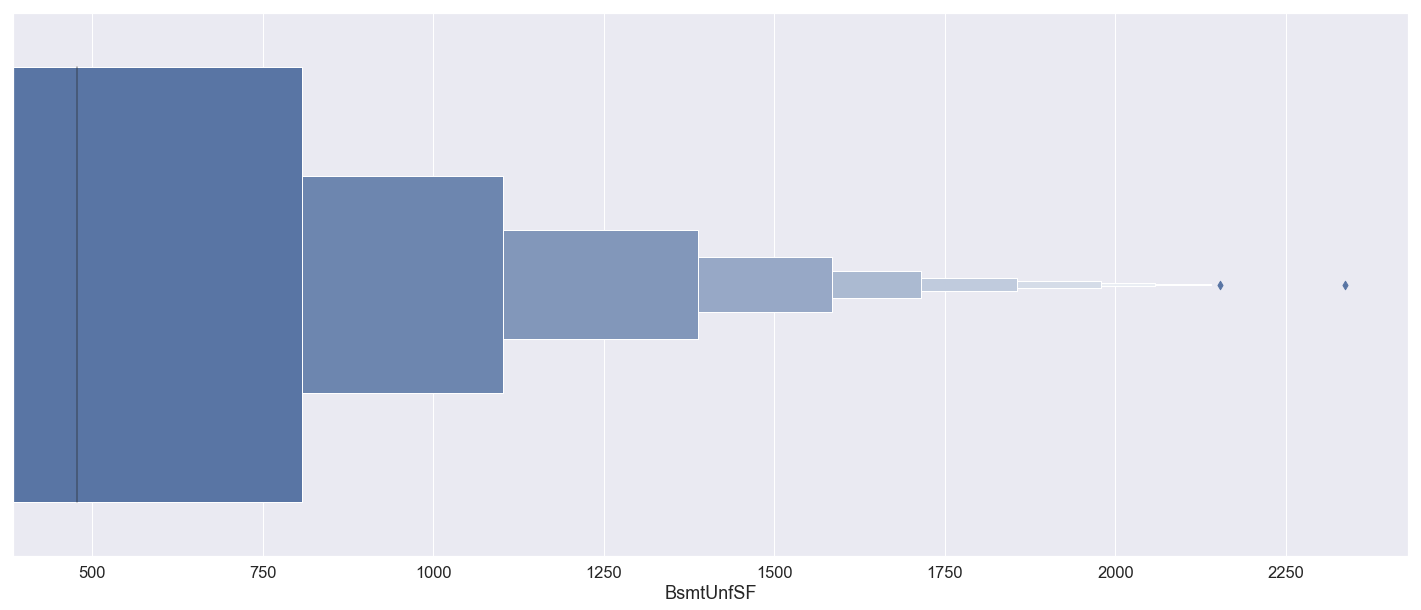

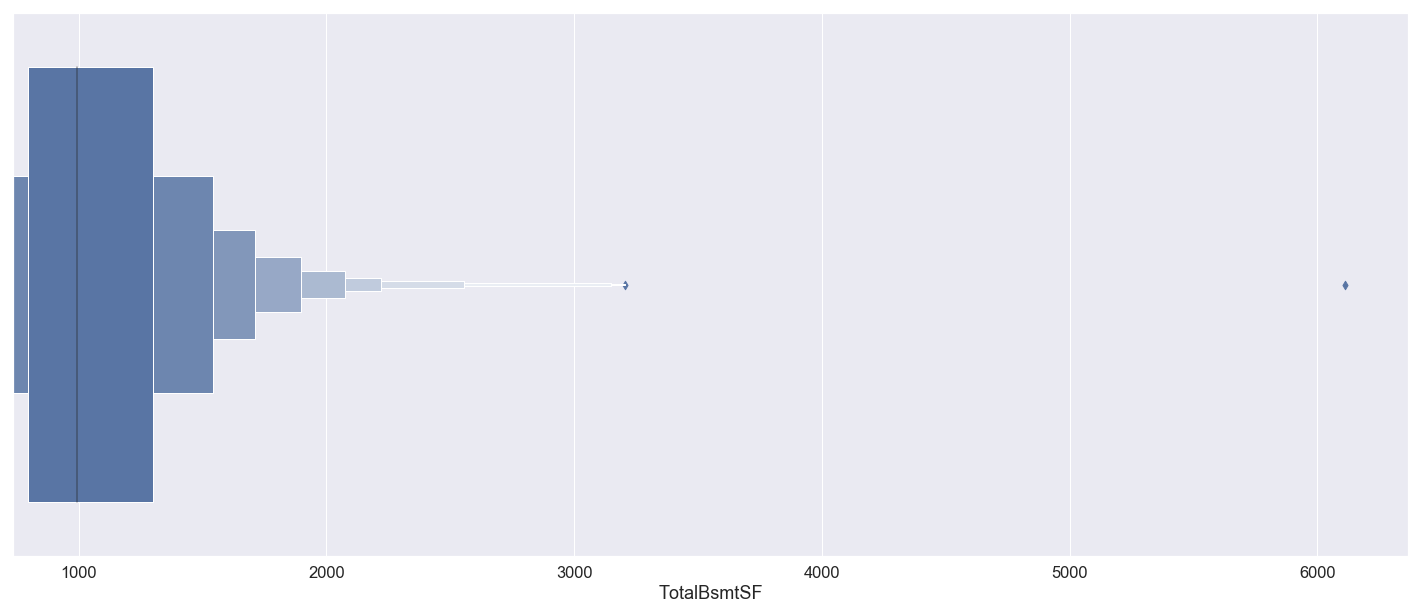

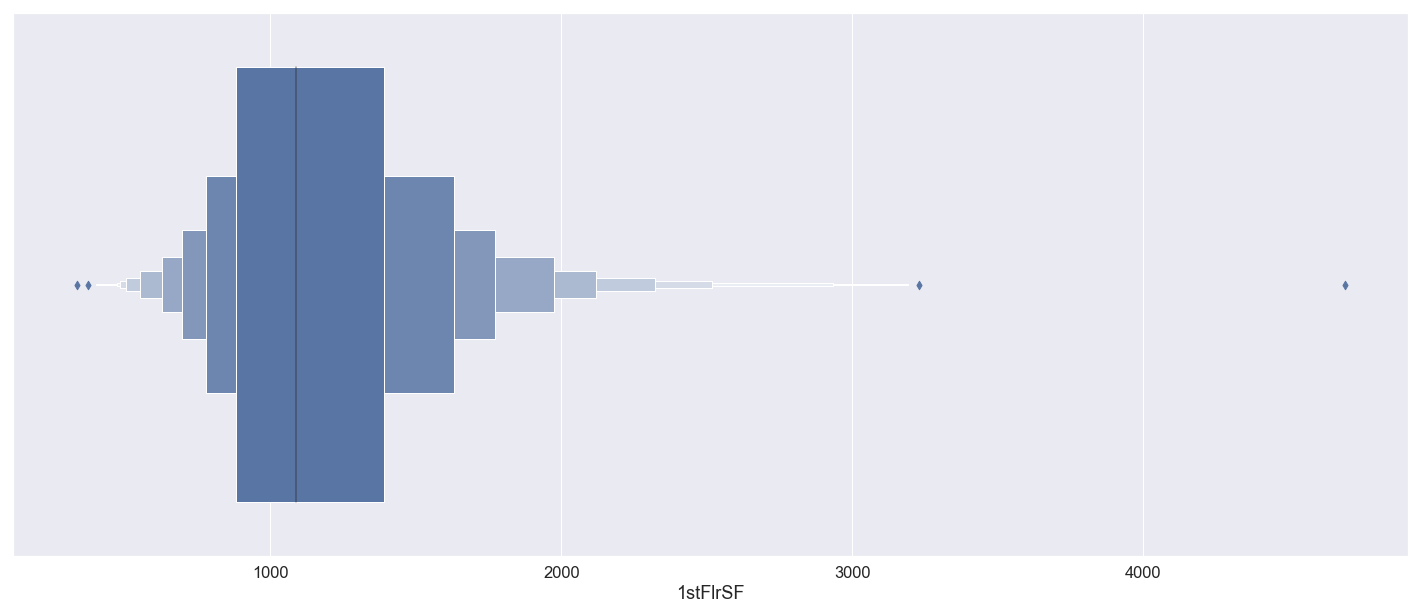

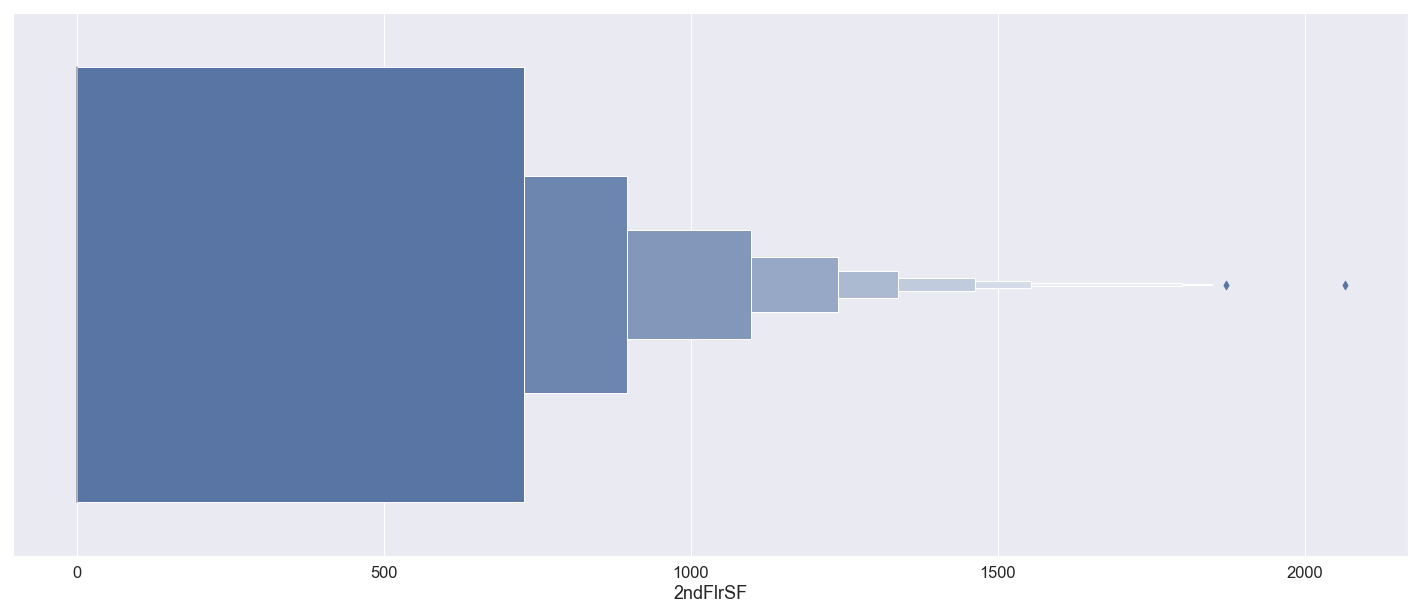

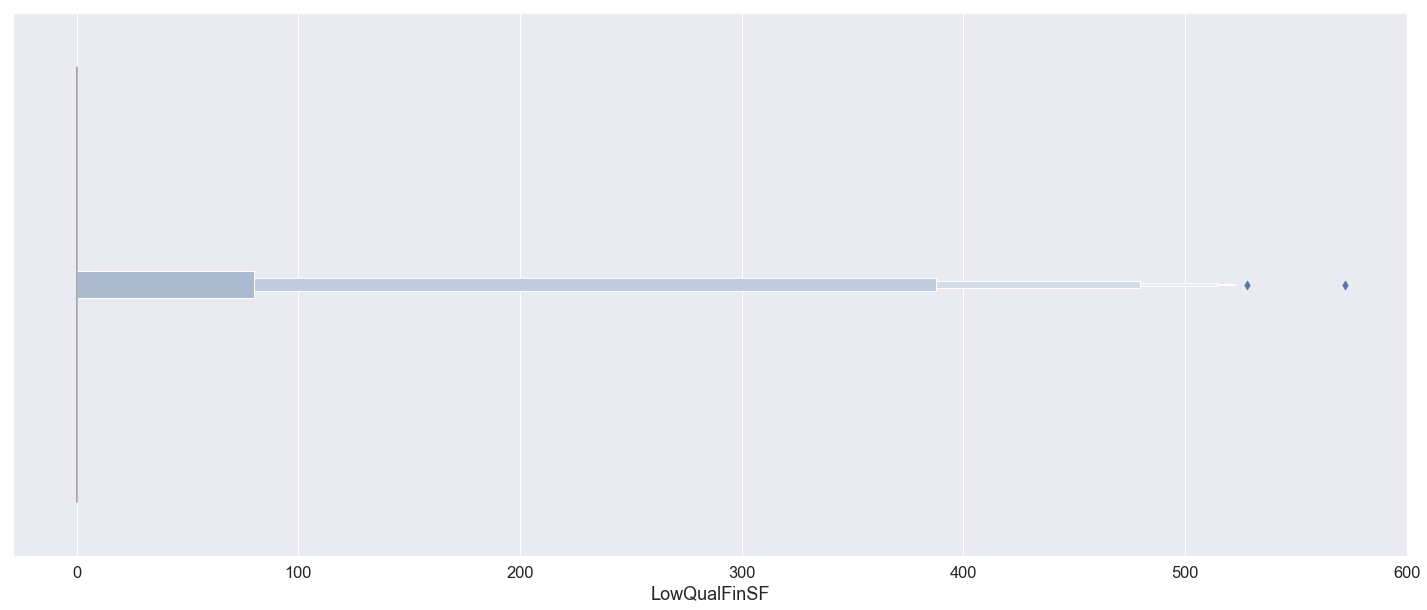

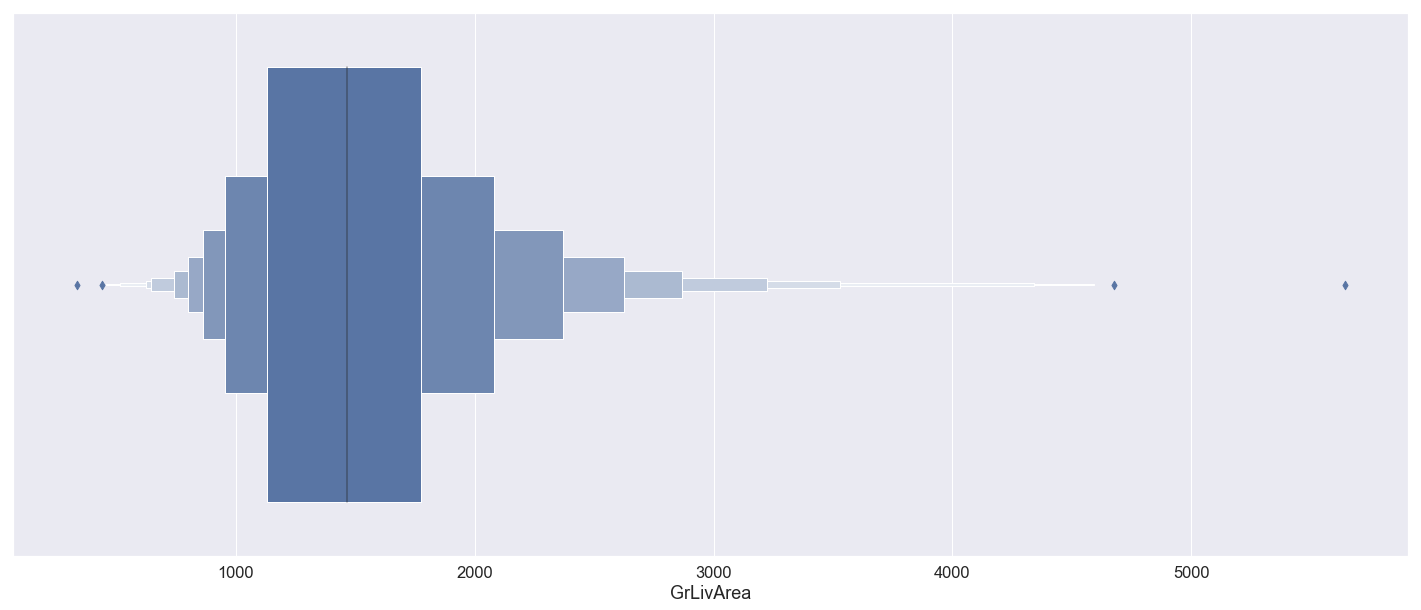

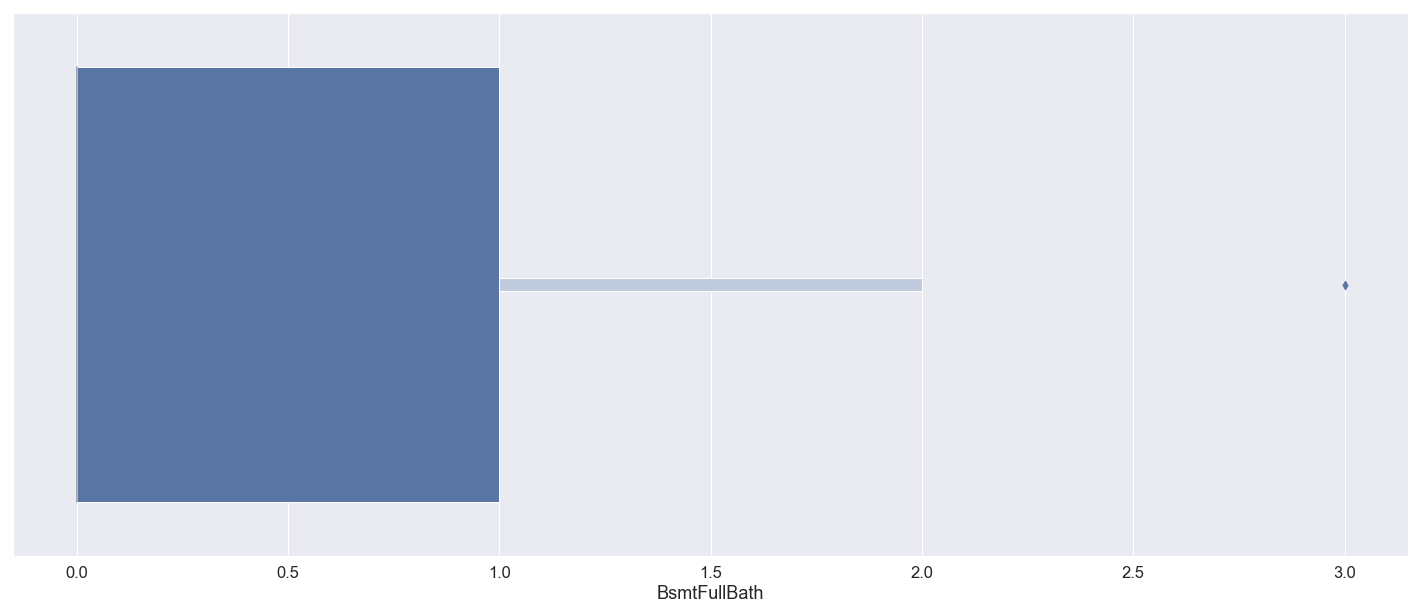

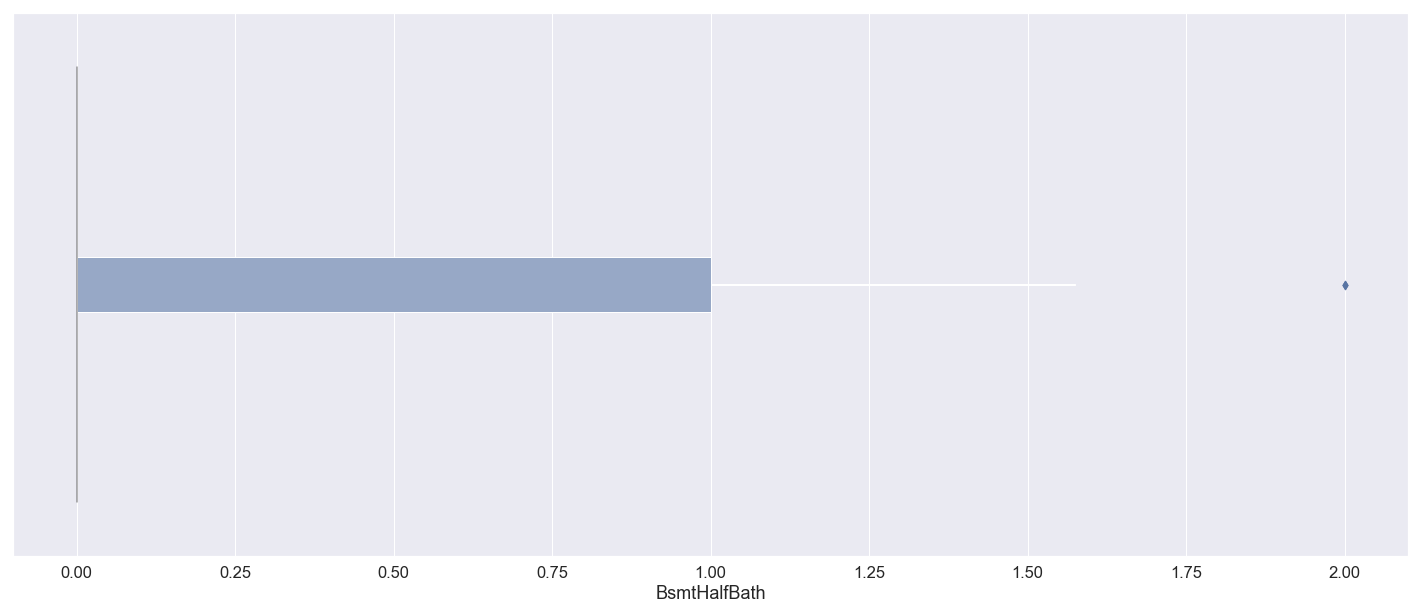

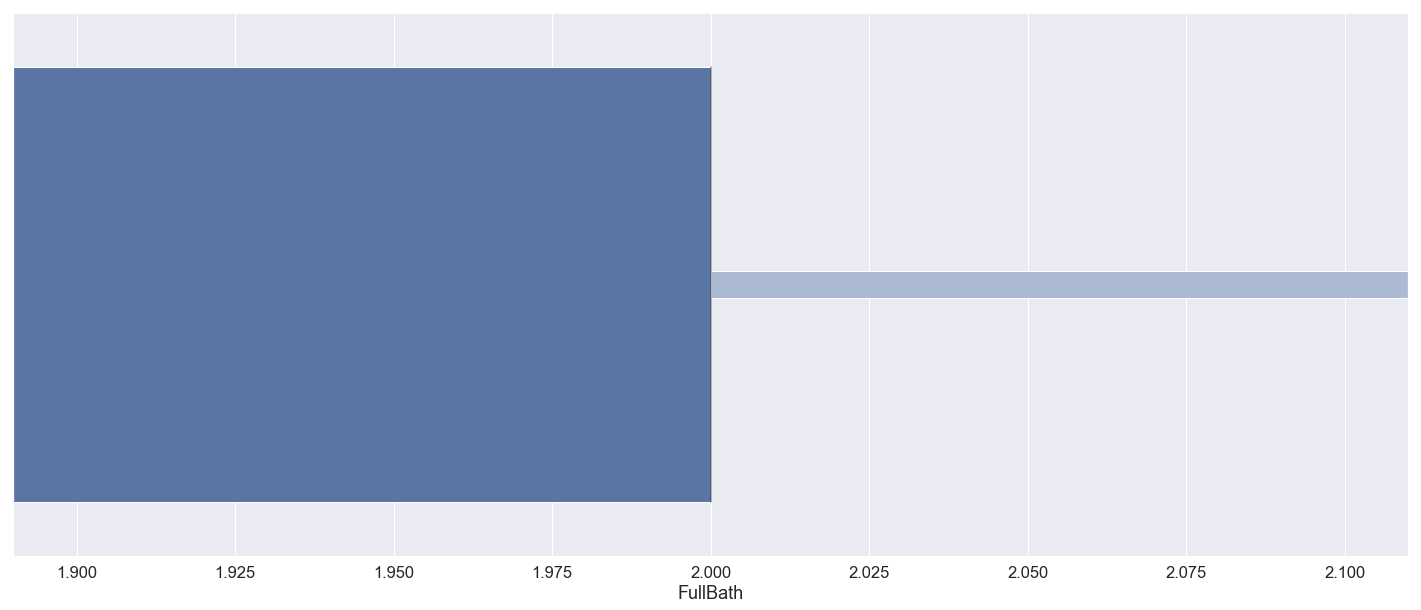

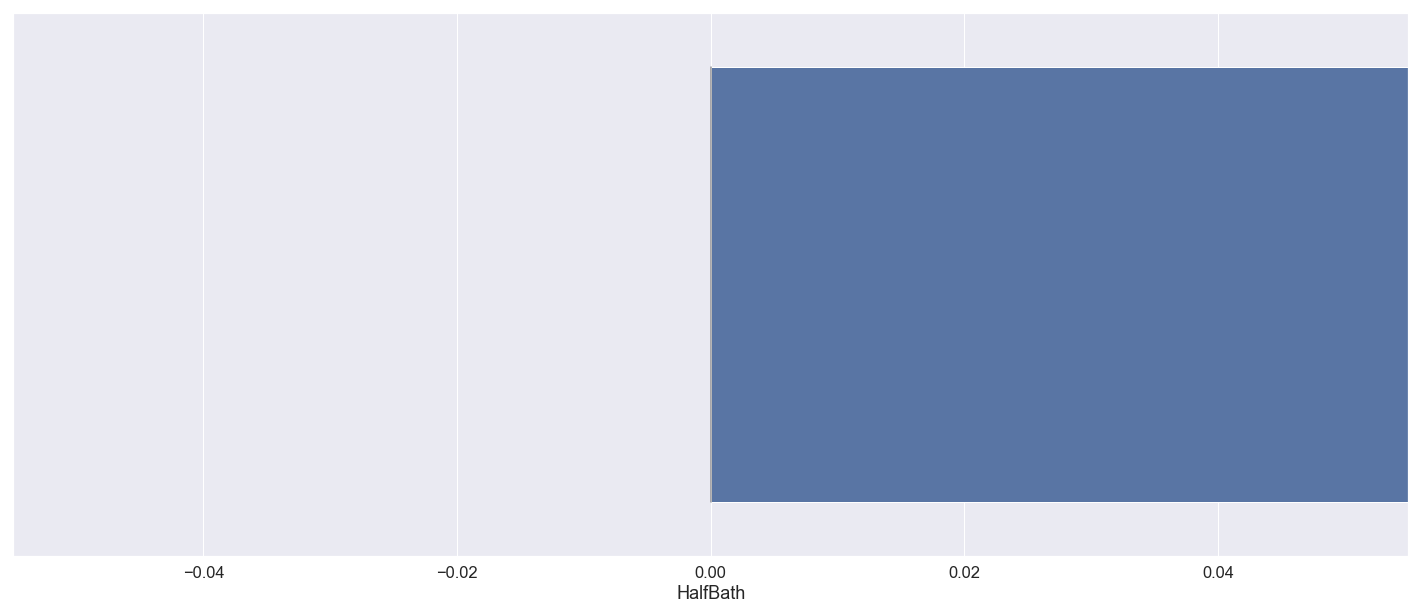

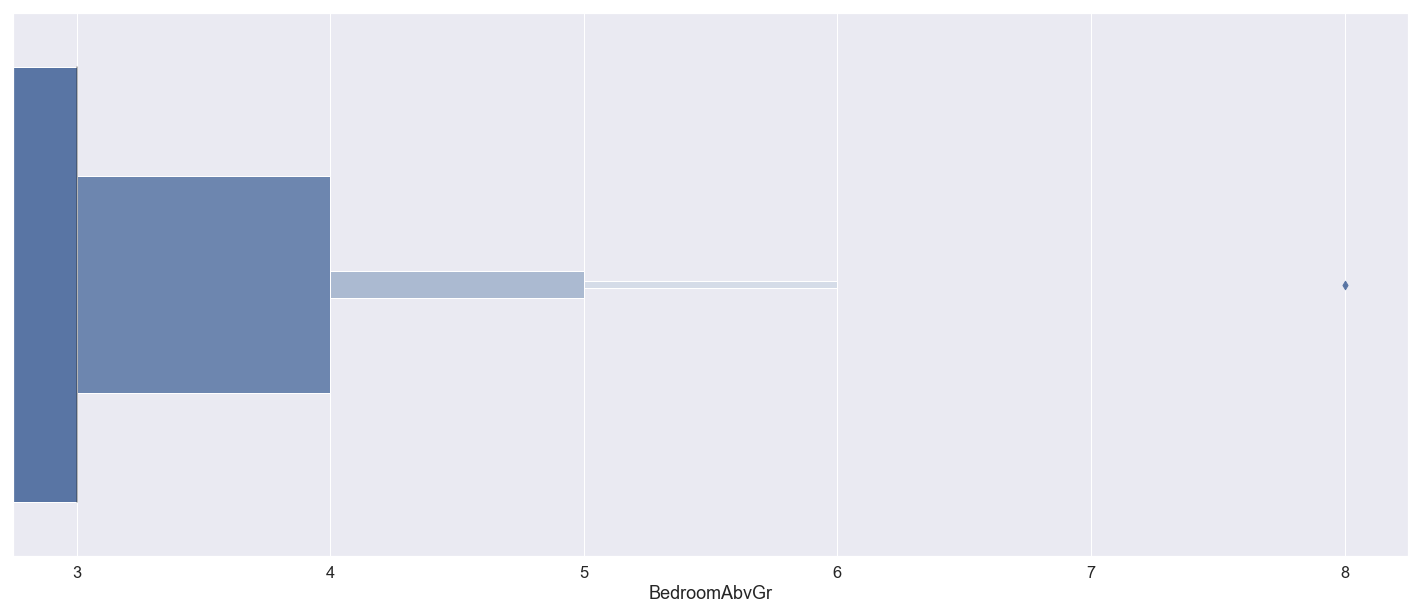

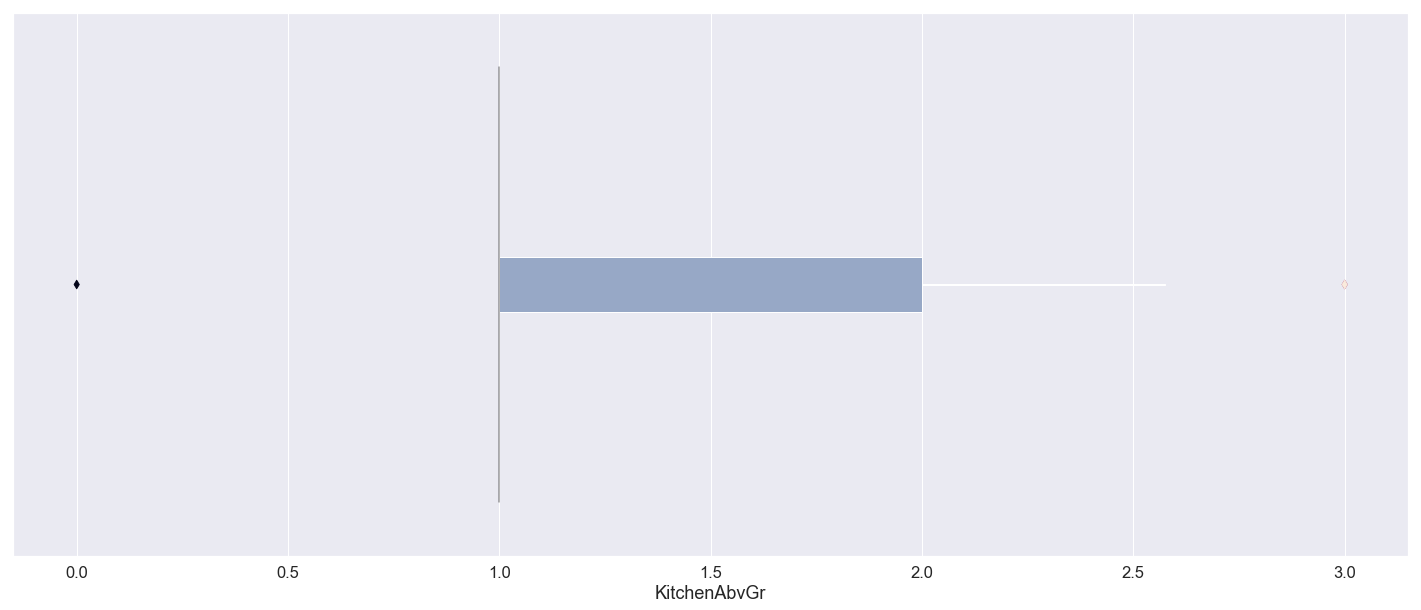

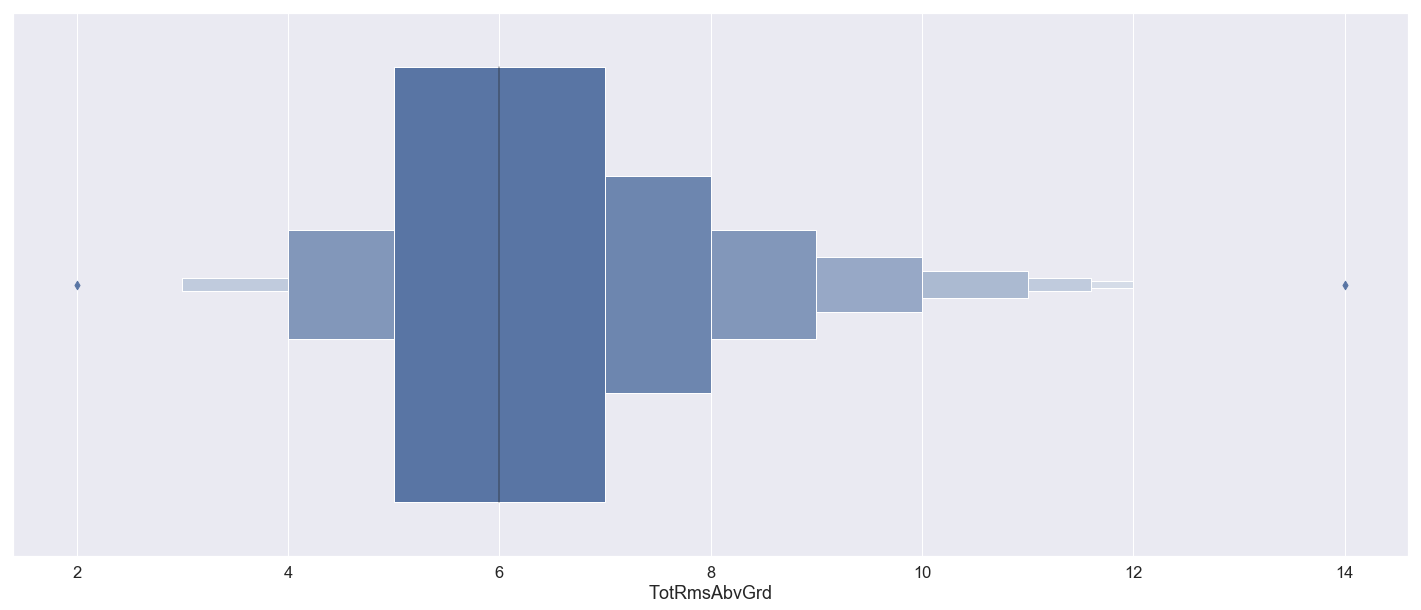

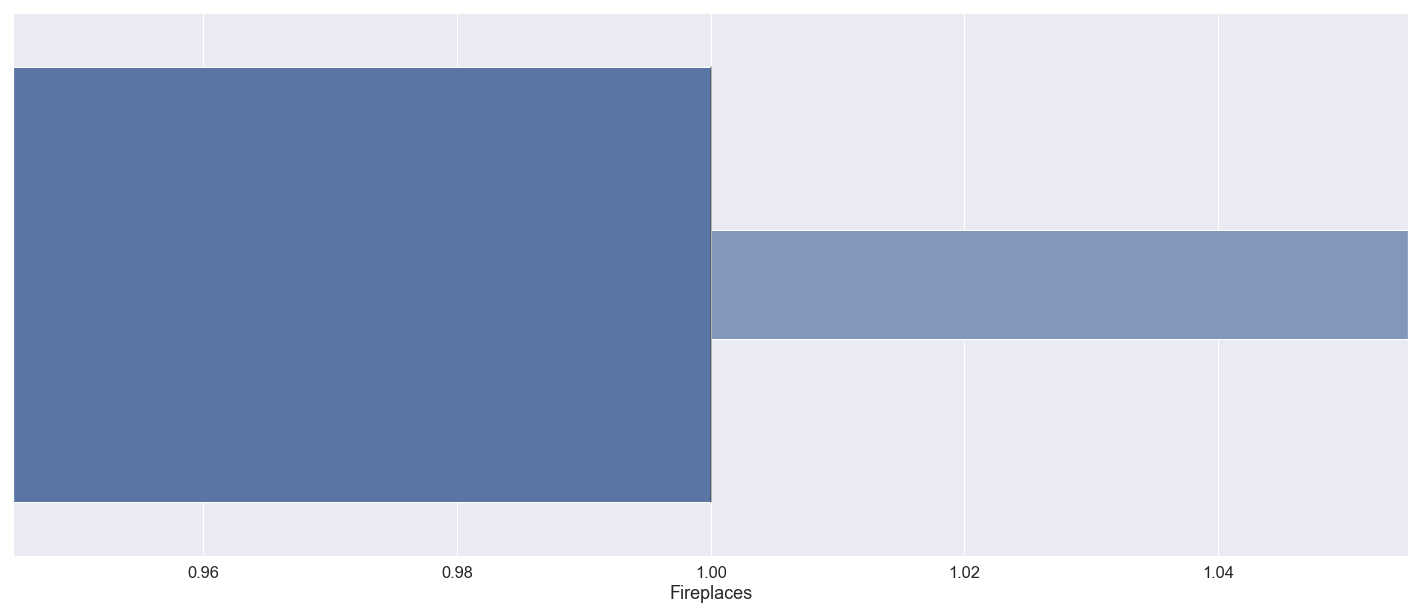

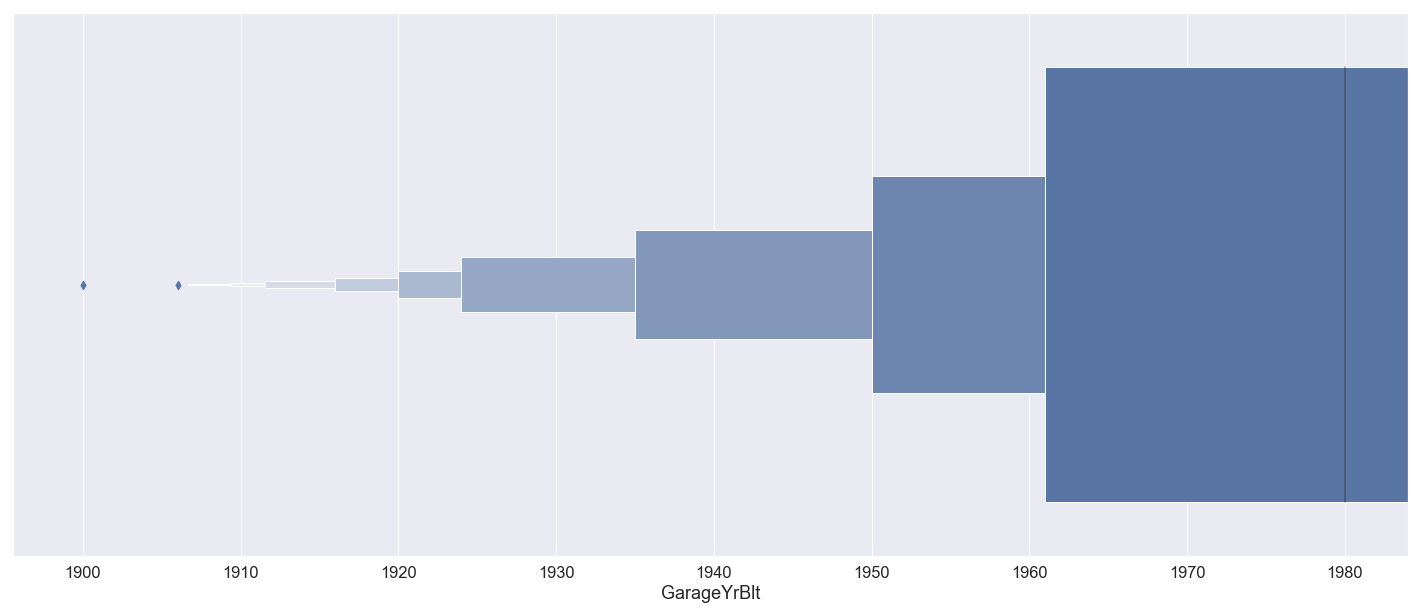

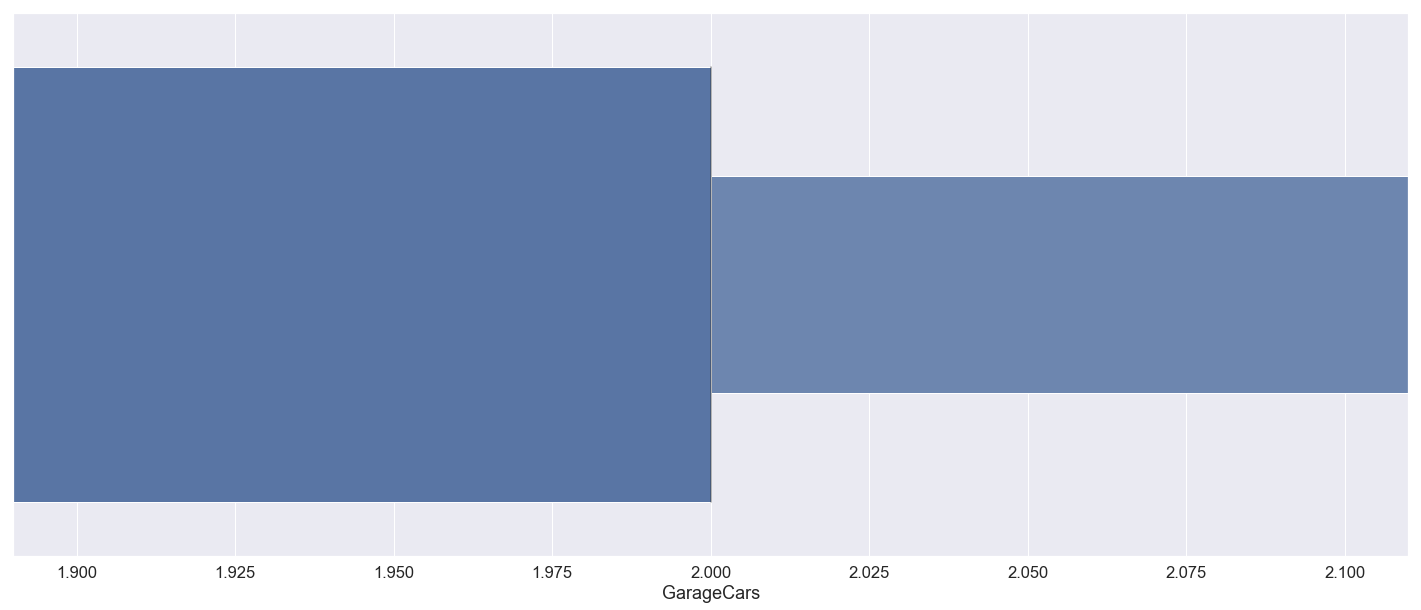

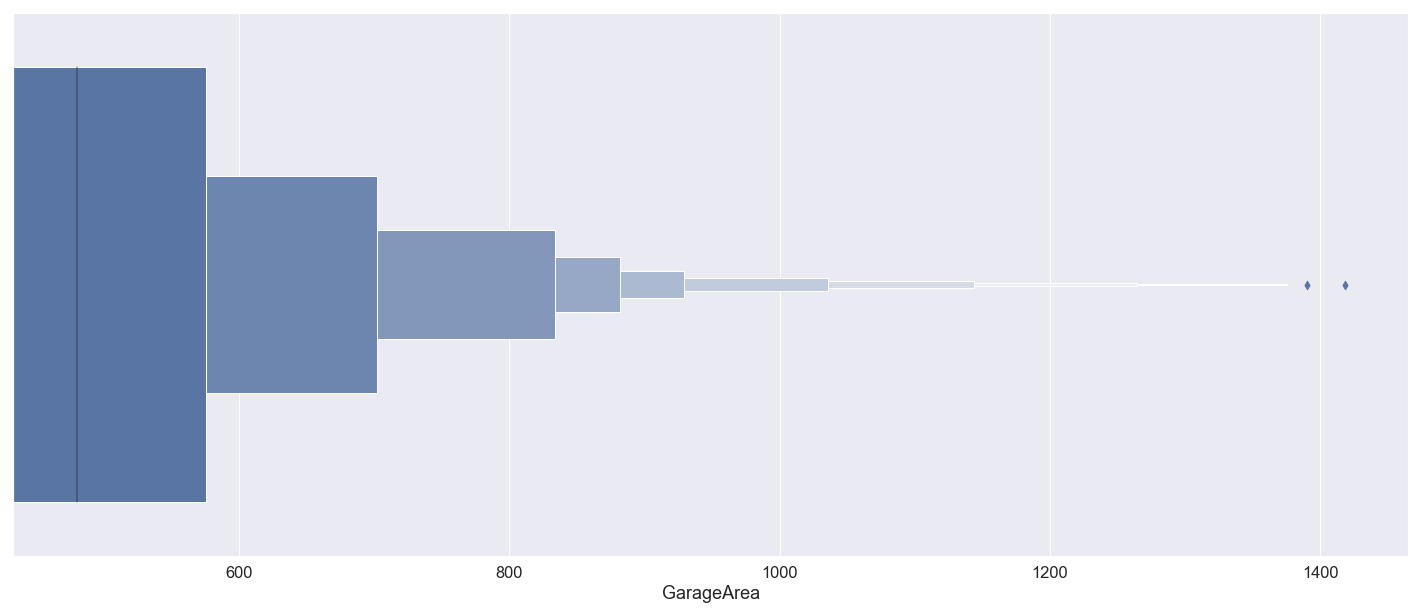

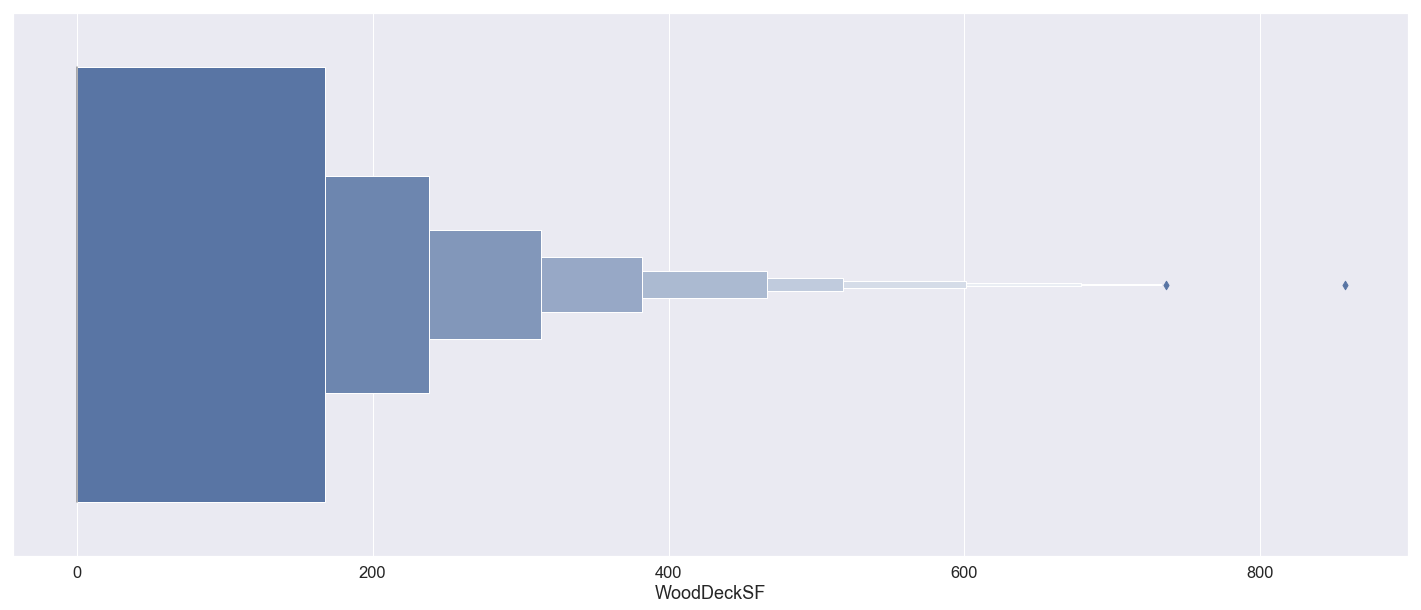

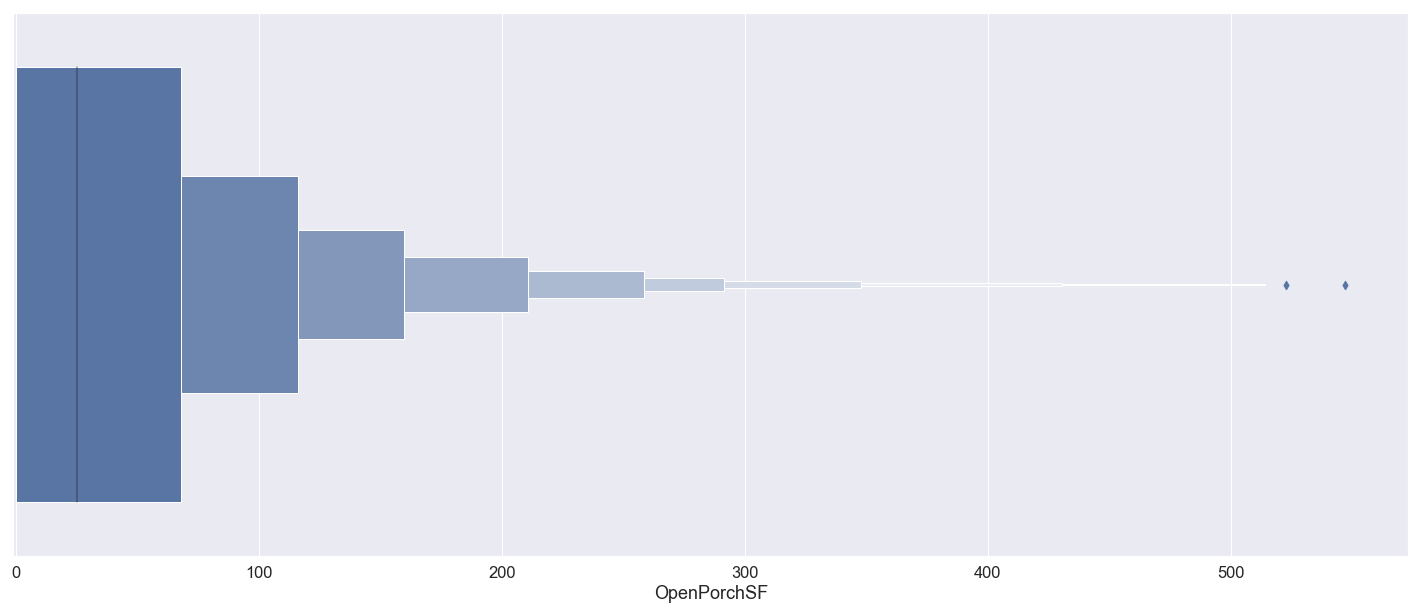

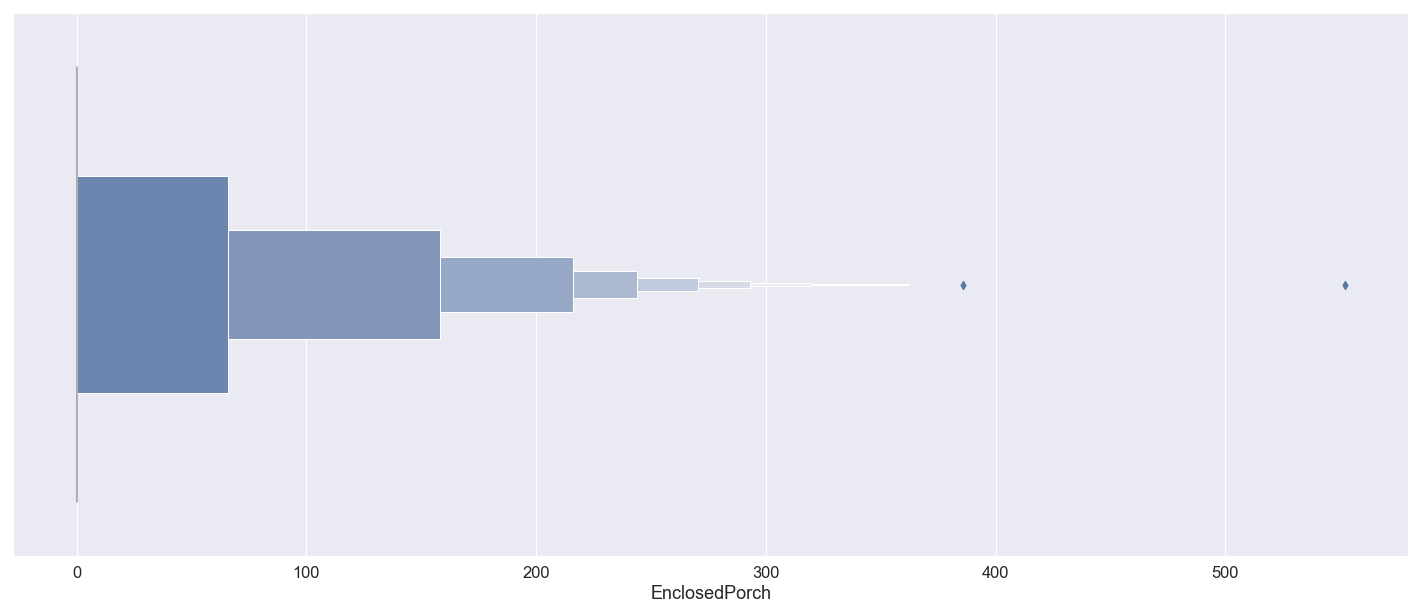

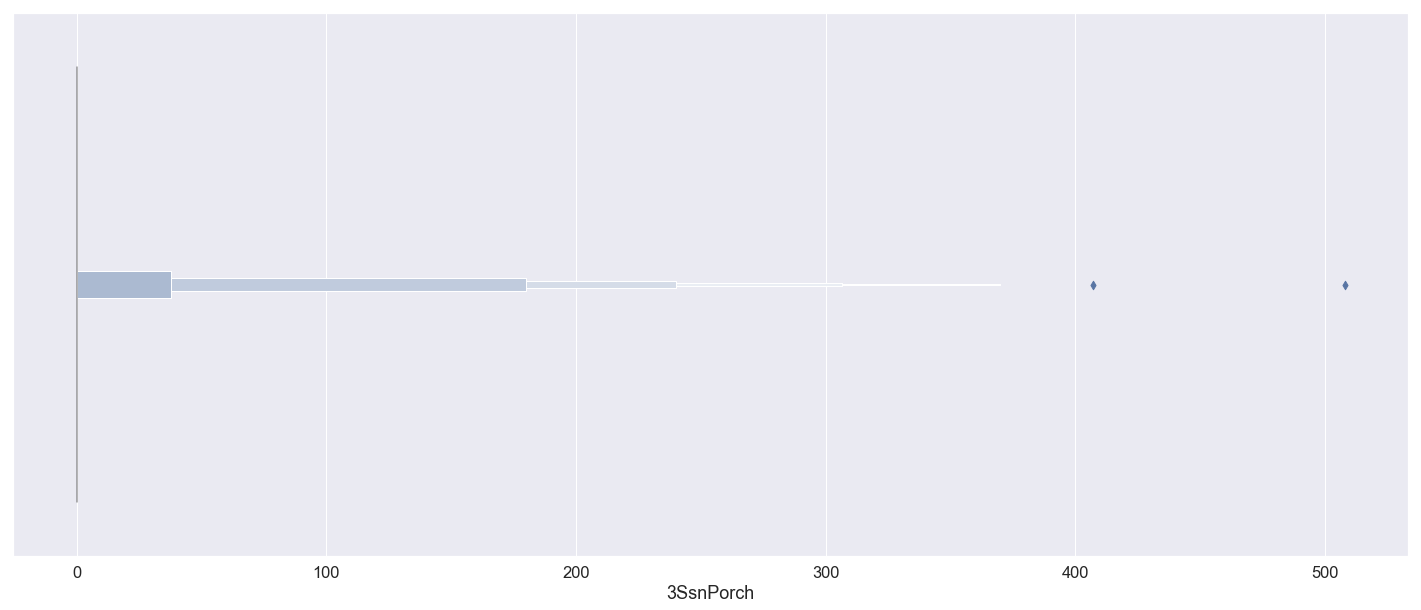

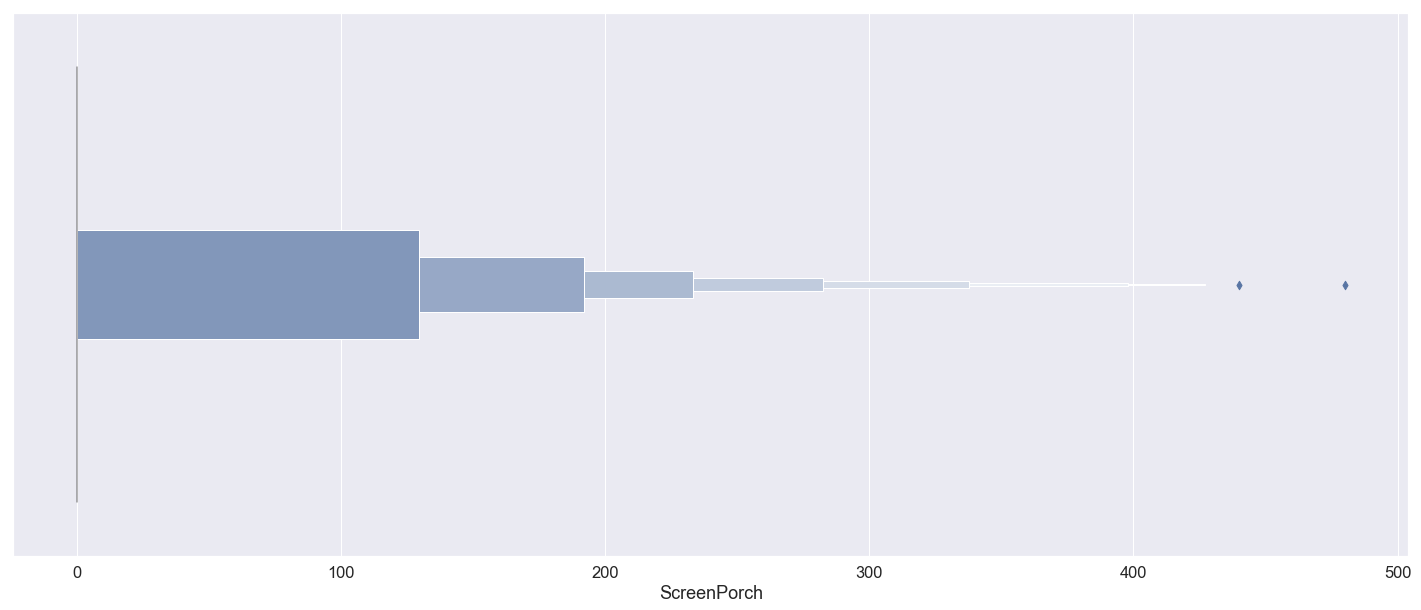

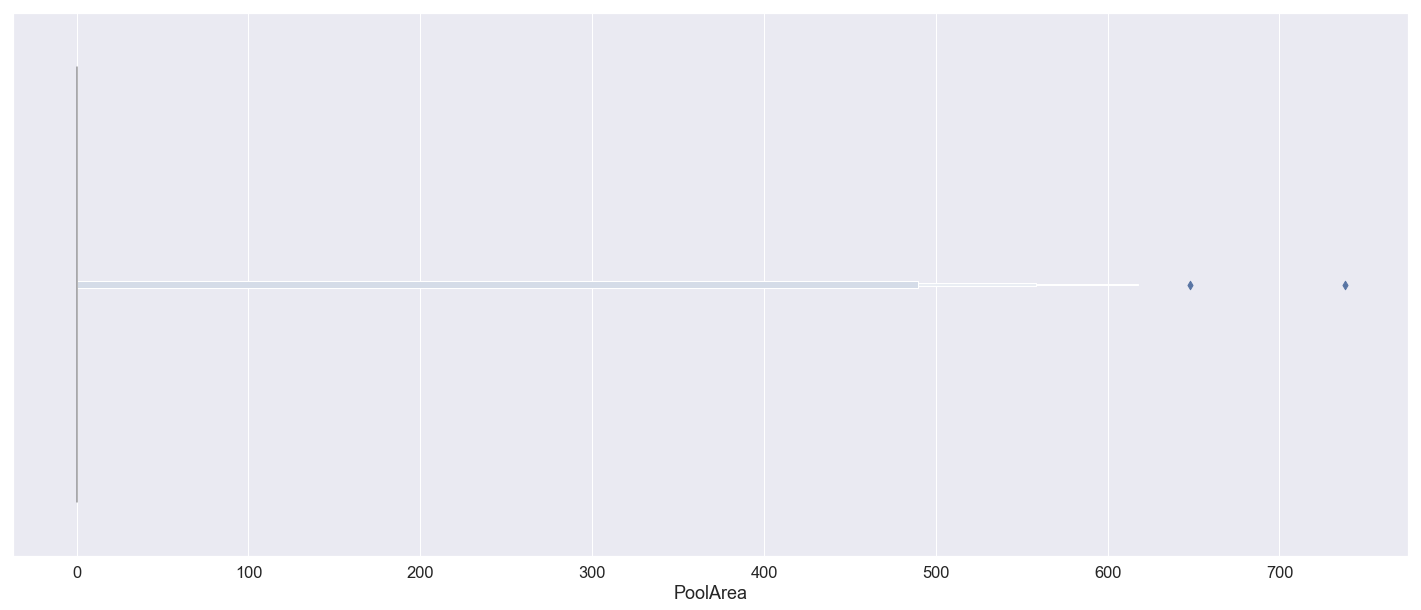

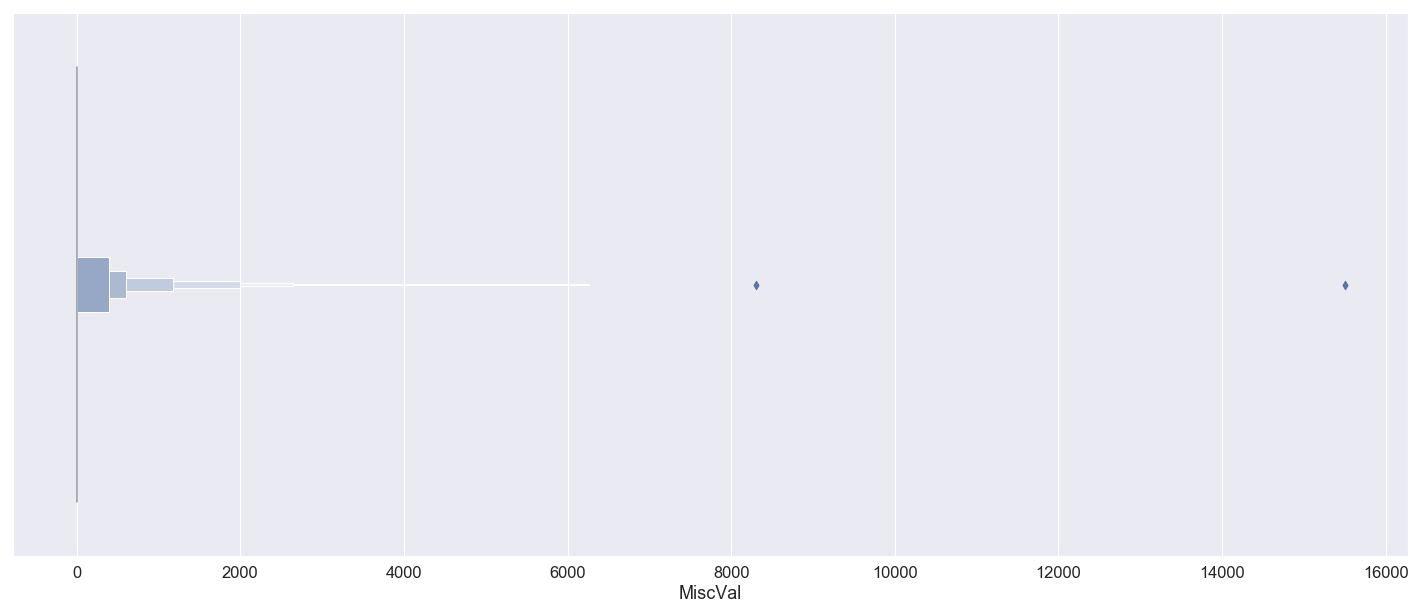

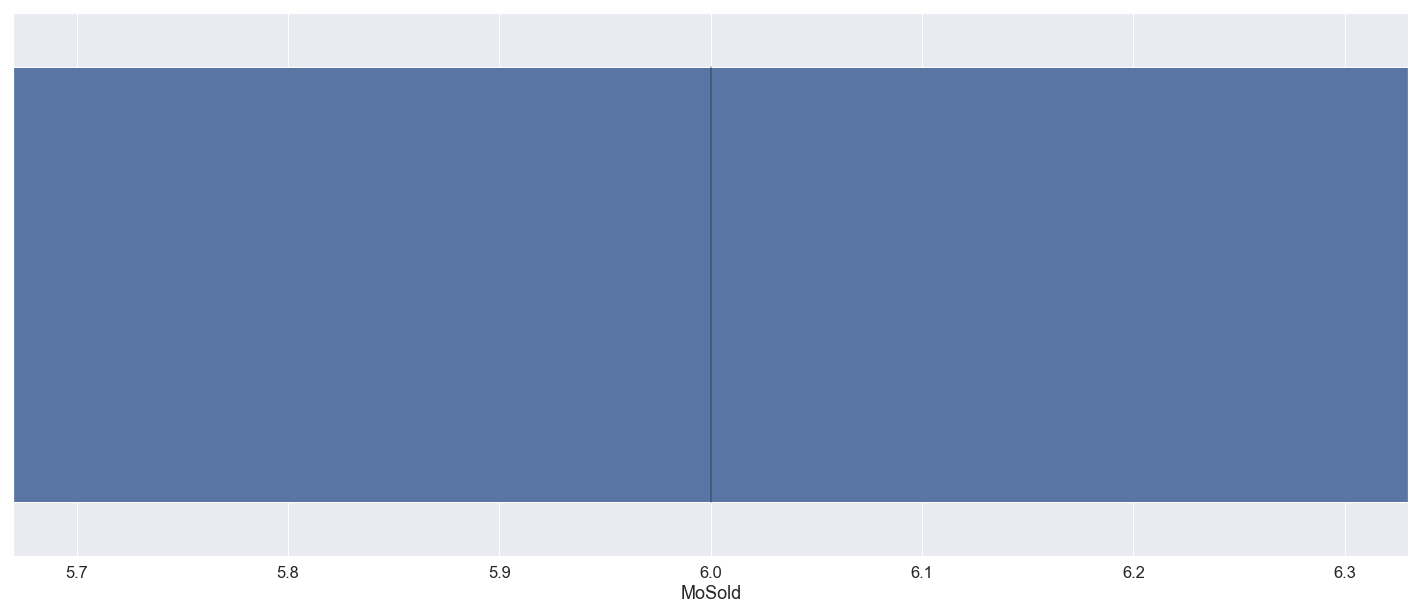

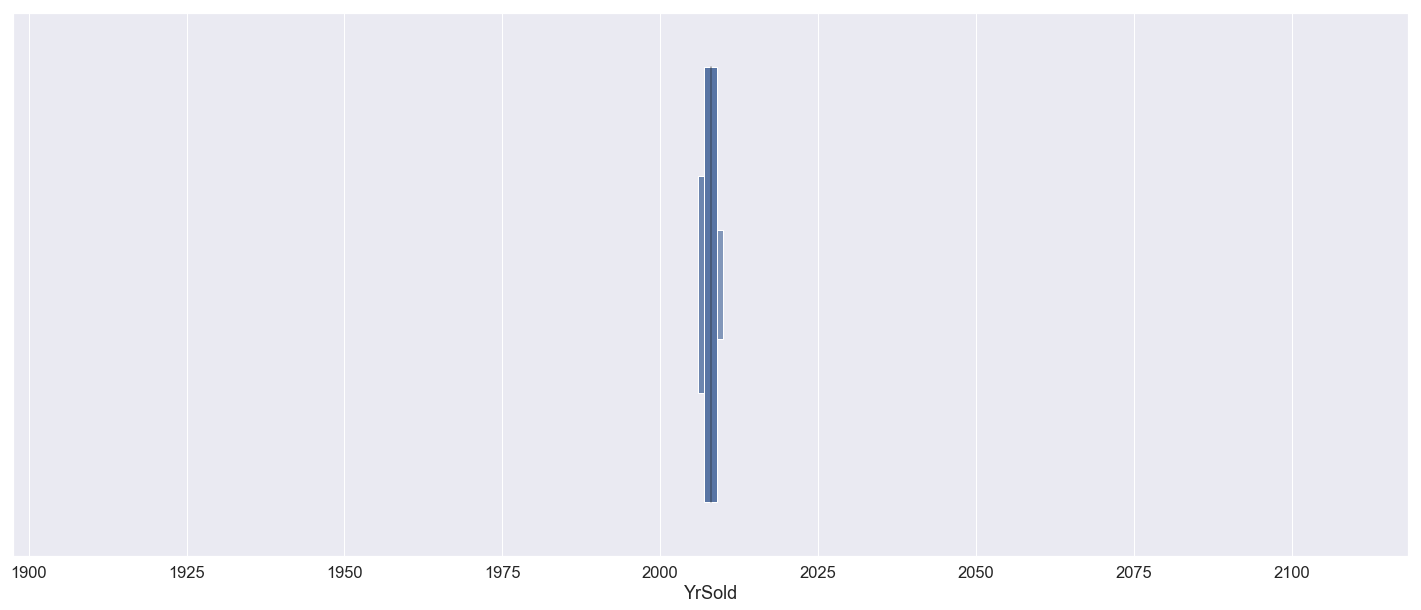

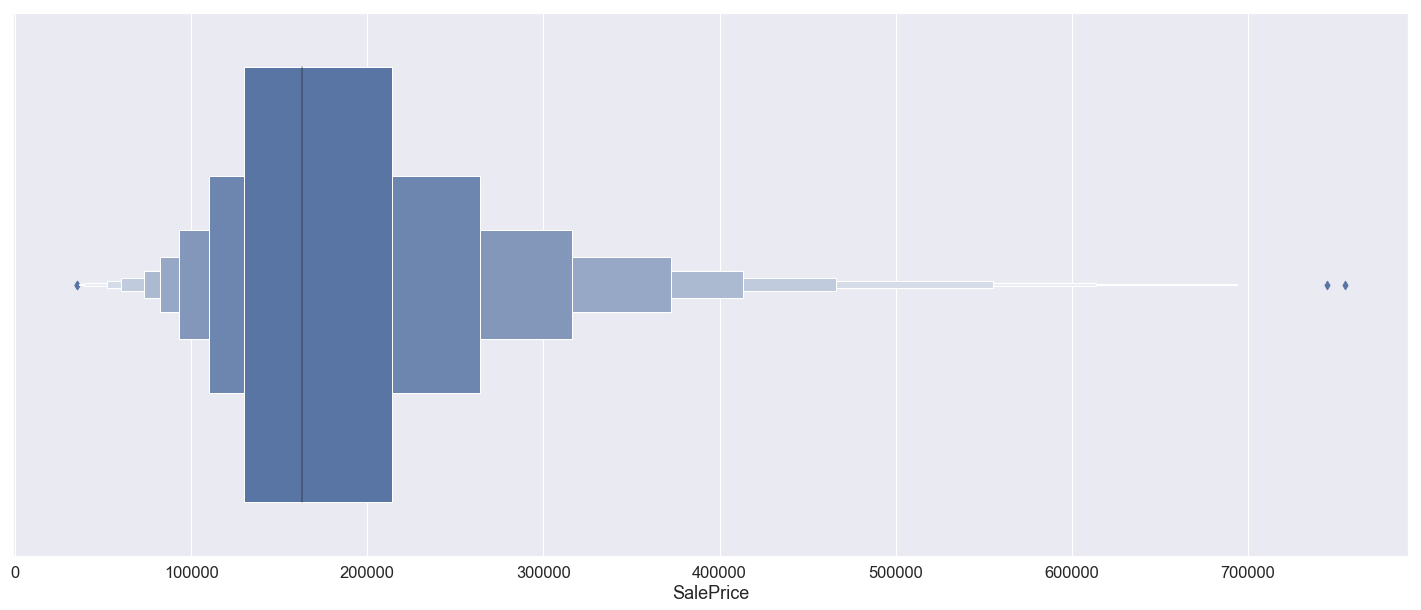

In [9]:
for i in list(train.columns):
    if train[i].dtype != 'O':
        sns.boxenplot(train[i])
        plt.show()

In [10]:
train.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

           ...         WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  \
count      ...        1460.000000  1460.000000    1460.000000  1460.000000   
mean       ...          94.244521    46.660274      21.954110     3.409589   
std        ...         125.338794    66.256028      61.119149    29.317331   
min        ...           0.000000     0.000000       0.000000     0.000000   
25%        ...           0.000000     0.000000       0.000000     0.000000   
50%        ...           0.000000    25.000000       0.000000     0.000000   
75%        ...         168.000000    68.000000       0.000000     0.000000   
max        ...         857.000000   547.000000     552.000000   508.000000   

       ScreenPorch     PoolArea       MiscVal       MoSold       YrSold  \
count  1460.000000  1460.000000   1460.000000  1460.000000  1460.000000   
mean     15.060959     2.758904     43.489041     6.321918  2007.815753   
std      55.757415    40.177307    496.123024     2.703626     1.328095   
min       0.000000     0.000000      0.000000     1.000000  2006.000000   
25%       0.000000     0.000000      0.000000     5.000000  2007.000000   
50%       0.000000     0.000000      0.000000     6.000000  2008.000000   
75%       0.000000     0.000000      0.000000     8.000000  2009.000000   
max     480.000000   738.000000  15500.000000    12.000000  2010.000000   

           SalePrice  
count    1460.000000  
mean   180921.195890  
std     79442.502883  
min     34900.000000  
25%    129975.000000  
50%    163000.000000  
75%    214000.000000  
max    755000.000000  

[8 rows x 38 columns]

### Handling Null values

In [11]:
len_train=train.shape[0]
houses=pd.concat([train,test], sort=False)

In [12]:
houses.select_dtypes(include='object').isnull().sum()[houses.select_dtypes(include='object').isnull().sum()>0]

MSZoning           4
Alley           2721
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        24
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinType2      80
Electrical         1
KitchenQual        1
Functional         2
FireplaceQu     1420
GarageType       157
GarageFinish     159
GarageQual       159
GarageCond       159
PoolQC          2909
Fence           2348
MiscFeature     2814
SaleType           1
dtype: int64

In [13]:
for col in ('Alley','Utilities','MasVnrType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
            'BsmtFinType2','Electrical','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond',
           'PoolQC','Fence','MiscFeature'):
    train[col]=train[col].fillna('None')
    test[col]=test[col].fillna('None')


In [14]:
for col in ('MSZoning','Exterior1st','Exterior2nd','KitchenQual','SaleType','Functional'):
    train[col]=train[col].fillna(train[col].mode()[0])
    test[col]=test[col].fillna(train[col].mode()[0])

In [15]:
houses.select_dtypes(include=['int','float']).isnull().sum()[houses.select_dtypes(include=['int','float']).isnull().sum()>0]

LotFrontage      486
MasVnrArea        23
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
GarageYrBlt      159
GarageCars         1
GarageArea         1
SalePrice       1459
dtype: int64

In [16]:
for col in ('MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','BsmtFullBath','BsmtHalfBath','GarageYrBlt','GarageCars','GarageArea'):
    train[col]=train[col].fillna(0)
    test[col]=test[col].fillna(0)

In [17]:
train['LotFrontage']=train['LotFrontage'].fillna(train['LotFrontage'].mean())
test['LotFrontage']=test['LotFrontage'].fillna(train['LotFrontage'].mean())


In [18]:
print(train.isnull().sum().sum())
print(train.isnull().sum().sum())

0
0


## Feature Engineering

In [19]:
len_train=train.shape[0]
houses=pd.concat([train,test], sort=False)

In [20]:
houses['Total_sqr_footage'] = (houses['BsmtFinSF1'] + houses['BsmtFinSF2'] +
                                 houses['1stFlrSF'] + houses['2ndFlrSF'])

houses['Total_Bathrooms'] = (houses['FullBath'] + (0.5*houses['HalfBath']) + 
                               houses['BsmtFullBath'] + (0.5*houses['BsmtHalfBath']))

houses['Total_porch_sf'] = (houses['OpenPorchSF'] + houses['3SsnPorch'] +
                              houses['EnclosedPorch'] + houses['ScreenPorch'] +
                             houses['WoodDeckSF'])


#simplified features
houses['haspool'] = houses['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
houses['has2ndfloor'] = houses['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
houses['hasgarage'] = houses['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
houses['hasbsmt'] = houses['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
houses['hasfireplace'] = houses['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

In [21]:
train=houses[:len_train]
test=houses[len_train:]

In [22]:
# outlier removal
train = train[train['GrLivArea']<4000]

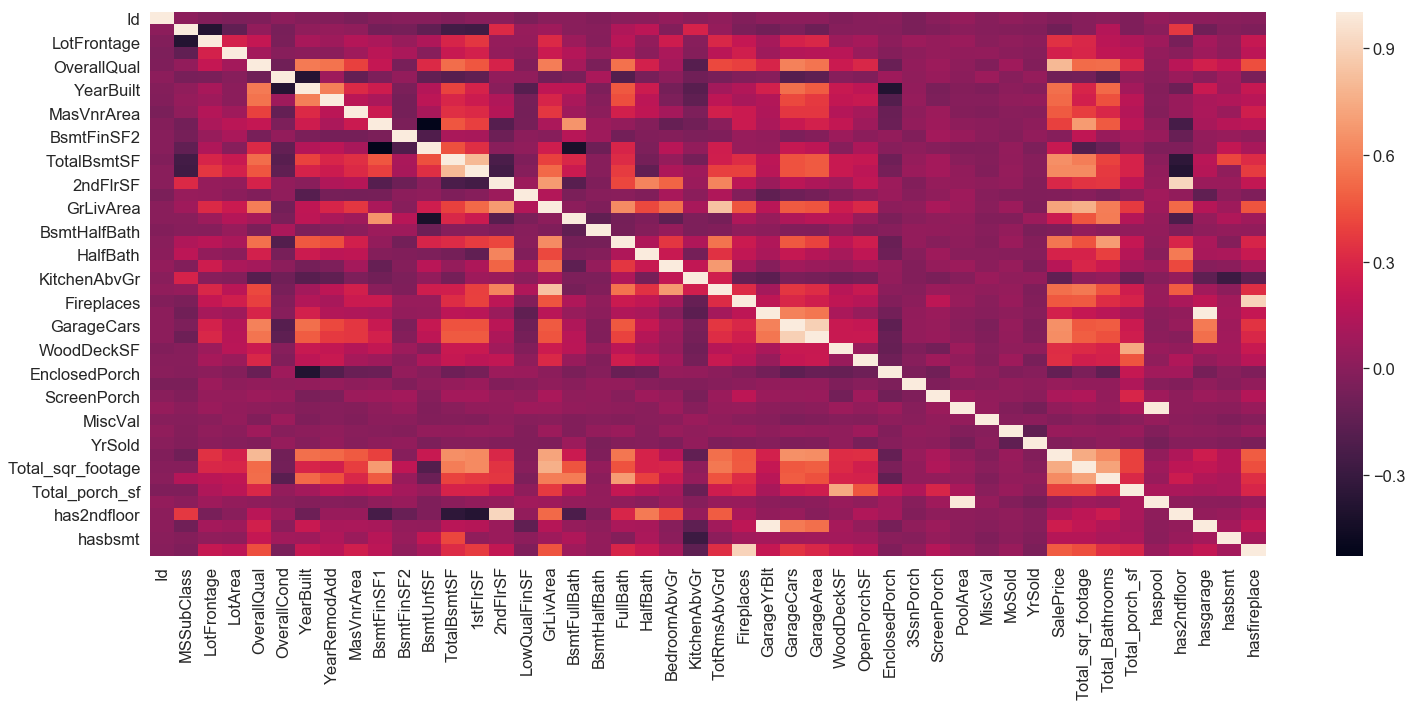

In [23]:
sns.heatmap(train.corr())

Removing the features that are highly correlated

In [24]:
train.drop(['GarageArea','1stFlrSF','TotRmsAbvGrd','2ndFlrSF','BsmtFinSF1','GrLivArea','GarageYrBlt','WoodDeckSF','PoolArea'], axis=1, inplace=True)
test.drop(['GarageArea','1stFlrSF','TotRmsAbvGrd','2ndFlrSF','BsmtFinSF1','GrLivArea','GarageYrBlt','WoodDeckSF','PoolArea'], axis=1, inplace=True)

C:\Users\Shantanu\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [25]:
len_train=train.shape[0]
print(train.shape)

(1456, 80)


In [26]:
houses=pd.concat([train,test], sort=False)

In [27]:
houses['MSSubClass']=houses['MSSubClass'].astype(str)

## Data  Normalization

In [28]:
skew=houses.select_dtypes(include=['int','float']).apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skew_df=pd.DataFrame({'Skew':skew})
skewed_df=skew_df[(skew_df['Skew']>0.5)|(skew_df['Skew']<-0.5)]

In [29]:
skewed_df.index

Index(['BsmtFinSF2', 'BsmtHalfBath', 'MasVnrArea', 'SalePrice', 'LotFrontage',
       'Total_sqr_footage', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath'],
      dtype='object')

In [30]:
train=houses[:len_train]
test=houses[len_train:]

In [31]:
lam=0.1
for col in ('MiscVal', 'LotArea', 'LowQualFinSF', '3SsnPorch','KitchenAbvGr', 'BsmtFinSF2', 'EnclosedPorch', 'ScreenPorch',
           'BsmtHalfBath', 'MasVnrArea', 'OpenPorchSF','LotFrontage', 'BsmtUnfSF','HalfBath',
            'TotalBsmtSF', 'BsmtFullBath','OverallCond', 'YearBuilt','Fireplaces'):
    train[col]=boxcox1p(train[col],lam)
    test[col]=boxcox1p(test[col],lam)

C:\Users\Shantanu\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\Shantanu\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [32]:
train['SalePrice']=np.log(train['SalePrice'])

C:\Users\Shantanu\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [33]:
houses=pd.concat([train,test], sort=False)
houses=pd.get_dummies(houses)

In [34]:
train=houses[:len_train]
test=houses[len_train:]

## Data Preprocessing

In [35]:
train.drop('Id', axis=1, inplace=True)
Id = test.Id
test.drop('Id', axis=1, inplace=True)

In [36]:
x=train.drop('SalePrice', axis=1)
y=train['SalePrice']
test=test.drop('SalePrice', axis=1)

In [37]:
y = y.values

In [38]:
# scailing
sc=RobustScaler()
x=sc.fit_transform(x)
test=sc.transform(test)

In [39]:
print(x.shape)
print(test.shape)

(1456, 317)
(1459, 317)


In [40]:
y

array([12.24769432, 12.10901093, 12.31716669, ..., 12.49312952,
       11.86446223, 11.90158345])

In [41]:
#splitting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.1,random_state = 0)

## Modeling

In [42]:
# defining accuracy metrics'
def get_score(prediction, lables):    
    print('R2: {}'.format(r2_score(prediction, lables)))
    print('RMSE: {}'.format(np.sqrt(mean_squared_error(prediction, lables))))

# Shows scores for train and validation sets    
def train_test(estimator, x_trn, x_tst, y_trn, y_tst):
    prediction_train = estimator.predict(x_trn)
    # Printing estimator
    print(estimator)
    # Printing train scores
    print("Training Score")
    get_score(prediction_train, y_trn)
    prediction_test = estimator.predict(x_tst)
    # Printing test scores
    print("Validation Score")
    get_score(prediction_test, y_tst)

### Lasso Regression

In [44]:
reg1 = Lasso(alpha =0.001, random_state=1)

In [45]:
reg1.fit(x_train,y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=1,
   selection='cyclic', tol=0.0001, warm_start=False)

In [46]:
train_test(reg1, x_train, x_test, y_train, y_test)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=1,
   selection='cyclic', tol=0.0001, warm_start=False)
Training Score
R2: 0.9206600402671767
RMSE: 0.10683919075096306
Validation Score
R2: 0.9080253528939279
RMSE: 0.10917516433462317


In [47]:
pred = np.array(np.exp(reg1.predict(test)))
submission = pd.DataFrame( OrderedDict( { 'Id' : Id, 'SalePrice' : pred} ) )
pd.DataFrame(submission, columns=['Id','SalePrice']).to_csv('sub1.csv',index = False)

### Support Vector Regression

In [48]:
reg2 = SVR()

In [49]:
reg2.fit(x_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [50]:
train_test(reg2, x_train, x_test, y_train, y_test)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
Training Score
R2: 0.9314784554416046
RMSE: 0.09857592073368072
Validation Score
R2: 0.9067407387389292
RMSE: 0.1082907196284312


In [51]:
pred = np.array(np.exp(reg2.predict(test)))
submission = pd.DataFrame( OrderedDict( { 'Id' : Id, 'SalePrice' : pred} ) )
pd.DataFrame(submission, columns=['Id','SalePrice']).to_csv('sub2.csv',index = False)

### Decision Tree Regression

In [52]:
paramgrid2 = {"criterion":["mae","mse"],
              "max_depth":range(1,10,1),
              "min_samples_leaf":range(1,5,1), 
             }
reg3 = DecisionTreeRegressor()
reg_grid2 = GridSearchCV(reg3,paramgrid2,cv=5)
reg_grid2.fit(x_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'criterion': ['mae', 'mse'], 'max_depth': range(1, 10), 'min_samples_leaf': range(1, 5)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [53]:
train_test(reg_grid2, x_train, x_test, y_train, y_test)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'criterion': ['mae', 'mse'], 'max_depth': range(1, 10), 'min_samples_leaf': range(1, 5)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)
Training Score
R2: 0.9072336749786832
RMSE: 0.1161675039334858
Validation Score
R2: 0.741199988345157
RMSE: 0.18007710279107314


In [54]:
pred = np.array(np.exp(reg_grid2.predict(test)))
submission = pd.DataFrame( OrderedDict( { 'Id' : Id, 'SalePrice' : pred} ) )
pd.DataFrame(submission, columns=['Id','SalePrice']).to_csv('sub3.csv',index = False)

### Extreme Gradient Boosting

In [55]:
gbm_param_grid = {'learning_rate':[0.05,0.5,1],'n_estimators': [200],
                  'max_depth':[1,3,5],'subsample':[0.05,0.5,1],'n_jobs':[4],
                  'min_child_weight':[1,3],'colsample_bytree':[0,1],
                  
                 }
gbm = xgb.XGBRegressor()

In [56]:
randomized_mse = GridSearchCV(estimator=gbm,param_grid=gbm_param_grid,
                                    scoring='neg_mean_squared_error', cv=4, verbose=1)

In [57]:
randomized_mse.fit(x_train, y_train)

Fitting 4 folds for each of 108 candidates, totalling 432 fits
[19:35:33] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:35:35] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:35:35] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:35:36] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:35:37] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:35:38] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear i

[19:36:14] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:36:16] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:36:17] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:36:18] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:36:19] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:36:20] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:36:21] WARNI

[19:36:55] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:36:55] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:36:56] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:36:57] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:36:58] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:36:58] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:36:59] WARNI

[19:37:30] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:37:30] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:37:31] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:37:32] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:37:32] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:37:33] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:37:34] WARNI

[19:38:04] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:38:05] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:38:05] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:38:06] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:38:07] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:38:07] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:38:08] WARNI

[19:38:54] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:38:56] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:38:57] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:38:58] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:38:59] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:39:00] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:39:01] WARNI

[19:40:06] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:40:07] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:40:08] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:40:09] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:40:09] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:40:10] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:40:11] WARNI

[19:41:16] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:41:17] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:41:18] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:41:20] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:41:22] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:41:24] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:41:26] WARNI

[19:42:20] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:42:22] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:42:24] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:42:26] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:42:27] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:42:29] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:42:31] WARNI

[Parallel(n_jobs=1)]: Done 432 out of 432 | elapsed:  7.7min finished


[19:43:16] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=4, error_score='raise',
       estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'learning_rate': [0.05, 0.5, 1], 'n_estimators': [200], 'max_depth': [1, 3, 5], 'subsample': [0.05, 0.5, 1], 'n_jobs': [4], 'min_child_weight': [1, 3], 'colsample_bytree': [0, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=1)

In [58]:
train_test(randomized_mse, x_train, x_test, y_train, y_test)

GridSearchCV(cv=4, error_score='raise',
       estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'learning_rate': [0.05, 0.5, 1], 'n_estimators': [200], 'max_depth': [1, 3, 5], 'subsample': [0.05, 0.5, 1], 'n_jobs': [4], 'min_child_weight': [1, 3], 'colsample_bytree': [0, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=1)
Training Score
R2: 0.9698680613040207
RMSE: 0.06713443836321309
Validation Score
R2: 0.8978975812738507
RMSE: 0.1140636497696877


In [59]:
print("Best parameters found: ",randomized_mse.best_params_)
print("Lowest RMSE found: ",np.sqrt(np.abs(randomized_mse.best_score_)))

Best parameters found:  {'colsample_bytree': 1, 'learning_rate': 0.05, 'max_depth': 5, 'min_child_weight': 3, 'n_estimators': 200, 'n_jobs': 4, 'subsample': 0.5}
Lowest RMSE found:  0.12298261085290761


In [60]:
pred = np.array(np.exp(randomized_mse.predict(test)))
submission = pd.DataFrame( OrderedDict( { 'Id' : Id, 'SalePrice' : pred} ) )
pd.DataFrame(submission, columns=['Id','SalePrice']).to_csv('sub4.csv',index = False)

In [61]:
xg_reg = xgb.XGBRegressor(objective='reg:linear',n_estimators=100, seed=123)

In [62]:
xg_reg.fit(x_train, y_train)
y_pred4 = xg_reg.predict(x_test)

[19:43:20] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [63]:
train_test(xg_reg, x_train, x_test, y_train, y_test)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=123,
       silent=None, subsample=1, verbosity=1)
Training Score
R2: 0.9487527235788291
RMSE: 0.0860464450968355
Validation Score
R2: 0.8907268203075582
RMSE: 0.11760689912293992


In [64]:
pred = np.array(np.exp(xg_reg.predict(test)))
submission = pd.DataFrame( OrderedDict( { 'Id' : Id, 'SalePrice' : pred} ) )
pd.DataFrame(submission, columns=['Id','SalePrice']).to_csv('sub5.csv',index = False)

### Neural Network

In [65]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(512, kernel_initializer='normal',input_dim = x_train.shape[1], activation='relu'))
# The Hidden Layers :
NN_model.add(Dense(512, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(512, kernel_initializer='normal',activation='relu'))
NN_model.add(Dropout(0.2))
NN_model.add(Dense(512, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(512, kernel_initializer='normal',activation='relu'))
# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])
NN_model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               162816    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_5 (Dense)      

In [66]:
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [67]:
NN_model.fit(x_train, y_train, epochs=200, batch_size=32, validation_split = 0.1, callbacks=callbacks_list)

Instructions for updating:
Use tf.cast instead.
Train on 1179 samples, validate on 131 samples
Epoch 1/200
1179/1179 [==============================] - 2s 2ms/step - loss: 18.8277 - mean_squared_error: 18.8277 - val_loss: 1.6545 - val_mean_squared_error: 1.6545

Epoch 00001: val_loss improved from inf to 1.65450, saving model to Weights-001--1.65450.hdf5
Epoch 2/200
1179/1179 [==============================] - 2s 1ms/step - loss: 1.2845 - mean_squared_error: 1.2845 - val_loss: 1.0009 - val_mean_squared_error: 1.0009

Epoch 00002: val_loss improved from 1.65450 to 1.00094, saving model to Weights-002--1.00094.hdf5
Epoch 3/200
1179/1179 [==============================] - 1s 1ms/step - loss: 0.7601 - mean_squared_error: 0.7601 - val_loss: 0.5085 - val_mean_squared_error: 0.5085

Epoch 00003: val_loss improved from 1.00094 to 0.50851, saving model to Weights-003--0.50851.hdf5
Epoch 4/200
1179/1179 [==============================] - 1s 1ms/step - loss: 0.4834 - mean_squared_error: 0.4834 - 

1179/1179 [==============================] - 2s 1ms/step - loss: 0.1477 - mean_squared_error: 0.1477 - val_loss: 1.5885 - val_mean_squared_error: 1.5885

Epoch 00036: val_loss did not improve from 0.35867
Epoch 37/200
1179/1179 [==============================] - 2s 1ms/step - loss: 0.2067 - mean_squared_error: 0.2067 - val_loss: 1.4821 - val_mean_squared_error: 1.4821

Epoch 00037: val_loss did not improve from 0.35867
Epoch 38/200
1179/1179 [==============================] - 2s 1ms/step - loss: 0.1671 - mean_squared_error: 0.1671 - val_loss: 1.1328 - val_mean_squared_error: 1.1328

Epoch 00038: val_loss did not improve from 0.35867
Epoch 39/200
1179/1179 [==============================] - 1s 1ms/step - loss: 0.2107 - mean_squared_error: 0.2107 - val_loss: 0.8859 - val_mean_squared_error: 0.8859

Epoch 00039: val_loss did not improve from 0.35867
Epoch 40/200
1179/1179 [==============================] - 1s 547us/step - loss: 0.2322 - mean_squared_error: 0.2322 - val_loss: 2.0844 - val_

1179/1179 [==============================] - 1s 490us/step - loss: 0.0461 - mean_squared_error: 0.0461 - val_loss: 4.9343 - val_mean_squared_error: 4.9343

Epoch 00110: val_loss did not improve from 0.35867
Epoch 111/200
1179/1179 [==============================] - 1s 477us/step - loss: 0.0349 - mean_squared_error: 0.0349 - val_loss: 3.9436 - val_mean_squared_error: 3.9436

Epoch 00111: val_loss did not improve from 0.35867
Epoch 112/200
1179/1179 [==============================] - 1s 543us/step - loss: 0.0450 - mean_squared_error: 0.0450 - val_loss: 3.2574 - val_mean_squared_error: 3.2574

Epoch 00112: val_loss did not improve from 0.35867
Epoch 113/200
1179/1179 [==============================] - 1s 556us/step - loss: 0.0513 - mean_squared_error: 0.0513 - val_loss: 3.4680 - val_mean_squared_error: 3.4680

Epoch 00113: val_loss did not improve from 0.35867
Epoch 114/200
1179/1179 [==============================] - 1s 490us/step - loss: 0.0347 - mean_squared_error: 0.0347 - val_loss: 4

1179/1179 [==============================] - 1s 596us/step - loss: 0.0566 - mean_squared_error: 0.0566 - val_loss: 4.2832 - val_mean_squared_error: 4.2832

Epoch 00184: val_loss did not improve from 0.35867
Epoch 185/200
1179/1179 [==============================] - 1s 517us/step - loss: 0.0509 - mean_squared_error: 0.0509 - val_loss: 3.5024 - val_mean_squared_error: 3.5024

Epoch 00185: val_loss did not improve from 0.35867
Epoch 186/200
1179/1179 [==============================] - 1s 503us/step - loss: 0.0656 - mean_squared_error: 0.0656 - val_loss: 3.5078 - val_mean_squared_error: 3.5078

Epoch 00186: val_loss did not improve from 0.35867
Epoch 187/200
1179/1179 [==============================] - 1s 848us/step - loss: 0.0465 - mean_squared_error: 0.0465 - val_loss: 4.1886 - val_mean_squared_error: 4.1886

Epoch 00187: val_loss did not improve from 0.35867
Epoch 188/200
1179/1179 [==============================] - 1s 636us/step - loss: 0.0297 - mean_squared_error: 0.0297 - val_loss: 3

In [ ]:
wights_file = 'Weights-174--0.06387.hdf5' # choose the best checkpoint 
NN_model.load_weights(wights_file) # load it
NN_model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])

In [ ]:
train_test(NN_model, x_train, x_test, y_train, y_test)

In [ ]:
pred = np.array(np.exp(NN_model.predict(test)))
pred = pred.reshape(1459)
submission = pd.DataFrame( OrderedDict( { 'Id' : Id, 'SalePrice' : pred} ) )
pd.DataFrame(submission, columns=['Id','SalePrice']).to_csv('sub6.csv',index = False)

### Elastic Net Regression

In [68]:
ENSTest = ElasticNetCV(alphas=[0.0001, 0.0005, 0.001, 0.01, 0.1, 1, 10], l1_ratio=[.01, .1, .5, .9, .99], max_iter=5000).fit(x_train, y_train)
train_test(ENSTest, x_train, x_test, y_train, y_test)

ElasticNetCV(alphas=[0.0001, 0.0005, 0.001, 0.01, 0.1, 1, 10], copy_X=True,
       cv=None, eps=0.001, fit_intercept=True,
       l1_ratio=[0.01, 0.1, 0.5, 0.9, 0.99], max_iter=5000, n_alphas=100,
       n_jobs=1, normalize=False, positive=False, precompute='auto',
       random_state=None, selection='cyclic', tol=0.0001, verbose=0)
Training Score
R2: 0.9322820672122551
RMSE: 0.09933611790271646
Validation Score
R2: 0.9059969307639681
RMSE: 0.10952860716167682


### Gradient Boosting

In [69]:
GBest = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05, max_depth=3, max_features='sqrt',
                                               min_samples_leaf=15, min_samples_split=10, loss='huber').fit(x_train, y_train)
train_test(GBest, x_train, x_test, y_train, y_test)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='huber', max_depth=3,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=15, min_samples_split=10,
             min_weight_fraction_leaf=0.0, n_estimators=3000,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)
Training Score
R2: 0.9741940781147733
RMSE: 0.061889701710661195
Validation Score
R2: 0.9119850615052565
RMSE: 0.1035754256843379


In [70]:
test_pred5 = np.exp(GBest.predict(test))
pred = np.array(test_pred5)
submission = pd.DataFrame( OrderedDict( { 'Id' : Id, 'SalePrice' : pred} ) )
pd.DataFrame(submission, columns=['Id','SalePrice']).to_csv('sub7.csv',index = False)

### Basic Stacking of models (Elasticnet and GradientBoost)

In [71]:
GB_model = GBest.fit(x_train, y_train)
ENST_model = ENSTest.fit(x_train, y_train)

In [72]:
Final_labels = (np.exp(GB_model.predict(test)) + (np.exp(ENST_model.predict(test)))) / 2

In [73]:
Final_labels

array([119820.92344989, 165835.4211226 , 186294.70347493, ...,
       167095.14064476, 112572.47368818, 217007.51166228])

In [74]:
pd.DataFrame({'Id': Id, 'SalePrice': Final_labels}).to_csv('sub8.csv', index =False)

### Basic models for stacking

In [75]:
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(x_train)
    rmse= np.sqrt(-cross_val_score(model, x_train, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [76]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

In [77]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

In [78]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

In [79]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

In [80]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

In [81]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [82]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.1159 (0.0129)



In [83]:
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 0.1158 (0.0125)



In [84]:
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Kernel Ridge score: 0.1153 (0.0119)



In [85]:
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting score: 0.1195 (0.0121)



In [86]:
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Xgboost score: 0.1196 (0.0131)



In [87]:
score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

LGBM score: 0.1181 (0.0140)



In [88]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)

In [89]:
averaged_models = AveragingModels(models = (ENet, GBoost, KRR, lasso))

score = rmsle_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

 Averaged base models score: 0.1123 (0.0127)



### Less simple stacking
In this approach, we add a meta-model on averaged base models and use the out-of-folds predictions of these base models to train our meta-model. 

The procedure, for the training part, may be described as follows:


1. Split the total training set into two disjoint sets (here **train** and .**holdout** )

2. Train several base models on the first part (**train**)

3. Test these base models on the second part (**holdout**)

4. Use the predictions from 3)  (called  out-of-folds predictions) as the inputs, and the correct responses (target variable) as the outputs  to train a higher level learner called **meta-model**.

The first three steps are done iteratively . If we take for example a 5-fold stacking , we first split the training data into 5 folds. Then we will do 5 iterations. In each iteration,  we train every base model on 4 folds and predict on the remaining fold (holdout fold). 

So, we will be sure, after 5 iterations , that the entire data is used to get out-of-folds predictions that we will then use as 
new feature to train our meta-model in the step 4.

For the prediction part , We average the predictions of  all base models on the test data  and used them as **meta-features**  on which, the final prediction is done with the meta-model.

![Faron](http://i.imgur.com/QBuDOjs.jpg)

(Image taken from [Faron](https://www.kaggle.com/getting-started/18153#post103381))

**Stacking averaged Models Class**

In [90]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

**Stacking Averaged models Score**

To make the two approaches comparable (by using the same number of models) , we just average **Enet KRR and Gboost**, then we add **lasso as meta-model**.

In [91]:
stacked_averaged_models = StackingAveragedModels(base_models = (ENet, GBoost, KRR),
                                                 meta_model = lasso)

score = rmsle_cv(stacked_averaged_models)
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

Stacking Averaged models score: 0.1118 (0.0128)


## Ensembling StackedRegressor, XGBoost and LightGBM

We add **XGBoost and LightGBM** to the** StackedRegressor** defined previously.

We first define a rmsle evaluation function 

In [92]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [93]:
stacked_averaged_models.fit(x_train, y_train)
stacked_train_pred = stacked_averaged_models.predict(x_train)
stacked_pred = np.expm1(stacked_averaged_models.predict(test))
print(rmsle(y_train, stacked_train_pred))

0.07747385702466113


In [94]:
model_xgb.fit(x_train, y_train)
xgb_train_pred = model_xgb.predict(x_train)
xgb_pred = np.expm1(model_xgb.predict(test))
print(rmsle(y_train, xgb_train_pred))

0.08040875547932423


In [95]:
model_lgb.fit(x_train, y_train)
lgb_train_pred = model_lgb.predict(x_train)
lgb_pred = np.expm1(model_lgb.predict(test))
print(rmsle(y_train, lgb_train_pred))

0.07306269636307916


In [96]:
print('RMSLE score on train data:')
print(rmsle(y_train,stacked_train_pred*0.70 +
               xgb_train_pred*0.15 + lgb_train_pred*0.15 ))

RMSLE score on train data:
0.07518358160290771


**Ensemble prediction:**

In [97]:
ensemble = stacked_pred*0.70 + xgb_pred*0.15 + lgb_pred*0.15

In [98]:
sub = pd.DataFrame()
sub['Id'] = Id
sub['SalePrice'] = ensemble
sub.to_csv('sub9.csv',index=False)

In [99]:
sub.head()

Id      SalePrice
0  1461  121158.485697
1  1462  163454.133854
2  1463  186853.562950
3  1464  203675.272077
4  1465  189799.431474